In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import sklearn
%matplotlib inline 
# import klib
from sklearn.compose import ColumnTransformer
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from itertools import cycle
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

## Expanding Width of Notebook For Better View

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Set Max Rows and Columns Display for More Details

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Loading the Data

In [4]:
df = pd.read_csv('prosperLoanData.csv')

## Basic Data Exploration

In [5]:
df.head()

ListingKey  ListingNumber            ListingCreationDate CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric) BorrowerState     Occupation EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup                 GroupKey               DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio     IncomeRange  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000           C    36  Completed  2009-08-14 00:00:00      0.16516        0.1580       0.1380                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0            CO          Other    Self-employed                       2.0                 True              True                      NaN  2007-08-26 18:41:46.780000000                  640.0                  659.0     2001-10-11 00:00:00                 5.0              4.0                        12.0                      1                         24.0                   3.0             3.0                   2.0             472.0                      4.0                       0.0                        0.0                     0.0                 0.00                   1500.0         11.0                                0.81                      0.0               0.17  $25,000-49,999   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000         NaN    36    Current                  NaN      0.12016        0.0920       0.0820                  0.07960         0.0249          0.05470                      6.0                     A           7.0                          2            CO   Professional         Employed                      44.0                False             False                      NaN            2014-02-27 08:28:14                  680.0                  699.0     1996-03-18 00:00:00                14.0             14.0                        29.0                     13                        389.0                   3.0             5.0                   0.0               0.0                      0.0                       1.0                        0.0                  3989.0                 0.21                  10266.0         29.0                                1.00                      2.0               0.18  $50,000-74,999   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000          HR    36  Completed  2009-12-17 00:00:00      0.28269        0.2750       0.2400                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0            GA          Other    Not available                       NaN                False              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000                  480.0                  499.0     2002-07-27 00:00:00                 NaN              NaN                         3.0                      0                          0.0                   0.0             1.0                   1.0               NaN                      0.0                       0.0                        NaN                     NaN                  NaN                      NaN          NaN                                 NaN                      NaN               0.06   Not displayed   
3  0EF5356002482

In [6]:
# Checking the dimesion of the data
df.shape

(113937, 81)

In [7]:
# Checking columns names
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)',
       'TradesOpenedLast6

In [8]:
# Info about the data and datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [9]:
df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

## Remove Duplicates

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(113937, 81)

## Dropping unncessesary columns

In [11]:
df.drop(['ListingKey','ListingNumber','BorrowerState','GroupKey','LoanKey','LoanNumber','MemberKey'],axis=1,inplace=True)


In [12]:
# Checking the null values data types
for x in df:
    if(df[x].isna().sum()):
        print (x,"/",df[x].dtype)

CreditGrade / object
ClosedDate / object
BorrowerAPR / float64
EstimatedEffectiveYield / float64
EstimatedLoss / float64
EstimatedReturn / float64
ProsperRating (numeric) / float64
ProsperRating (Alpha) / object
ProsperScore / float64
Occupation / object
EmploymentStatus / object
EmploymentStatusDuration / float64
CreditScoreRangeLower / float64
CreditScoreRangeUpper / float64
FirstRecordedCreditLine / object
CurrentCreditLines / float64
OpenCreditLines / float64
TotalCreditLinespast7years / float64
InquiriesLast6Months / float64
TotalInquiries / float64
CurrentDelinquencies / float64
AmountDelinquent / float64
DelinquenciesLast7Years / float64
PublicRecordsLast10Years / float64
PublicRecordsLast12Months / float64
RevolvingCreditBalance / float64
BankcardUtilization / float64
AvailableBankcardCredit / float64
TotalTrades / float64
TradesNeverDelinquent (percentage) / float64
TradesOpenedLast6Months / float64
DebtToIncomeRatio / float64
TotalProsperLoans / float64
TotalProsperPaymentsBi

## Changing Data types

In [13]:
# Converting the above column into date and time
def convert_date_time_cols(df, cols):
    for col in cols:
        # Convert the column to datetime datatype
        df[col] = pd.to_datetime(df[col], errors='coerce')

        # For rows where the column contains date and time, keep the original column as datetime datatype
        df[col] = df[col].where(df[col].dt.time != pd.Timestamp.min.time(), df[col].dt.date)

    return df

In [14]:
convert_date_time_cols(df, ['ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate'])

ListingCreationDate CreditGrade  Term              LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)               Occupation EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup        DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio     IncomeRange  IncomeVerifiable  StatedMonthlyIncome  TotalProsperLoans  \
0      2007-08-26 19:09:29.263           C    36               Completed 2009-08-14      0.16516        0.1580       0.1380                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0                    Other    Self-employed                       2.0                 True              True 2007-08-26 18:41:46.780                  640.0                  659.0              2001-10-11                 5.0              4.0                        12.0                      1                         24.0                   3.0             3.0                   2.0             472.0                      4.0                       0.0                        0.0                     0.0                 0.00                   1500.0         11.0                                0.81                      0.0               0.17  $25,000-49,999              True          3083.333333                NaN   
1      2014-02-27 08:28:07.900         NaN    36                 Current        NaT      0.12016        0.0920       0.0820                  0.07960         0.0249          0.05470                      6.0                     A           7.0                          2             Professional         Employed                      44.0                False             False 2014-02-27 08:28:14.000                  680.0                  699.0              1996-03-18                14.0             14.0                        29.0                     13                        389.0                   3.0             5.0                   0.0               0.0                      0.0                       1.0                        0.0                  3989.0                 0.21                  10266.0         29.0                                1.00                      2.0               0.18  $50,000-74,999              True          6125.000000                NaN   
2      2007-01-05 15:00:47.090          HR    36               Completed 2009-12-17      0.28269        0.2750       0.2400                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0                    Other    Not available                       NaN                False              True 2007-01-02 14:09:10.060                  480.0                  499.0              2002-07-27                 NaN              NaN                         3.0                      0                          0.0                   0.0             1.0                   1.0               NaN                      0.0                       0.0                        NaN                     NaN                  NaN                      NaN          NaN                                 NaN                      NaN               0.06   Not displayed              True          2083.333333                NaN   
3      2012-10-22 11:02:35.010         NaN    36                 Current       

In [15]:
# Reconfirming changed datatypes
for x in df:
    if(df[x].isna().sum()):
        print (x,"/",df[x].dtype)

CreditGrade / object
ClosedDate / datetime64[ns]
BorrowerAPR / float64
EstimatedEffectiveYield / float64
EstimatedLoss / float64
EstimatedReturn / float64
ProsperRating (numeric) / float64
ProsperRating (Alpha) / object
ProsperScore / float64
Occupation / object
EmploymentStatus / object
EmploymentStatusDuration / float64
CreditScoreRangeLower / float64
CreditScoreRangeUpper / float64
FirstRecordedCreditLine / datetime64[ns]
CurrentCreditLines / float64
OpenCreditLines / float64
TotalCreditLinespast7years / float64
InquiriesLast6Months / float64
TotalInquiries / float64
CurrentDelinquencies / float64
AmountDelinquent / float64
DelinquenciesLast7Years / float64
PublicRecordsLast10Years / float64
PublicRecordsLast12Months / float64
RevolvingCreditBalance / float64
BankcardUtilization / float64
AvailableBankcardCredit / float64
TotalTrades / float64
TradesNeverDelinquent (percentage) / float64
TradesOpenedLast6Months / float64
DebtToIncomeRatio / float64
TotalProsperLoans / float64
TotalP

## Deriving the Target variable through LoanStatus Column

In [16]:
# Removing current staus from LoanStatus column
df = df[df['LoanStatus']!= 'Current']
df.reset_index()
df.head(10)

ListingCreationDate CreditGrade  Term            LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)          Occupation EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup        DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio     IncomeRange  IncomeVerifiable  StatedMonthlyIncome  TotalProsperLoans  TotalProsperPaymentsBilled  \
0  2007-08-26 19:09:29.263           C    36             Completed 2009-08-14      0.16516        0.1580       0.1380                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0               Other    Self-employed                       2.0                 True              True 2007-08-26 18:41:46.780                  640.0                  659.0              2001-10-11                 5.0              4.0                        12.0                      1                         24.0                   3.0             3.0                   2.0             472.0                      4.0                       0.0                        0.0                     0.0                 0.00                   1500.0         11.0                                0.81                      0.0               0.17  $25,000-49,999              True          3083.333333                NaN                         NaN   
2  2007-01-05 15:00:47.090          HR    36             Completed 2009-12-17      0.28269        0.2750       0.2400                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0               Other    Not available                       NaN                False              True 2007-01-02 14:09:10.060                  480.0                  499.0              2002-07-27                 NaN              NaN                         3.0                      0                          0.0                   0.0             1.0                   1.0               NaN                      0.0                       0.0                        NaN                     NaN                  NaN                      NaN          NaN                                 NaN                      NaN               0.06   Not displayed              True          2083.333333                NaN                         NaN   
11 2007-10-09 20:28:33.640           C    36             Completed 2008-01-07      0.15033        0.1325       0.1225                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0     Waiter/Waitress        Full-time                      19.0                False             False 2007-10-08 13:13:44.363                  640.0                  659.0              2000-11-13                 2.0              2.0                        10.0                      1                         40.0                   3.0             5.0                   3.0            2224.0                      1.0                       0.0                        0.0                  1220.0                 0.32                   2580.0          7.0                                0.40                      0.0               0.27       $1-24,999              True          1666.666667                NaN                         NaN   
12 2013

In [17]:
df=df.reset_index(drop=True)
df.head()

ListingCreationDate CreditGrade  Term            LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)       Occupation EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup        DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio     IncomeRange  IncomeVerifiable  StatedMonthlyIncome  TotalProsperLoans  TotalProsperPaymentsBilled  \
0 2007-08-26 19:09:29.263           C    36             Completed 2009-08-14      0.16516        0.1580       0.1380                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0            Other    Self-employed                       2.0                 True              True 2007-08-26 18:41:46.780                  640.0                  659.0              2001-10-11                 5.0              4.0                        12.0                      1                         24.0                   3.0             3.0                   2.0             472.0                      4.0                       0.0                        0.0                     0.0                 0.00                   1500.0         11.0                                0.81                      0.0               0.17  $25,000-49,999              True          3083.333333                NaN                         NaN   
1 2007-01-05 15:00:47.090          HR    36             Completed 2009-12-17      0.28269        0.2750       0.2400                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0            Other    Not available                       NaN                False              True 2007-01-02 14:09:10.060                  480.0                  499.0              2002-07-27                 NaN              NaN                         3.0                      0                          0.0                   0.0             1.0                   1.0               NaN                      0.0                       0.0                        NaN                     NaN                  NaN                      NaN          NaN                                 NaN                      NaN               0.06   Not displayed              True          2083.333333                NaN                         NaN   
2 2007-10-09 20:28:33.640           C    36             Completed 2008-01-07      0.15033        0.1325       0.1225                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0  Waiter/Waitress        Full-time                      19.0                False             False 2007-10-08 13:13:44.363                  640.0                  659.0              2000-11-13                 2.0              2.0                        10.0                      1                         40.0                   3.0             5.0                   3.0            2224.0                      1.0                       0.0                        0.0                  1220.0                 0.32                   2580.0          7.0                                0.40                      0.0               0.27       $1-24,999              True          1666.666667                NaN                         NaN   
3 2013-12-15 20:01:10.

In [18]:
df['LoanStatus'].unique()

array(['Completed', 'Past Due (1-15 days)', 'Defaulted', 'Chargedoff',
       'Past Due (16-30 days)', 'Cancelled', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [19]:
df['LoanStatus'] = ['Defaulted' if x >= 180 else 'Not-Defauled' for x in df['LoanCurrentDaysDelinquent']]

In [20]:
df['LoanStatus'].head()

0    Not-Defauled
1    Not-Defauled
2    Not-Defauled
3    Not-Defauled
4    Not-Defauled
Name: LoanStatus, dtype: object

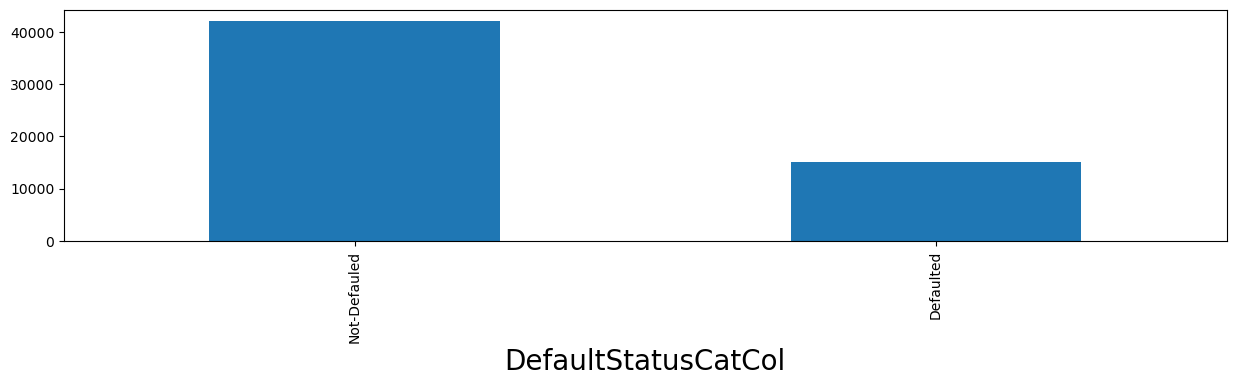

In [21]:
# Creating Bar Plot for DefaultStatus / Taret Variable column
plt.figure(figsize=(15,3))
df['LoanStatus'].value_counts().plot.bar()
plt.xlabel('DefaultStatusCatCol', fontsize=20)
None

### Generating new column from CrediGrade Column

In [22]:
mapping = {
    'AA': 'The highest credit grade',
    'A': 'A strong credit grade',
    'B': 'A medium credit grade',
    'C': 'A lower credit grade',
    'D': 'A very low credit grade',
    'E': 'A grade indicating default',
    'HR': 'High risk',
    'NC': 'No credit history'
}

# Create a new column 'description' based on the mapping
df['CreditGrade_description'] = df['CreditGrade'].map(mapping)

# Print the resulting DataFrame
df

ListingCreationDate CreditGrade  Term    LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  ListingCategory (numeric)       Occupation EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup        DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio     IncomeRange  IncomeVerifiable  StatedMonthlyIncome  TotalProsperLoans  TotalProsperPaymentsBilled  \
0     2007-08-26 19:09:29.263           C    36  Not-Defauled 2009-08-14      0.16516        0.1580       0.1380                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0            Other    Self-employed                       2.0                 True              True 2007-08-26 18:41:46.780                  640.0                  659.0              2001-10-11                 5.0              4.0                        12.0                      1                         24.0                   3.0             3.0                   2.0             472.0                      4.0                       0.0                        0.0                     0.0                 0.00                   1500.0         11.0                                0.81                      0.0               0.17  $25,000-49,999              True          3083.333333                NaN                         NaN   
1     2007-01-05 15:00:47.090          HR    36  Not-Defauled 2009-12-17      0.28269        0.2750       0.2400                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0            Other    Not available                       NaN                False              True 2007-01-02 14:09:10.060                  480.0                  499.0              2002-07-27                 NaN              NaN                         3.0                      0                          0.0                   0.0             1.0                   1.0               NaN                      0.0                       0.0                        NaN                     NaN                  NaN                      NaN          NaN                                 NaN                      NaN               0.06   Not displayed              True          2083.333333                NaN                         NaN   
2     2007-10-09 20:28:33.640           C    36  Not-Defauled 2008-01-07      0.15033        0.1325       0.1225                      NaN            NaN              NaN                      NaN                   NaN           NaN                          0  Waiter/Waitress        Full-time                      19.0                False             False 2007-10-08 13:13:44.363                  640.0                  659.0              2000-11-13                 2.0              2.0                        10.0                      1                         40.0                   3.0             5.0                   3.0            2224.0                      1.0                       0.0                        0.0                  1220.0                 0.32                   2580.0          7.0                                0.40                      0.0               0.27       $1-24,999              True          1666.666667                NaN                         NaN   
3     2013-12-15 20:01:10.757         NaN 

In [23]:
Income_range = {'Not employed': '$0'}
df['IncomeRange'] = df['IncomeRange'].replace(Income_range)
df['EmploymentStatus'] = df['EmploymentStatus'].replace('Retired', 'Not employed')

## Missing Values Treatment

In [24]:
# Checking total the missing values in each column 
df.isnull().sum()

ListingCreationDate                        0
CreditGrade                            28408
Term                                       0
LoanStatus                                 0
ClosedDate                              2272
BorrowerAPR                               25
BorrowerRate                               0
LenderYield                                0
EstimatedEffectiveYield                29084
EstimatedLoss                          29084
EstimatedReturn                        29084
ProsperRating (numeric)                29084
ProsperRating (Alpha)                  29084
ProsperScore                           29084
ListingCategory (numeric)                  0
Occupation                              2284
EmploymentStatus                        2255
EmploymentStatusDuration                7615
IsBorrowerHomeowner                        0
CurrentlyInGroup                           0
DateCreditPulled                           0
CreditScoreRangeLower                    591
CreditScor

# Preprocessing: imputation of missing values

In [25]:
date_cols = df[['ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate']]
categorical = df.select_dtypes(include=['bool','object']).columns
numerical=df.select_dtypes('number').columns
df_c = df[categorical].copy()
df_n = df[numerical].copy()

In [26]:
df_n.head()

Term  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio  StatedMonthlyIncome  TotalProsperLoans  TotalProsperPaymentsBilled  OnTimeProsperPayments  ProsperPaymentsLessThanOneMonthLate  ProsperPaymentsOneMonthPlusLate  ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  ScorexChangeAtTimeOfListing  LoanCurrentDaysDelinquent  LoanFirstDefaultedCycleNumber  \
0    36      0.16516        0.1580       0.1380                      NaN            NaN              NaN                      NaN           NaN                          0                       2.0                  640.0                  659.0                 5.0              4.0                        12.0                      1                         24.0                   3.0             3.0                   2.0             472.0                      4.0                       0.0                        0.0                     0.0                 0.00                   1500.0         11.0                                0.81                      0.0               0.17          3083.333333                NaN                         NaN                    NaN                                  NaN                              NaN                       NaN                          NaN                          NaN                          0                            NaN   
1    36      0.28269        0.2750       0.2400                      NaN            NaN              NaN                      NaN           NaN                          0                       NaN                  480.0                  499.0                 NaN              NaN                         3.0                      0                          0.0                   0.0             1.0                   1.0               NaN                      0.0                       0.0                        NaN                     NaN                  NaN                      NaN          NaN                                 NaN                      NaN               0.06          2083.333333                NaN                         NaN                    NaN                                  NaN                              NaN                       NaN                          NaN                          NaN                          0                            NaN   
2    36      0.15033        0.1325       0.1225                      NaN            NaN              NaN                      NaN           NaN                          0                      19.0                  640.0                  659.0                 2.0              2.0                        10.0                      1                         40.0                   3.0             5.0                   3.0            2224.0                      1.0                       0.0                        0.0                  1220.0                 0.32                   2580.0          7.0                                0.40                      0.0               0.27          1666.666667                NaN                         NaN                    NaN                                  NaN                              NaN                       NaN                          NaN                          NaN                          0                            NaN   
3    36      0.17969        0.1435       0.1335                

In [27]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
imp.fit(df_n)
df_num_imputed = imp.transform(df_n)

In [28]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
imp.fit(df_c)
df_cat_imputed = imp.transform(df_c)

In [29]:
date_cols.isna().sum()

ListingCreationDate           0
ClosedDate                 2272
DateCreditPulled              0
FirstRecordedCreditLine     697
LoanOriginationDate           0
dtype: int64

In [30]:
date_cols['ClosedDate']=date_cols['ClosedDate'].fillna(date_cols['ClosedDate'].ffill())

In [31]:
date_cols['FirstRecordedCreditLine']=date_cols['FirstRecordedCreditLine'].fillna(date_cols['FirstRecordedCreditLine'].ffill())
date_cols.shape

(57361, 5)

In [32]:
df_c= pd.DataFrame(df_cat_imputed, columns=df_c.columns.tolist())
df_n= pd.DataFrame(df_num_imputed, columns=df_n.columns.tolist())
df=pd.concat([df_n,df_c],axis=1)
df=pd.concat([df,date_cols],axis=1)


In [33]:
df.isna().sum()

Term                                   0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperScore                           0
ListingCategory (numeric)              0
EmploymentStatusDuration               0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
CurrentCreditLines                     0
OpenCreditLines                        0
TotalCreditLinespast7years             0
OpenRevolvingAccounts                  0
OpenRevolvingMonthlyPayment            0
InquiriesLast6Months                   0
TotalInquiries                         0
CurrentDelinquencies                   0
AmountDelinquent                       0
DelinquenciesLast7Years                0
PublicRecordsLast10Years               0
PublicRecordsLas

In [34]:
df.head()

Term  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio  StatedMonthlyIncome  TotalProsperLoans  TotalProsperPaymentsBilled  OnTimeProsperPayments  ProsperPaymentsLessThanOneMonthLate  ProsperPaymentsOneMonthPlusLate  ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  ScorexChangeAtTimeOfListing  LoanCurrentDaysDelinquent  LoanFirstDefaultedCycleNumber  \
0  36.0      0.16516        0.1580       0.1380                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                  2.000000                  640.0                  659.0            5.000000         4.000000                        12.0                    1.0                         24.0                   3.0             3.0                   2.0        472.000000                      4.0                       0.0                   0.000000                0.000000             0.000000              1500.000000    11.000000                            0.810000                 0.000000               0.17          3083.333333           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
1  36.0      0.28269        0.2750       0.2400                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 81.616592                  480.0                  499.0            9.583435         8.363346                         3.0                    0.0                          0.0                   0.0             1.0                   1.0       1065.968395                      0.0                       0.0                   0.023353            15691.794059             0.532197             10761.775498    21.834996                            0.857548                 0.906618               0.06          2083.333333           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
2  36.0      0.15033        0.1325       0.1225                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 19.000000                  640.0                  659.0            2.000000         2.000000                        10.0                    1.0                         40.0                   3.0             5.0                   3.0       2224.000000                      1.0                       0.0                   0.000000             1220.000000             0.320000              2580.000000     7.000000                            0.400000                 0.000000               0.27          1666.666667           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
3  36.0      0.17969        0.1435       0.1335                

In [35]:
print(str('Any missing data or NaN in the dataset:'),df.isnull().values.any())

Any missing data or NaN in the dataset: False


In [36]:
# Checking unique data types in order to fill category wise
df.dtypes.unique()

array([dtype('float64'), dtype('O'), dtype('<M8[ns]')], dtype=object)

## Dividing the main data frame into Categorical and Numerical values

In [37]:
# creating the categorical columns dataframe 
cat_cols = df_c

In [38]:
# creating the numerical columns dataframe 
num_cols = df_n

In [39]:
# let's check either all Nan and null values are filled or not
print (num_cols.isna().sum())
cat_cols.isna().sum()

Term                                   0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperScore                           0
ListingCategory (numeric)              0
EmploymentStatusDuration               0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
CurrentCreditLines                     0
OpenCreditLines                        0
TotalCreditLinespast7years             0
OpenRevolvingAccounts                  0
OpenRevolvingMonthlyPayment            0
InquiriesLast6Months                   0
TotalInquiries                         0
CurrentDelinquencies                   0
AmountDelinquent                       0
DelinquenciesLast7Years                0
PublicRecordsLast10Years               0
PublicRecordsLas

CreditGrade                0
LoanStatus                 0
ProsperRating (Alpha)      0
Occupation                 0
EmploymentStatus           0
IsBorrowerHomeowner        0
CurrentlyInGroup           0
IncomeRange                0
IncomeVerifiable           0
LoanOriginationQuarter     0
CreditGrade_description    0
dtype: int64

In [40]:
num_cols.isna().sum()

Term                                   0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperScore                           0
ListingCategory (numeric)              0
EmploymentStatusDuration               0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
CurrentCreditLines                     0
OpenCreditLines                        0
TotalCreditLinespast7years             0
OpenRevolvingAccounts                  0
OpenRevolvingMonthlyPayment            0
InquiriesLast6Months                   0
TotalInquiries                         0
CurrentDelinquencies                   0
AmountDelinquent                       0
DelinquenciesLast7Years                0
PublicRecordsLast10Years               0
PublicRecordsLas

In [41]:
print (df.shape)
print (cat_cols.shape)
print (num_cols.shape)

(57361, 75)
(57361, 11)
(57361, 59)


## Plotting the Box Plots for Outliers Detection

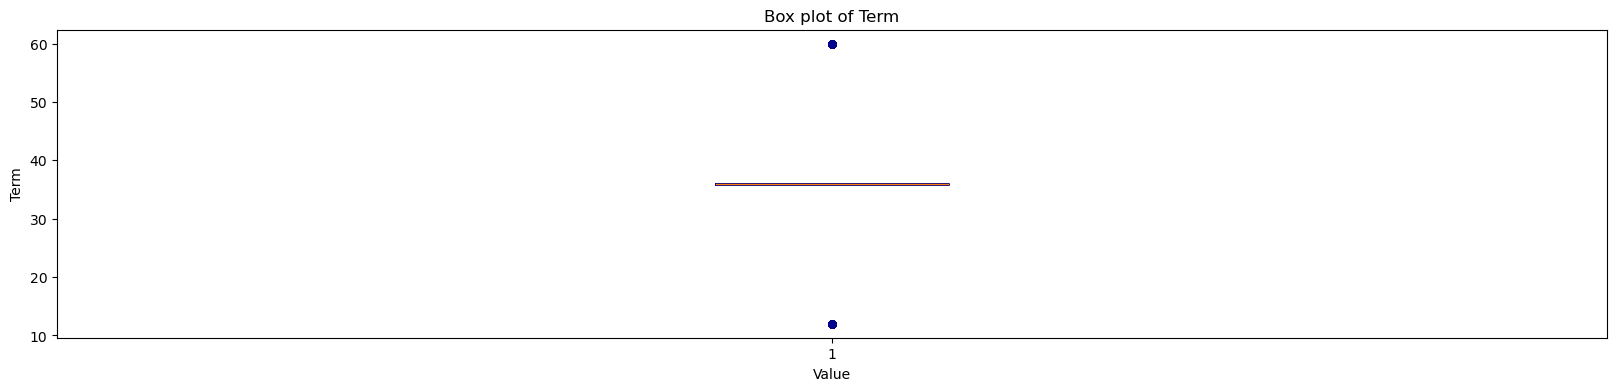

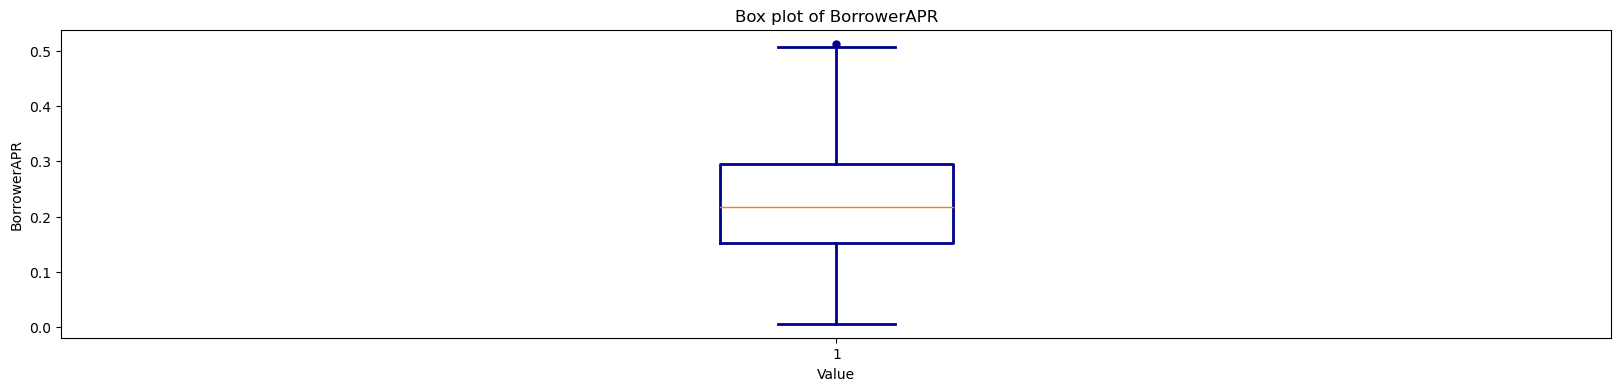

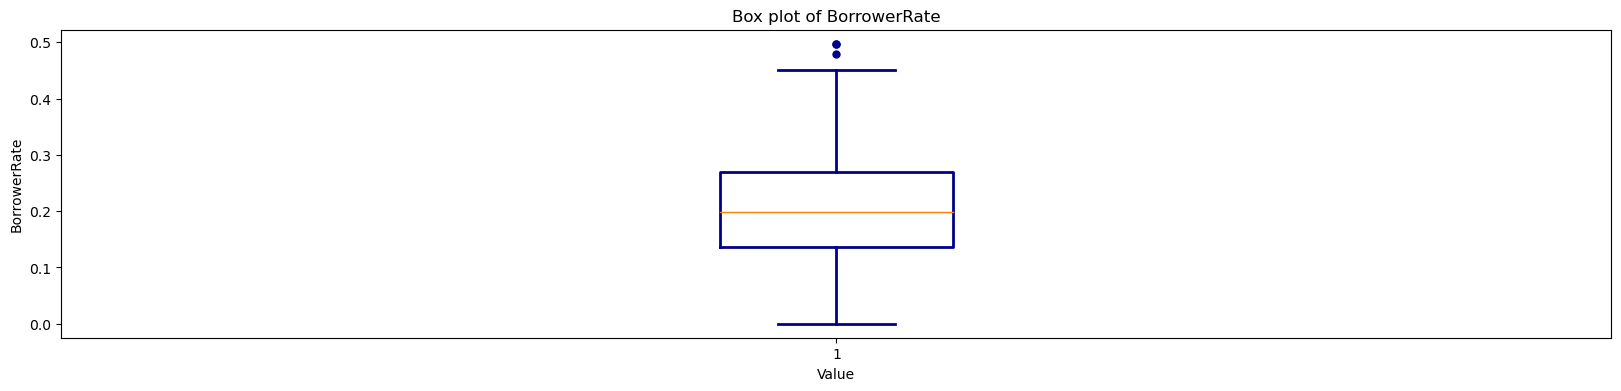

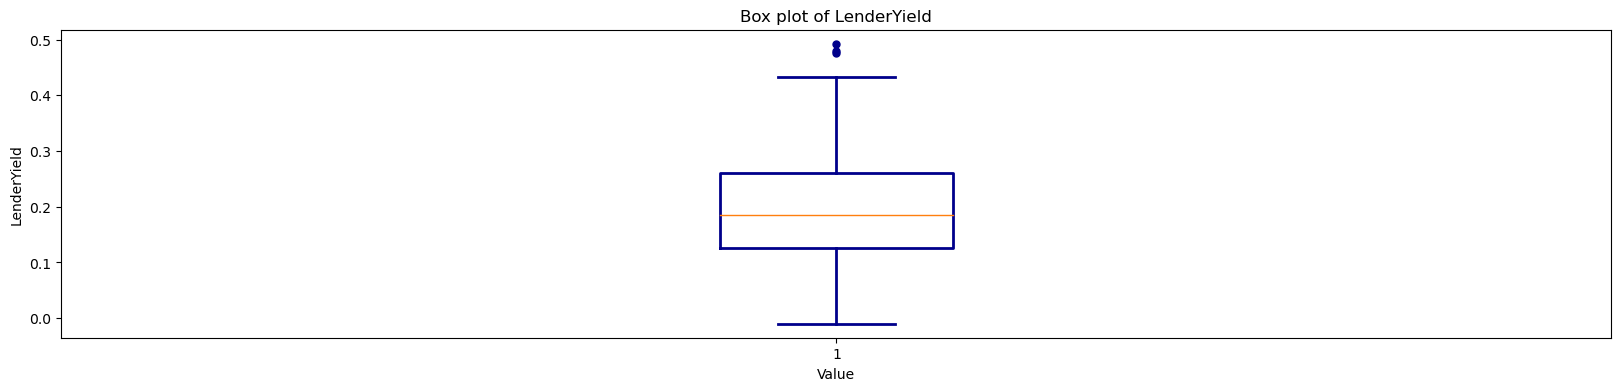

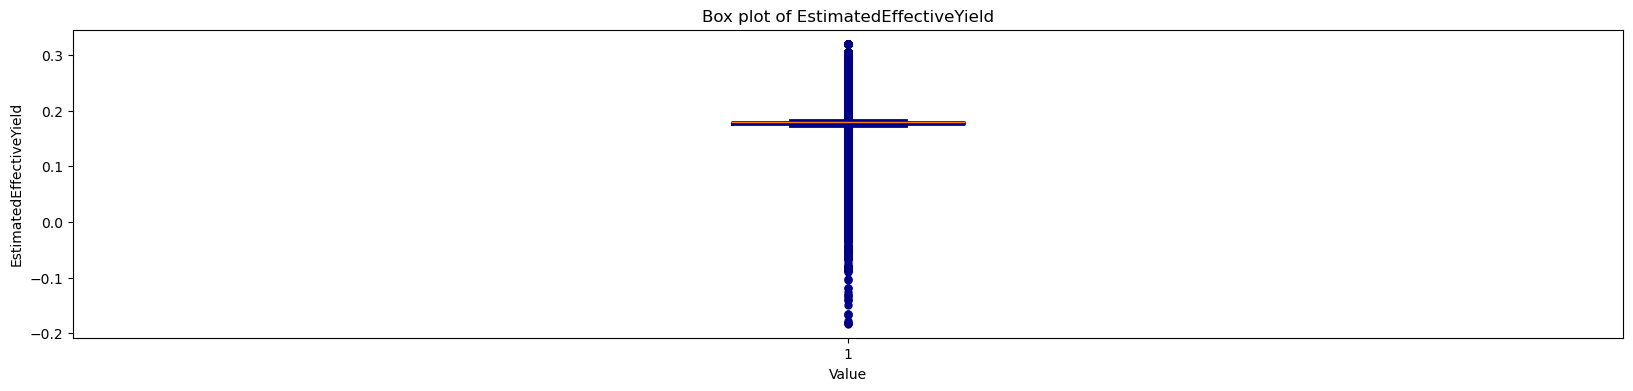

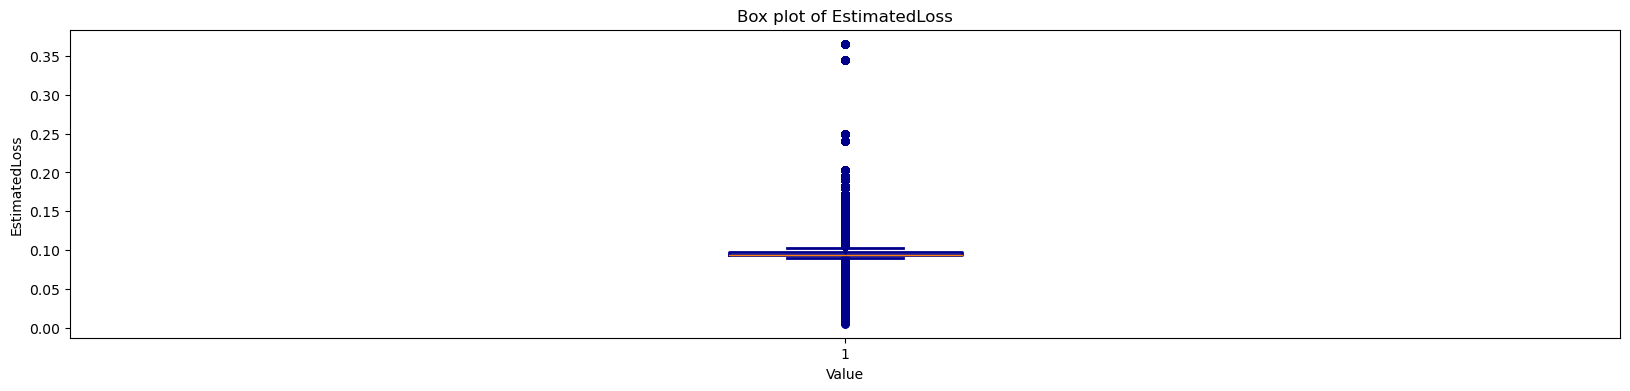

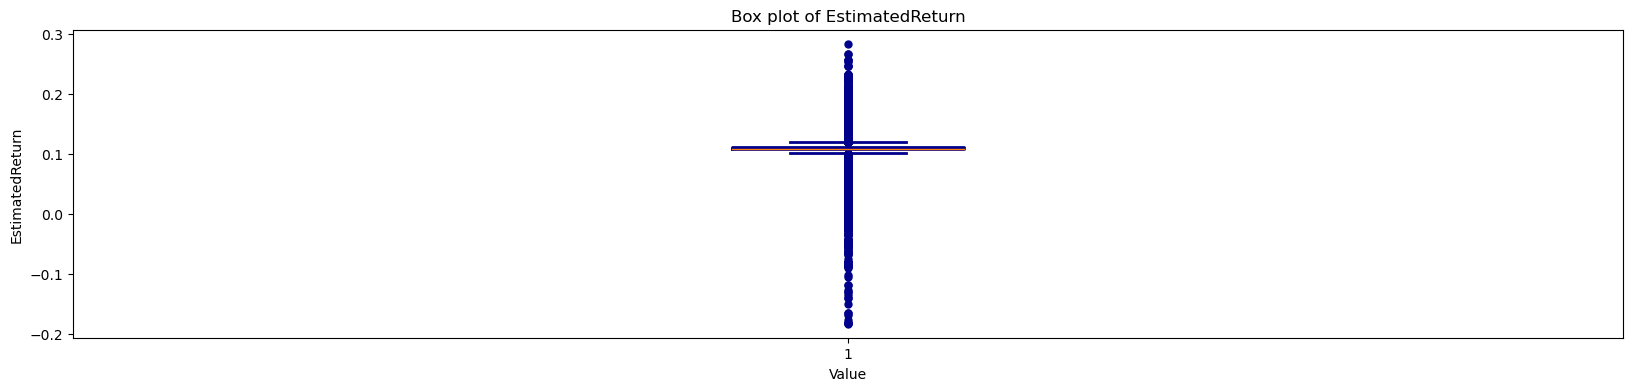

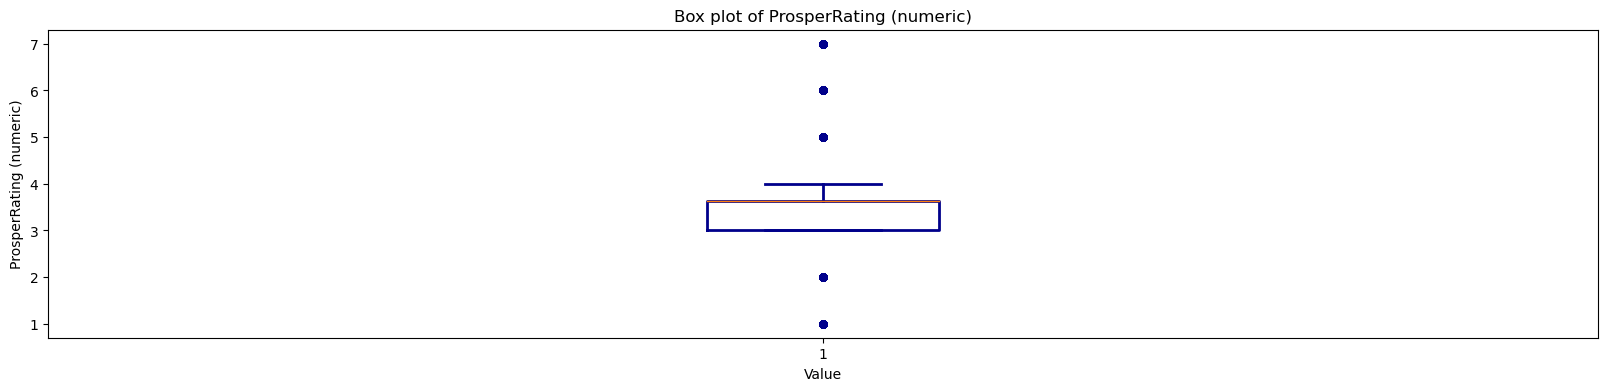

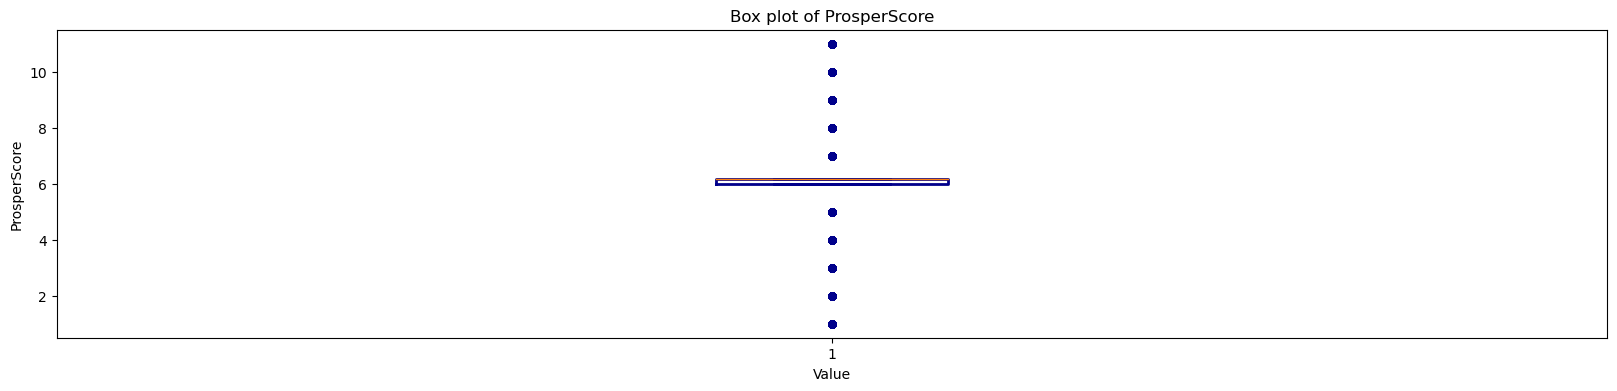

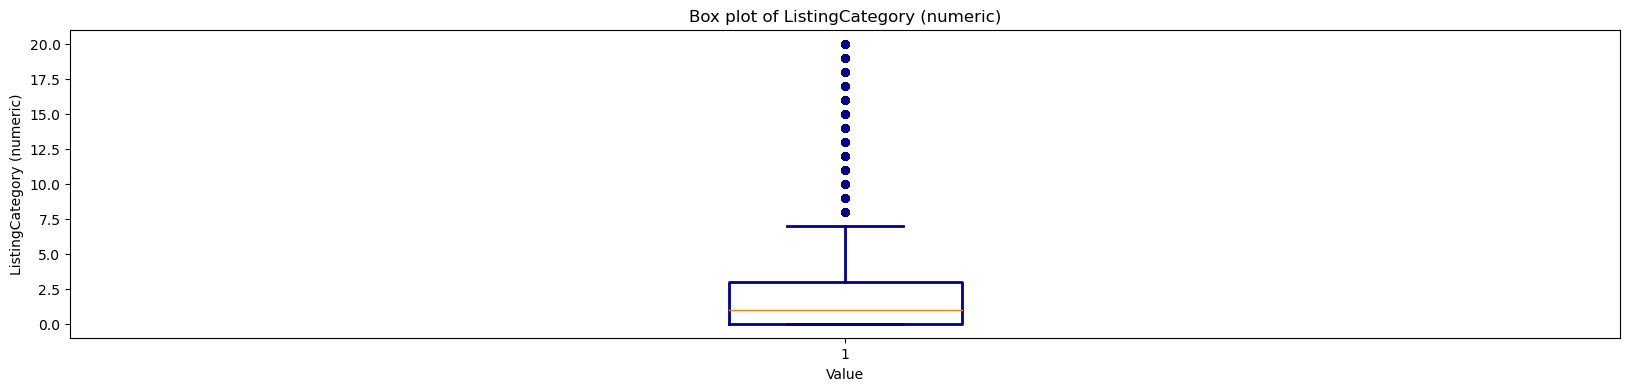

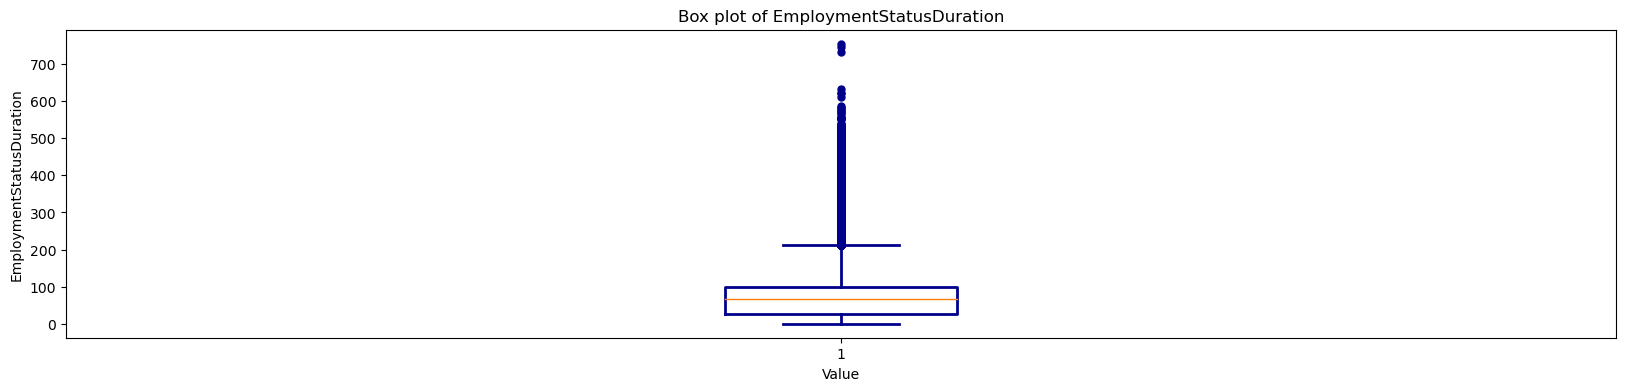

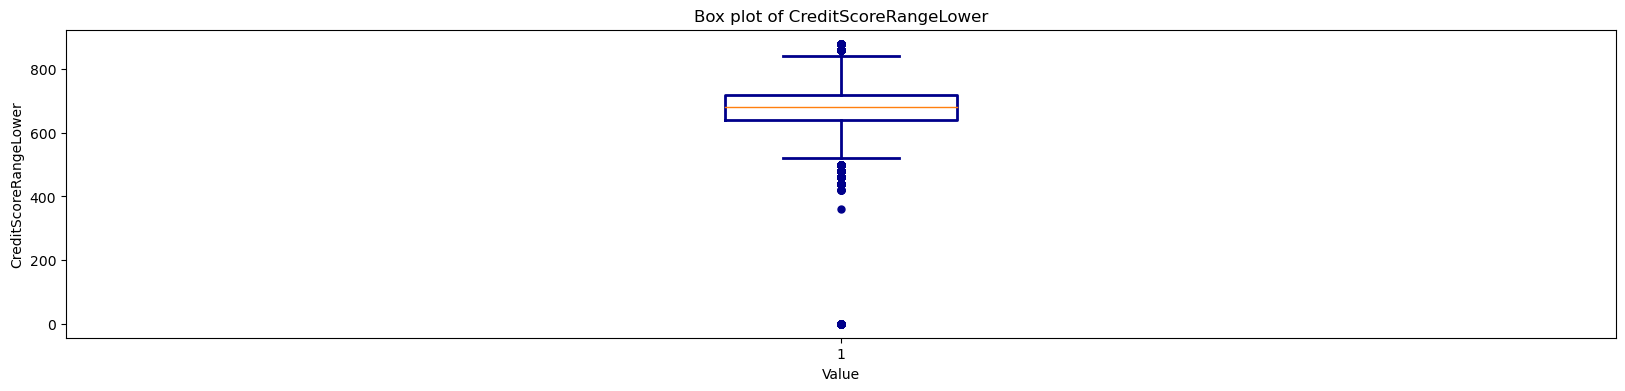

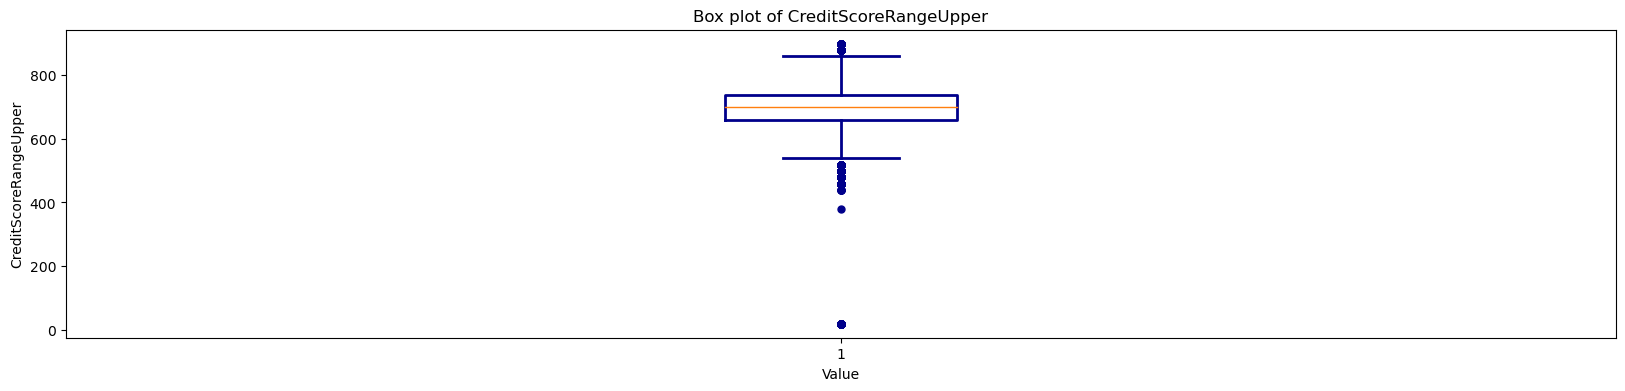

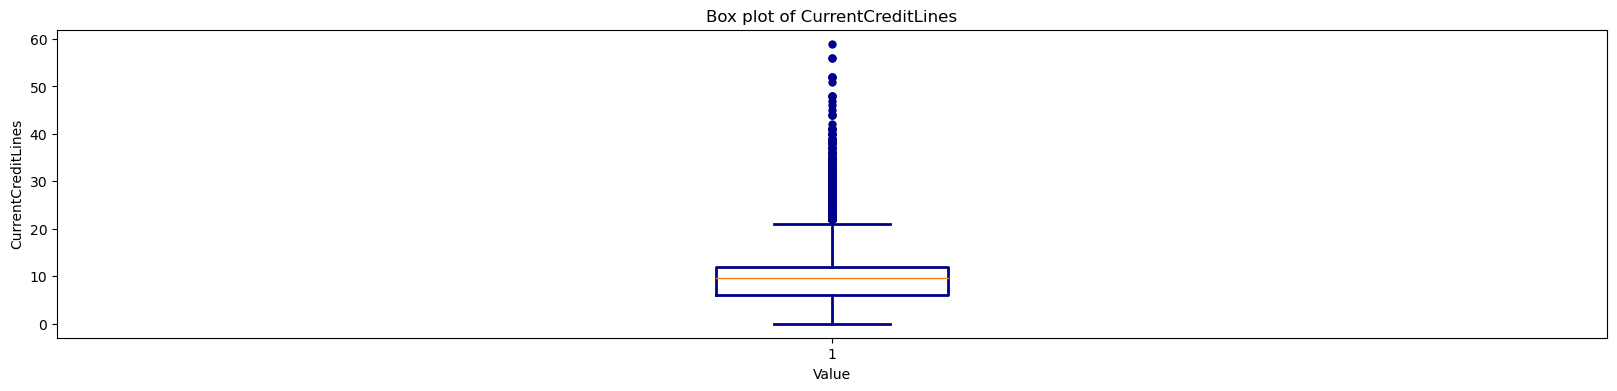

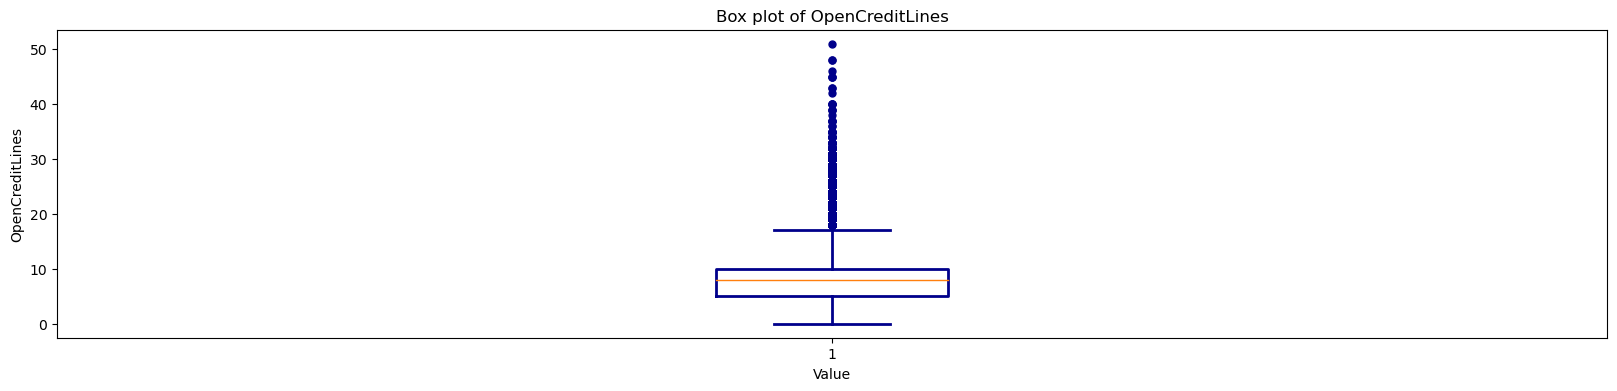

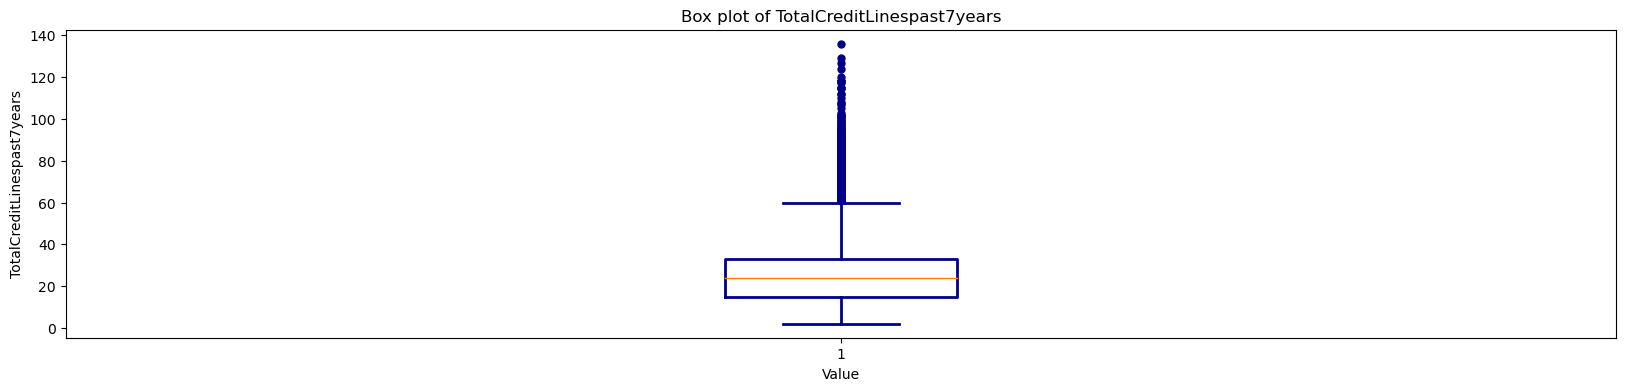

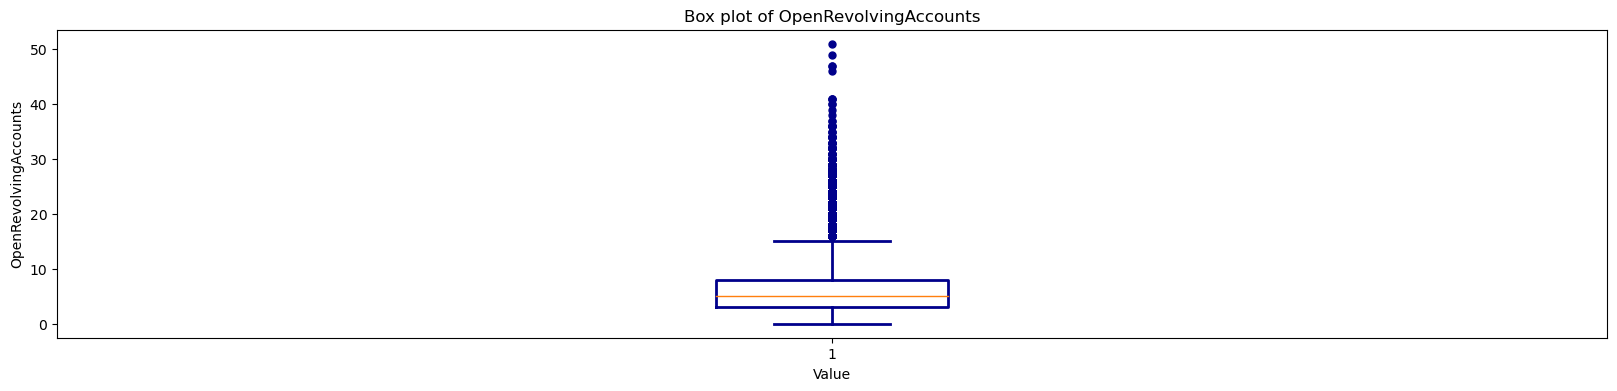

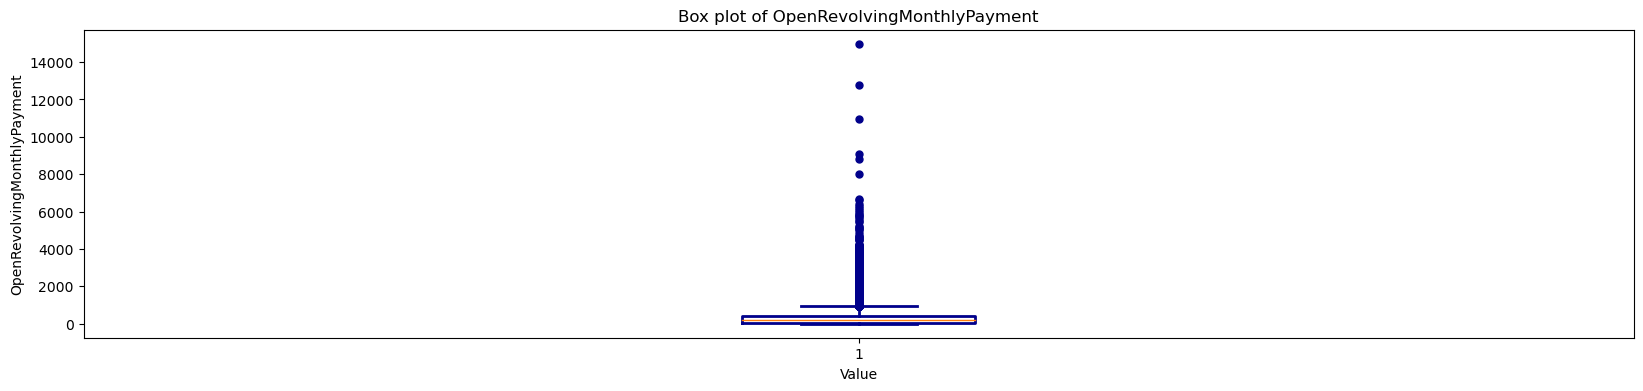

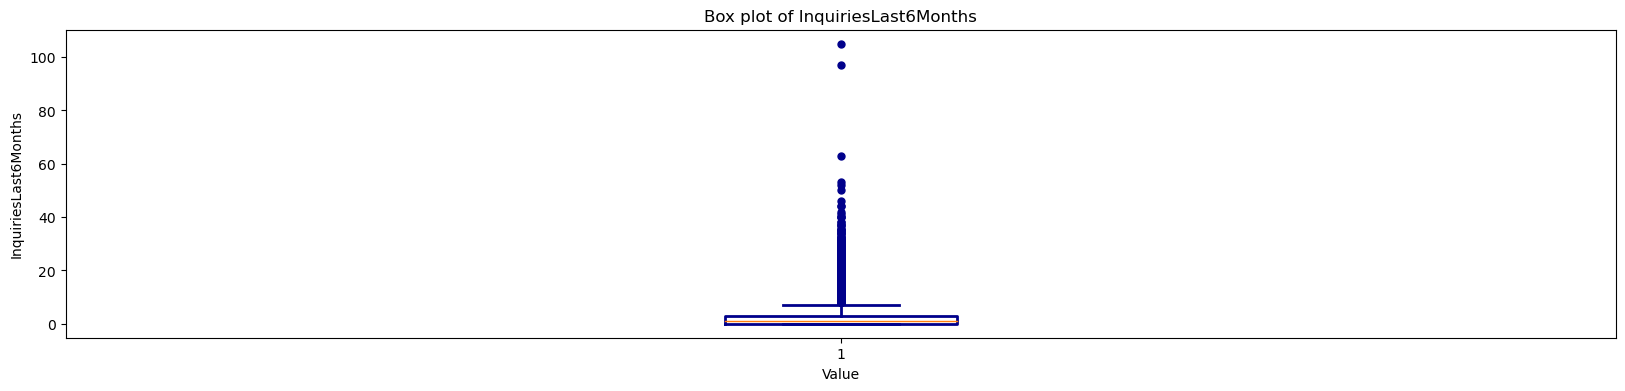

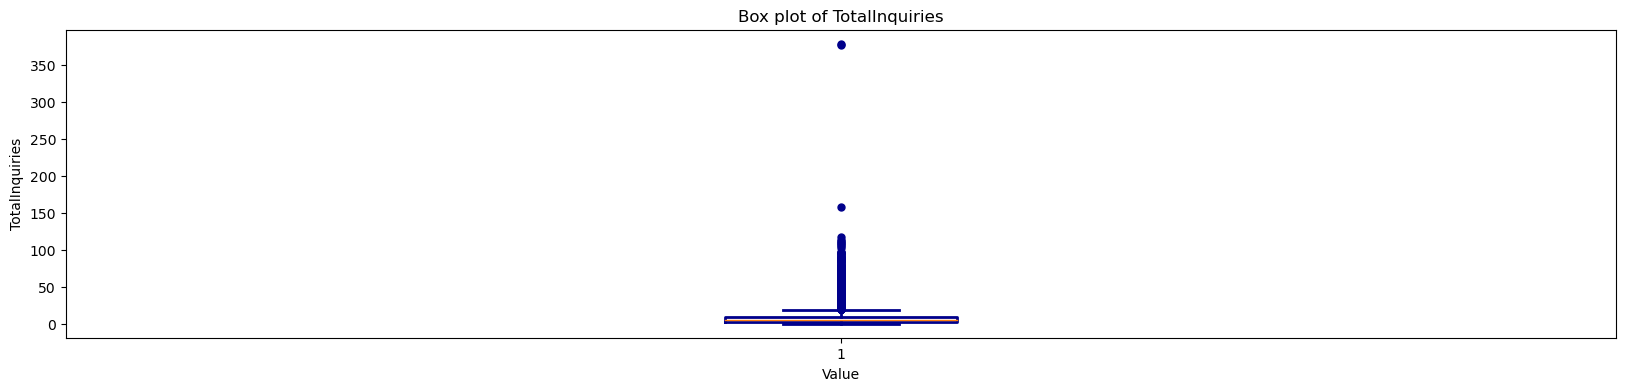

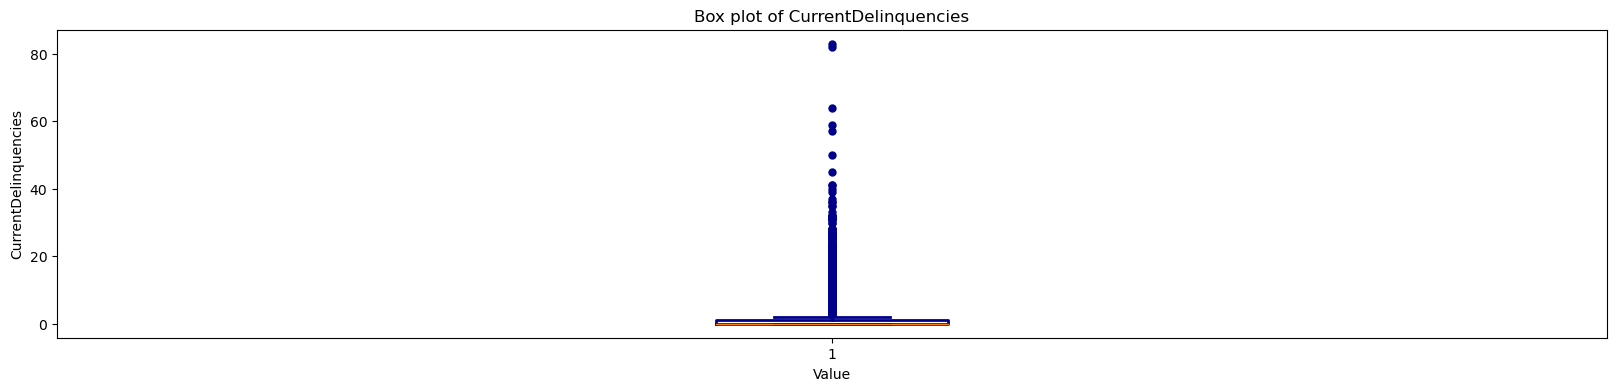

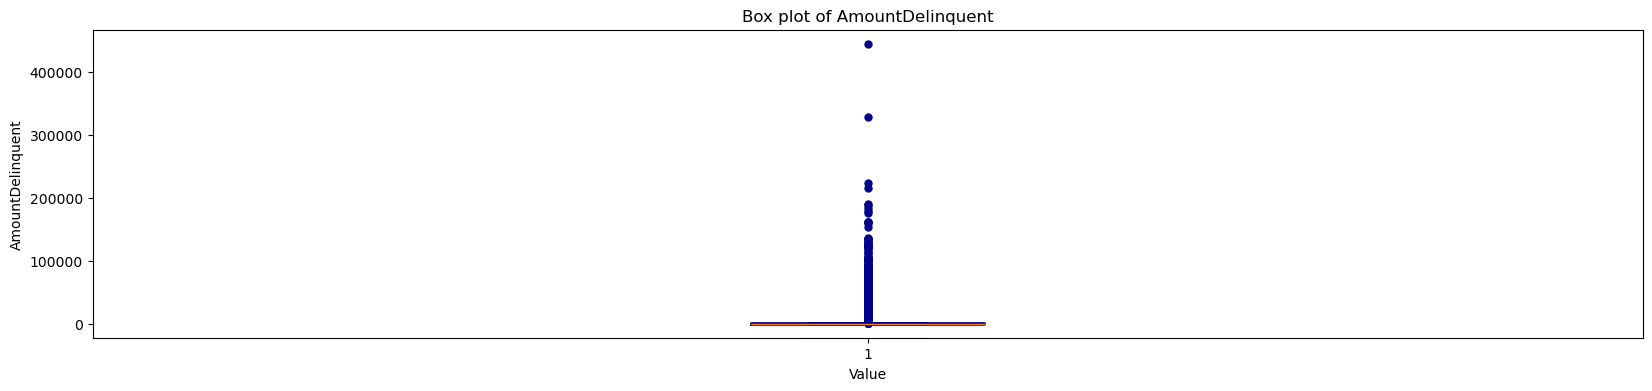

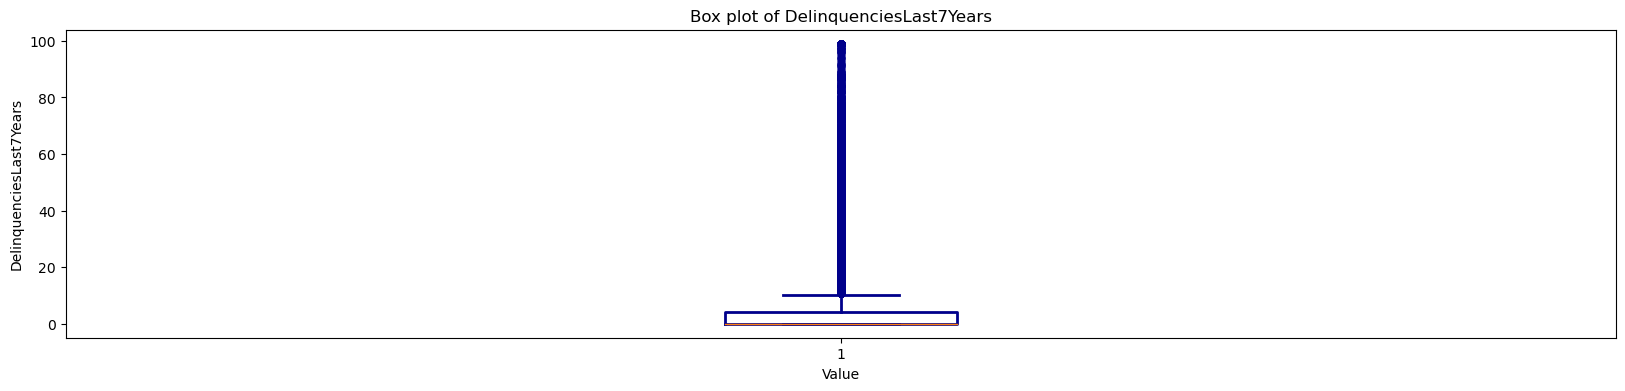

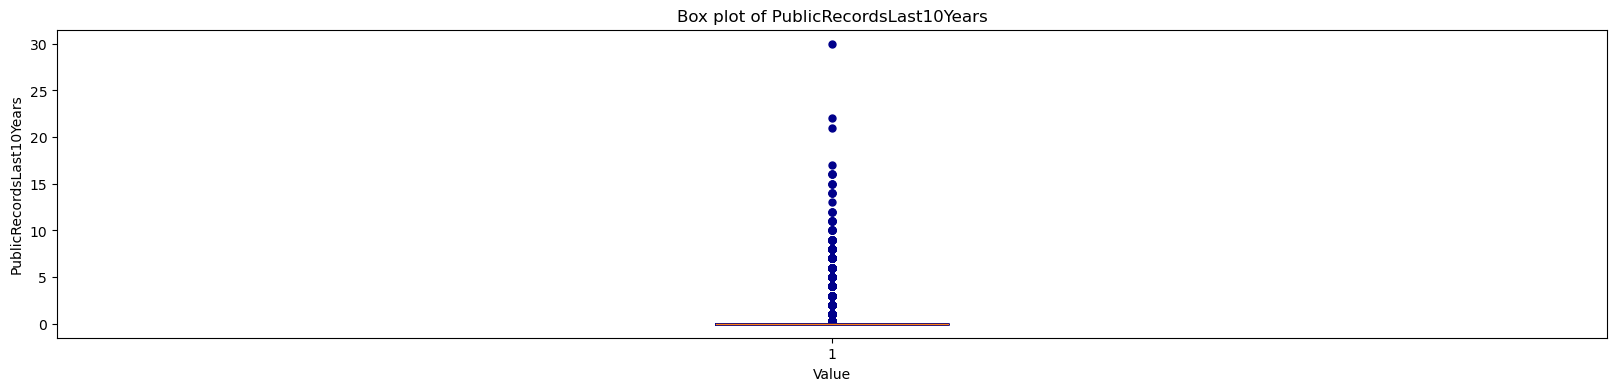

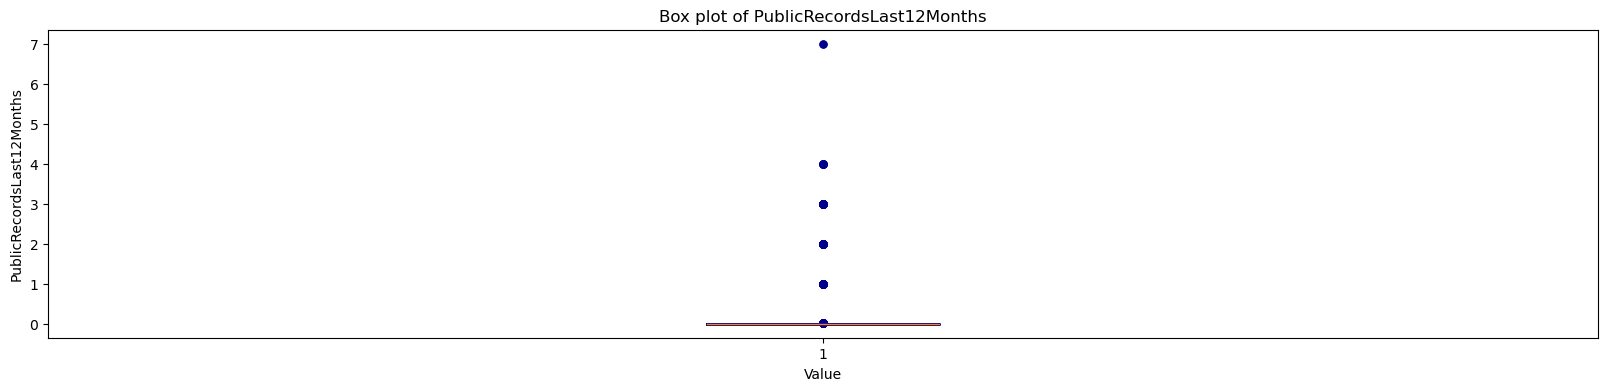

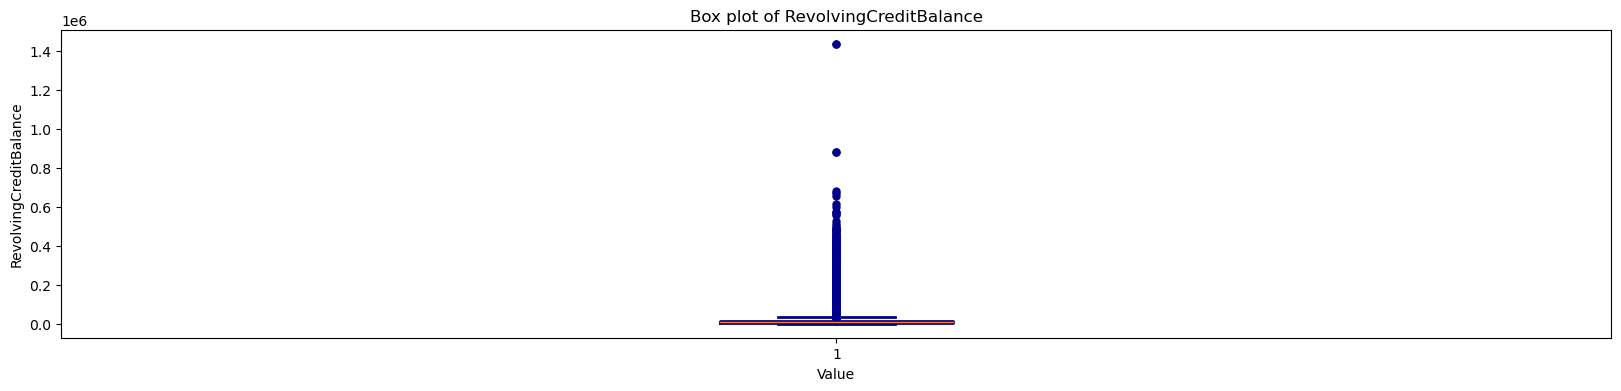

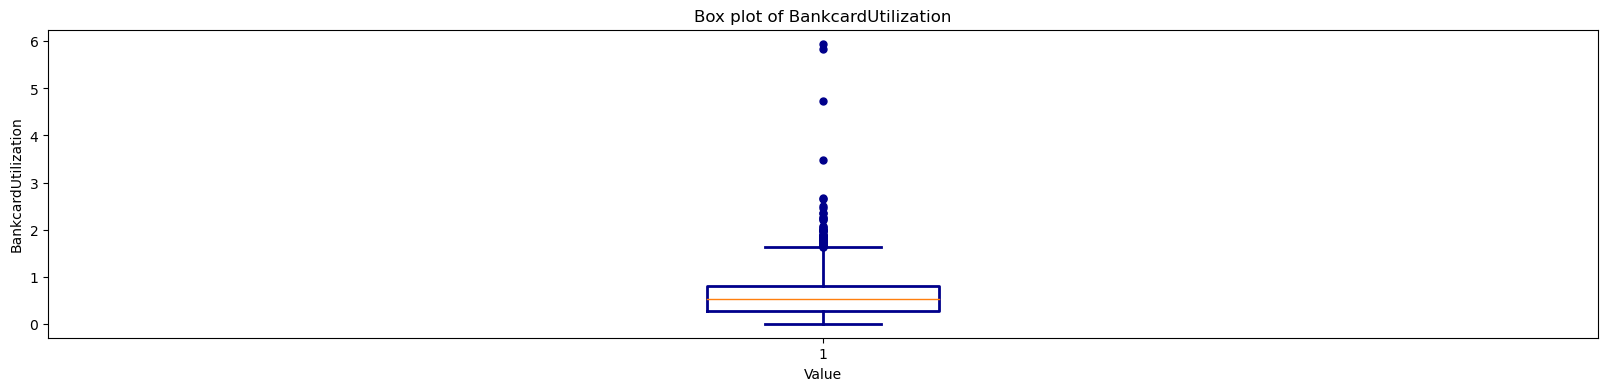

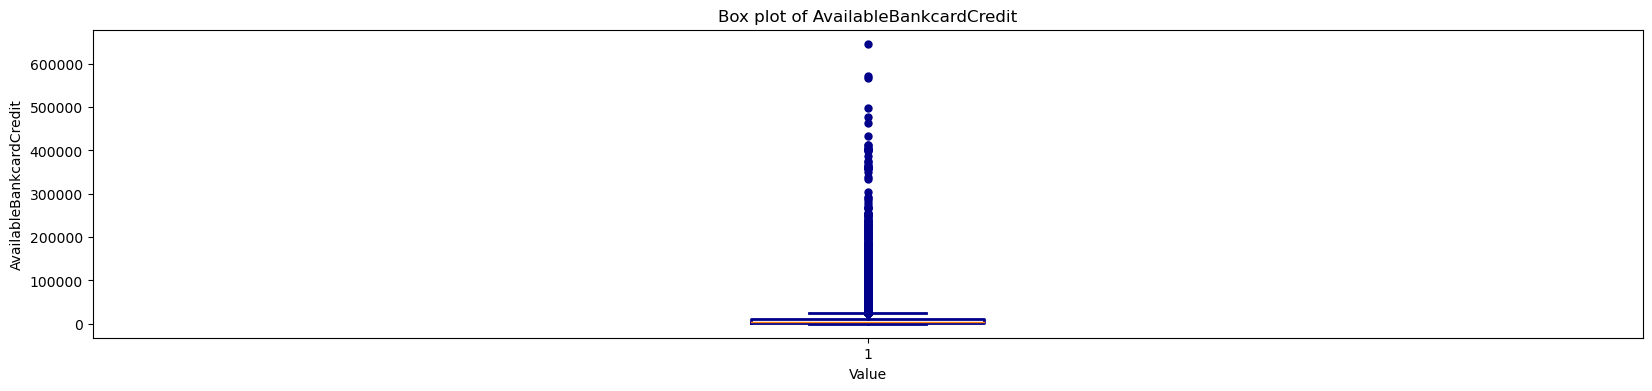

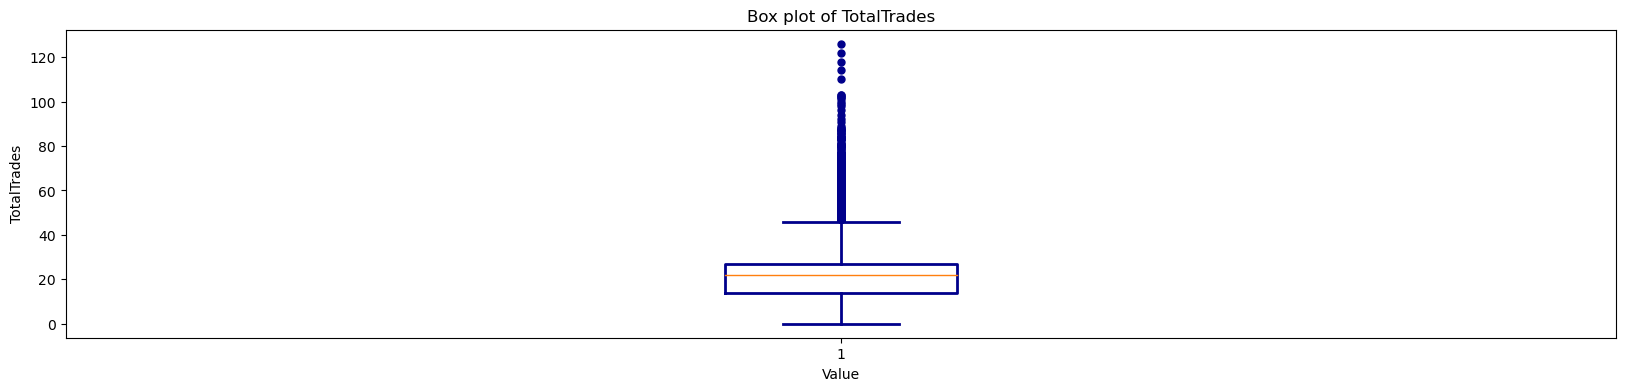

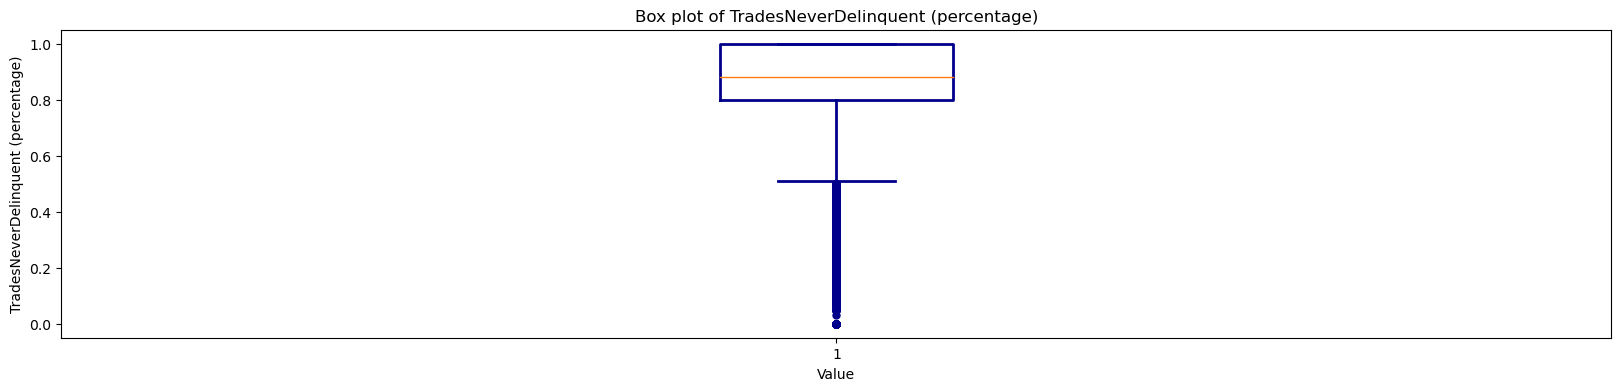

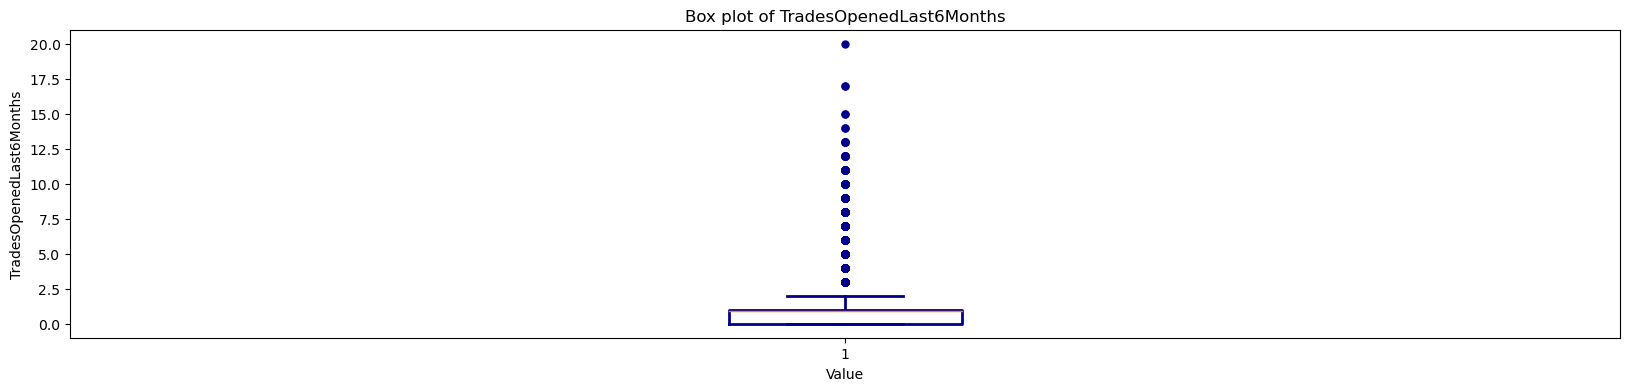

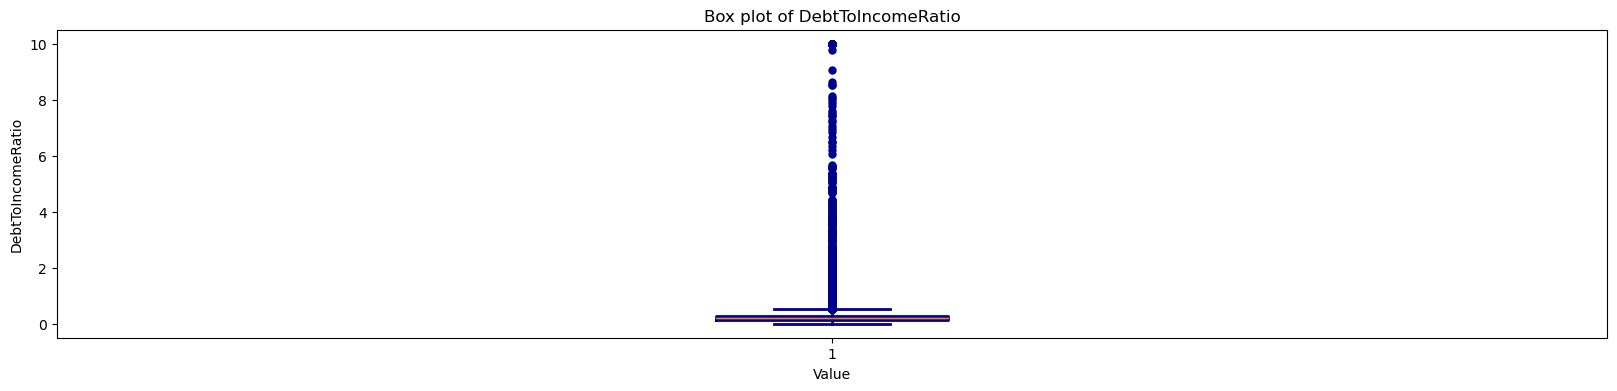

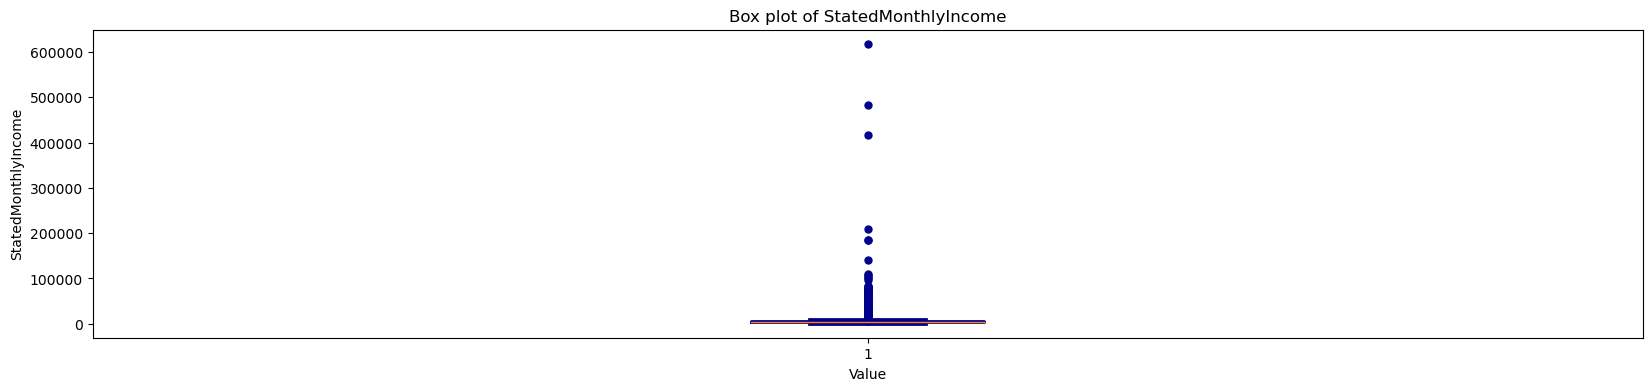

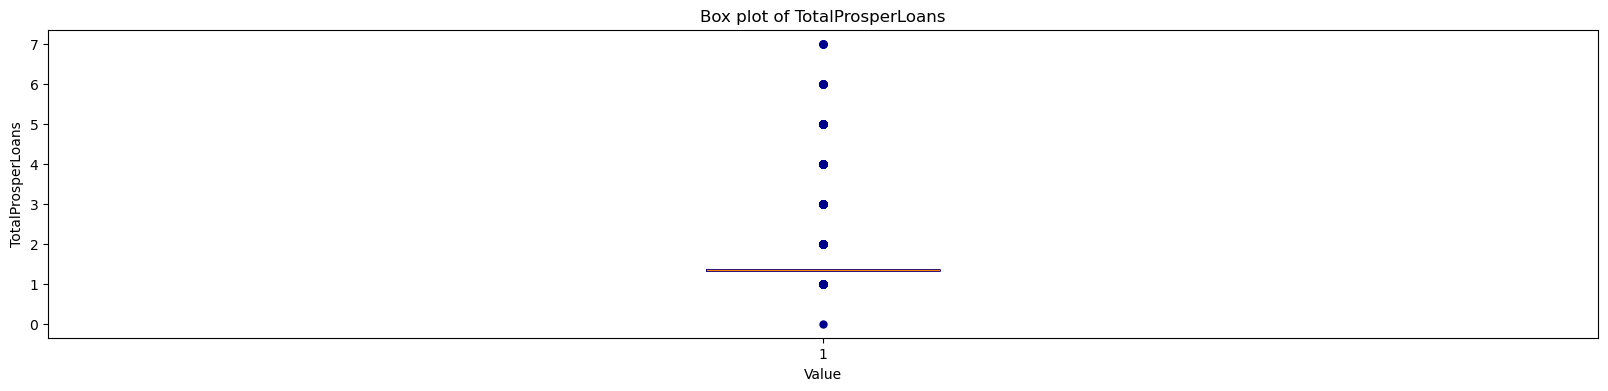

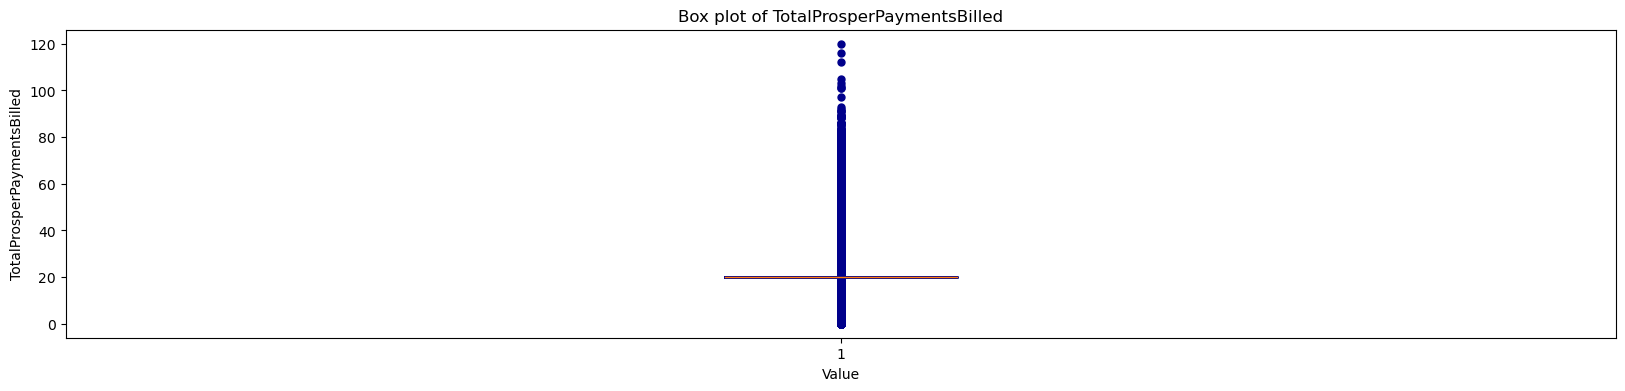

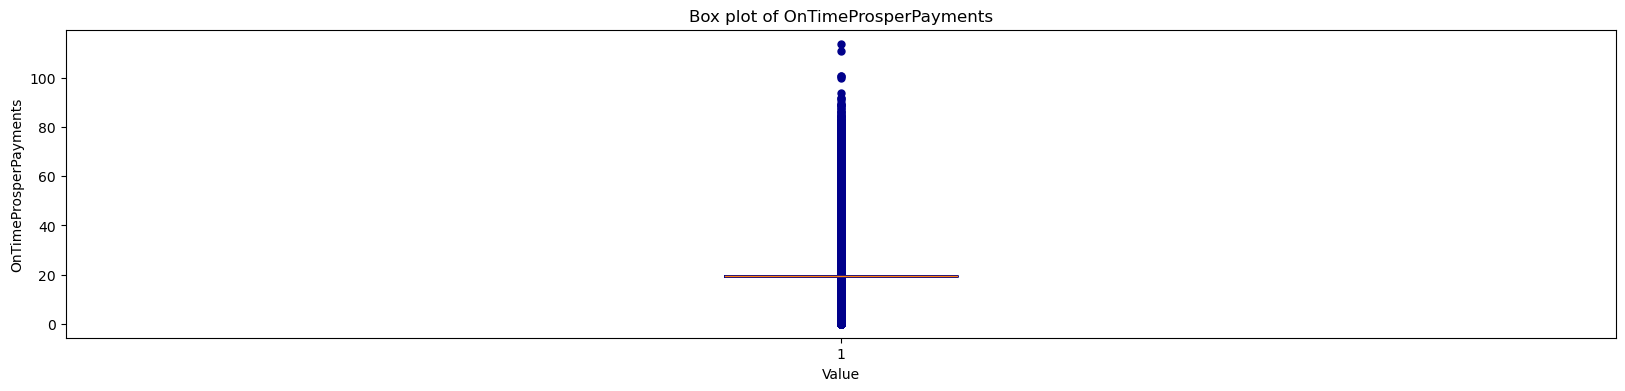

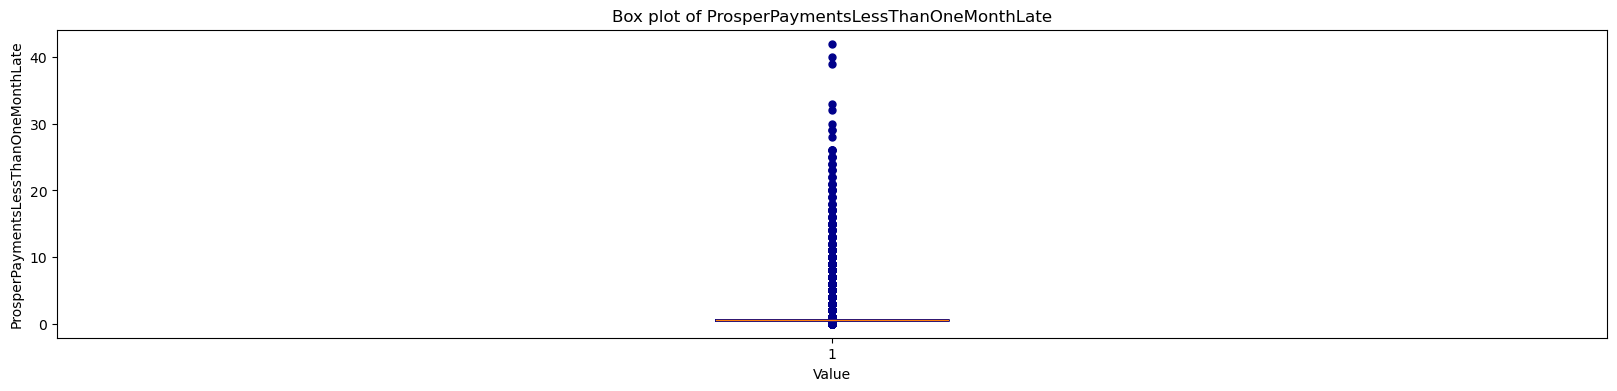

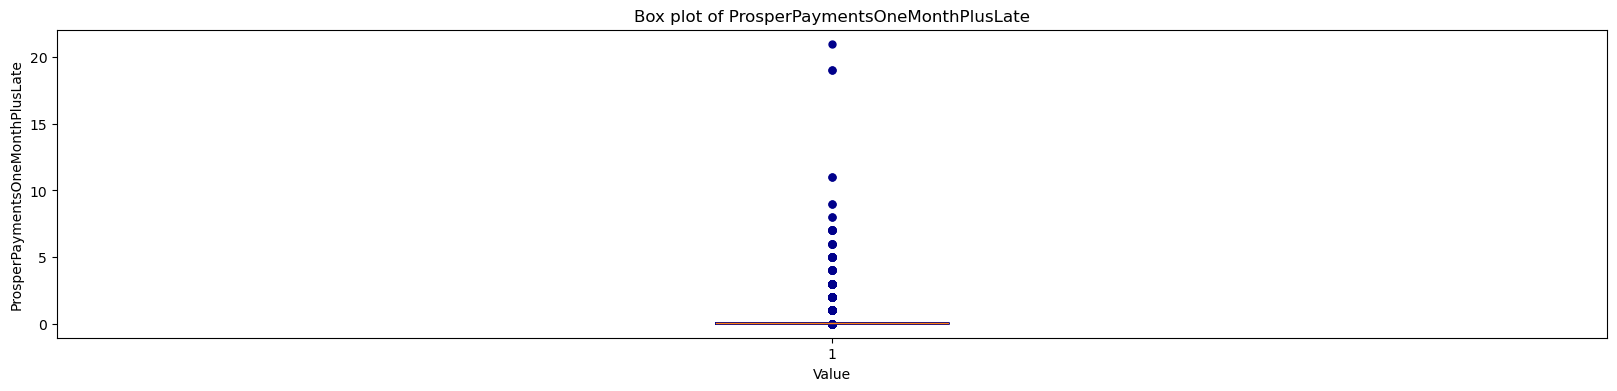

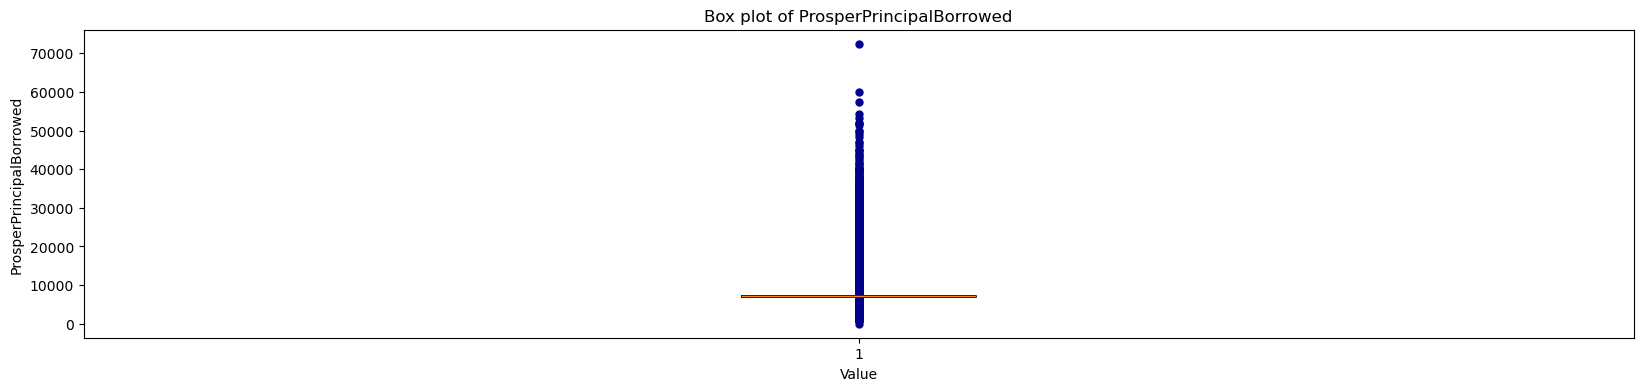

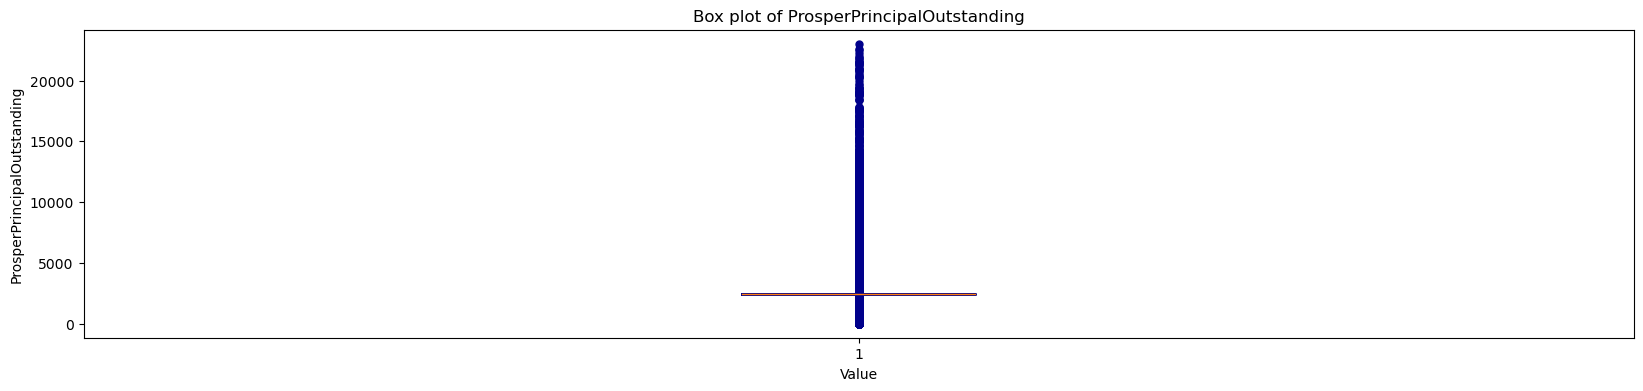

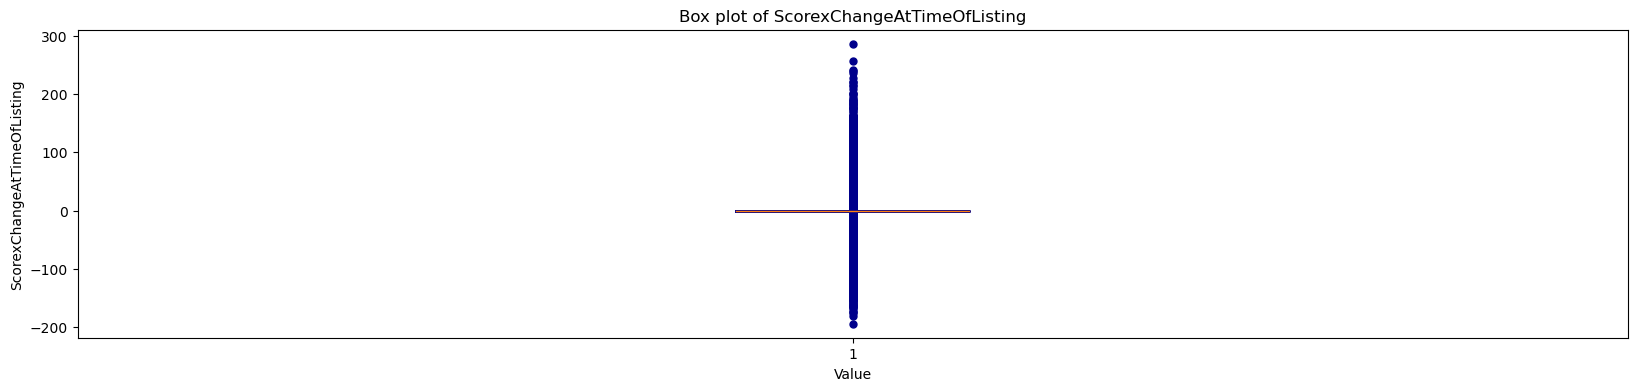

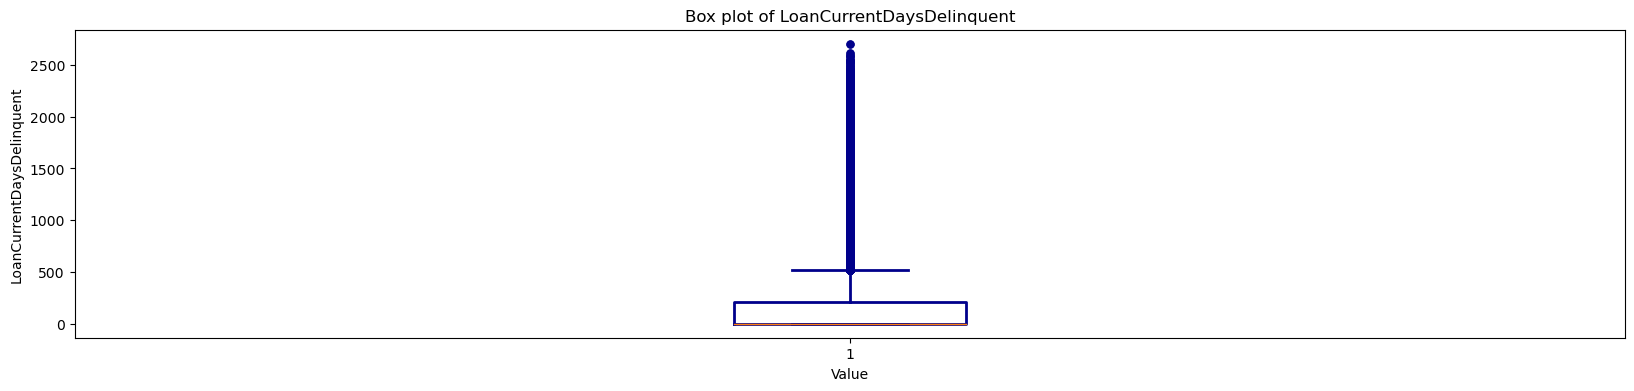

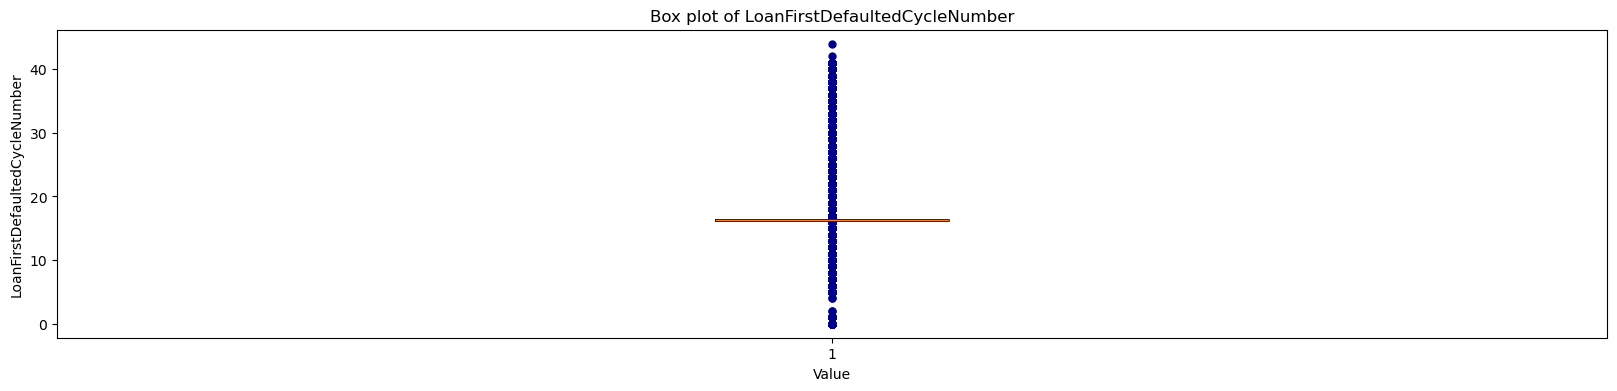

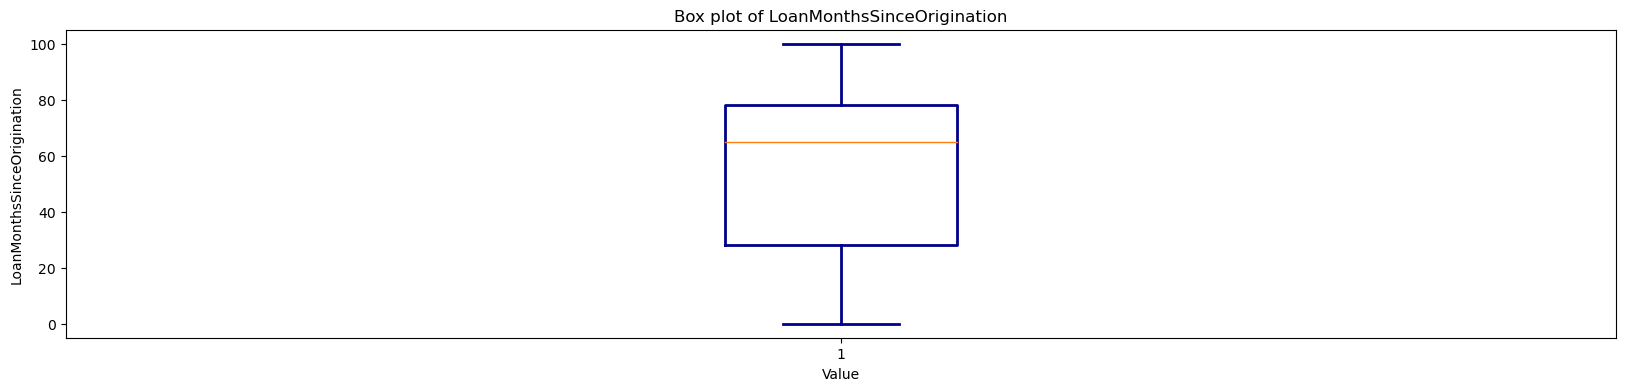

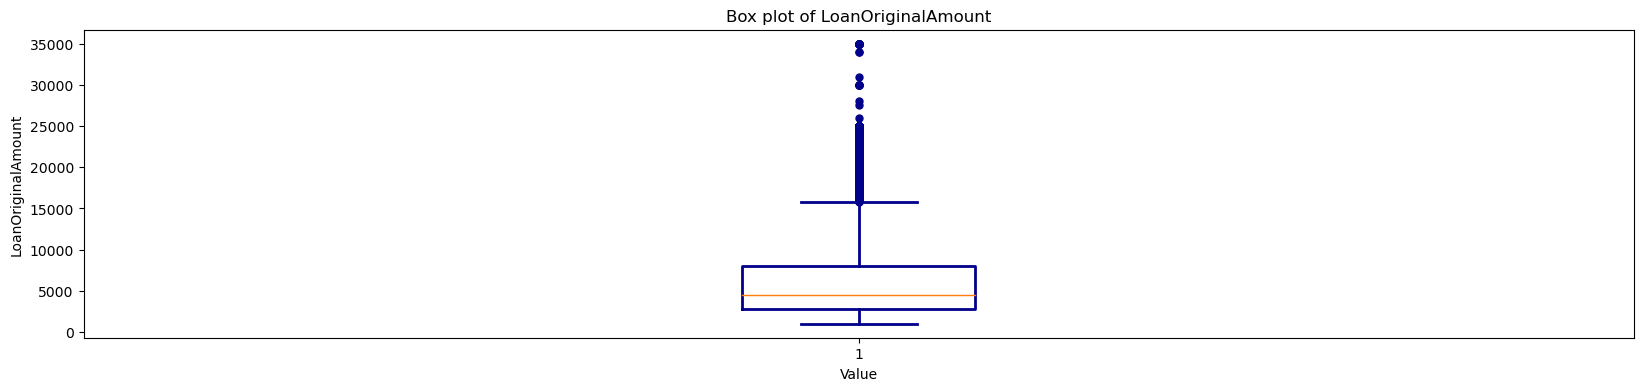

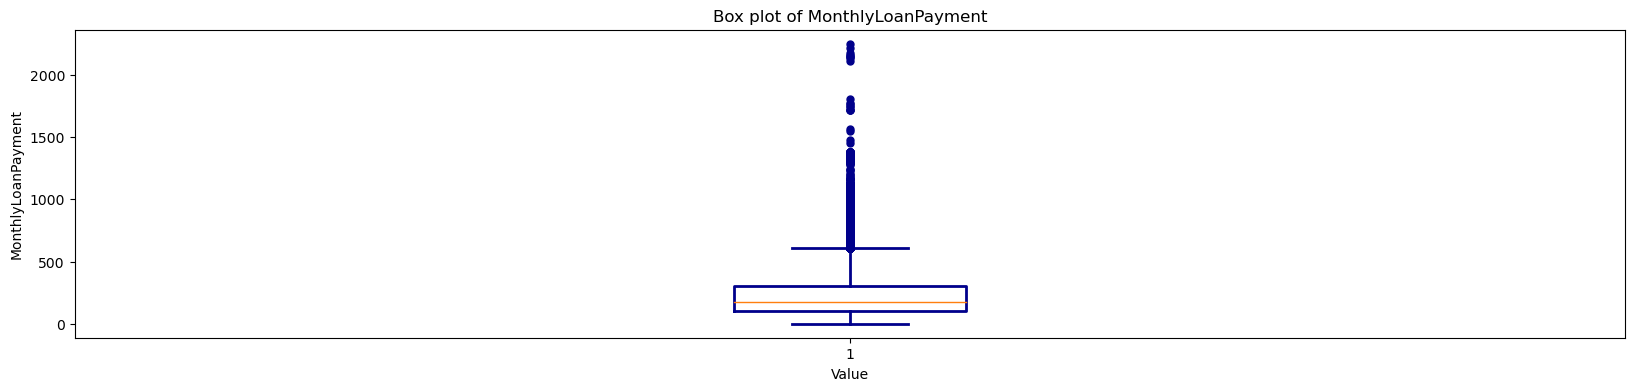

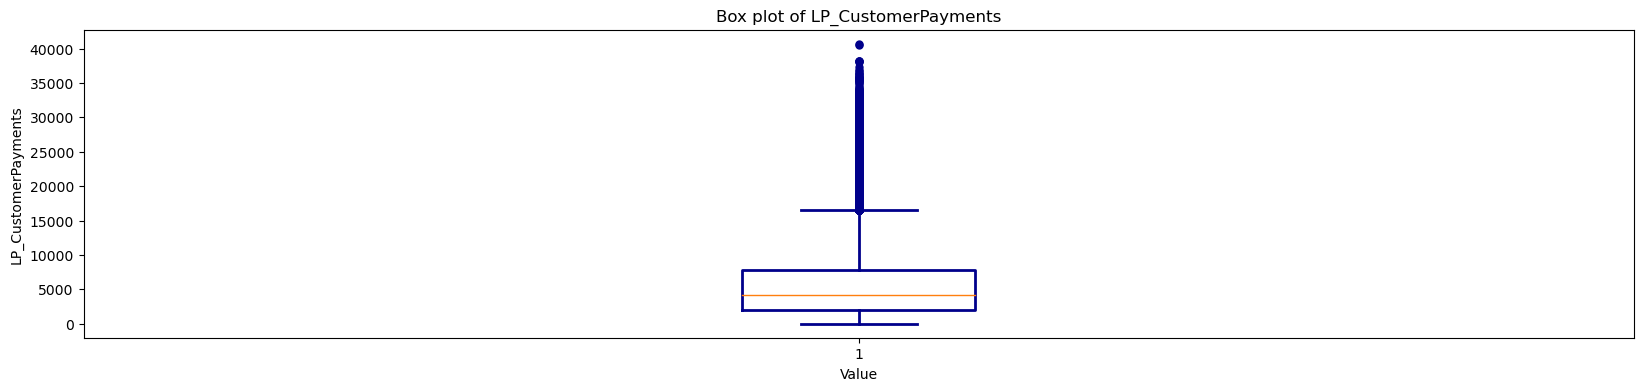

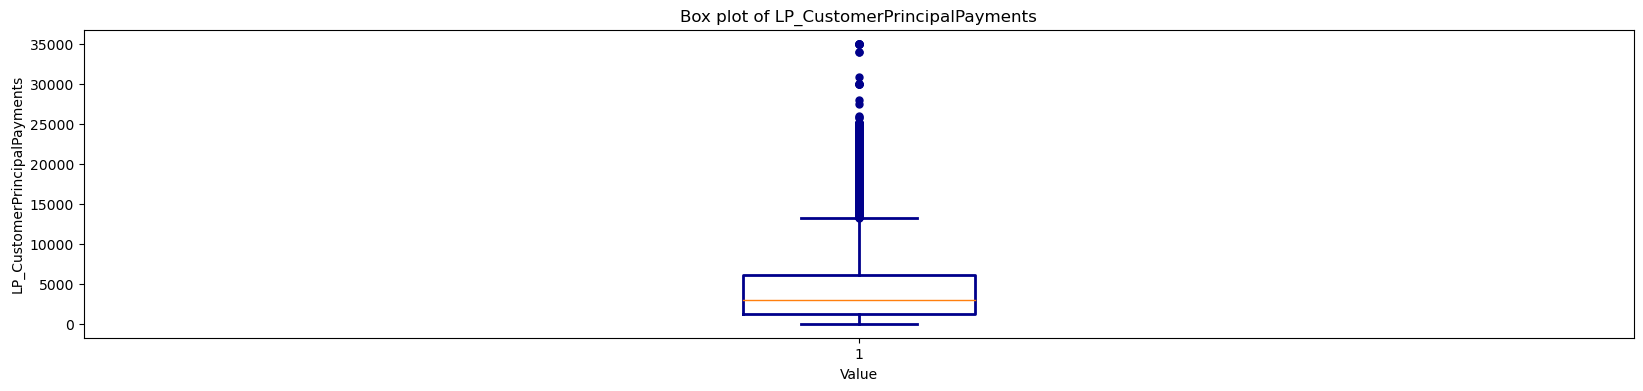

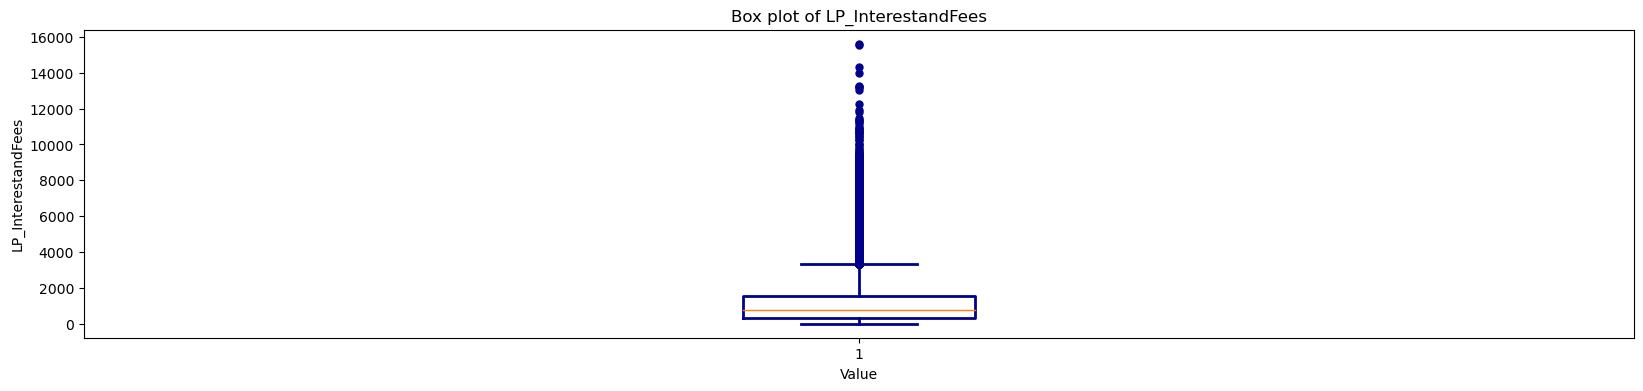

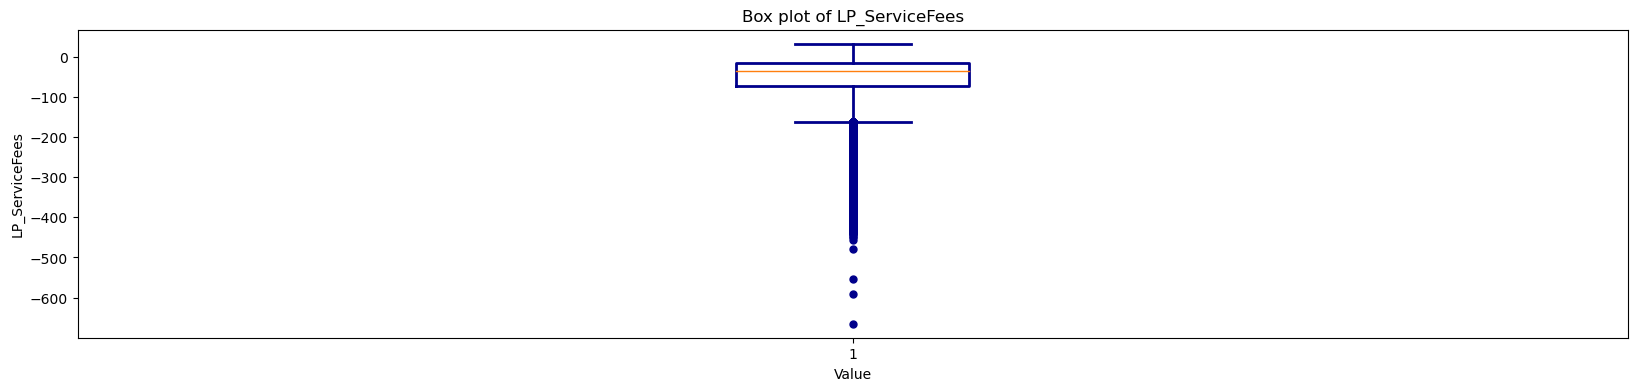

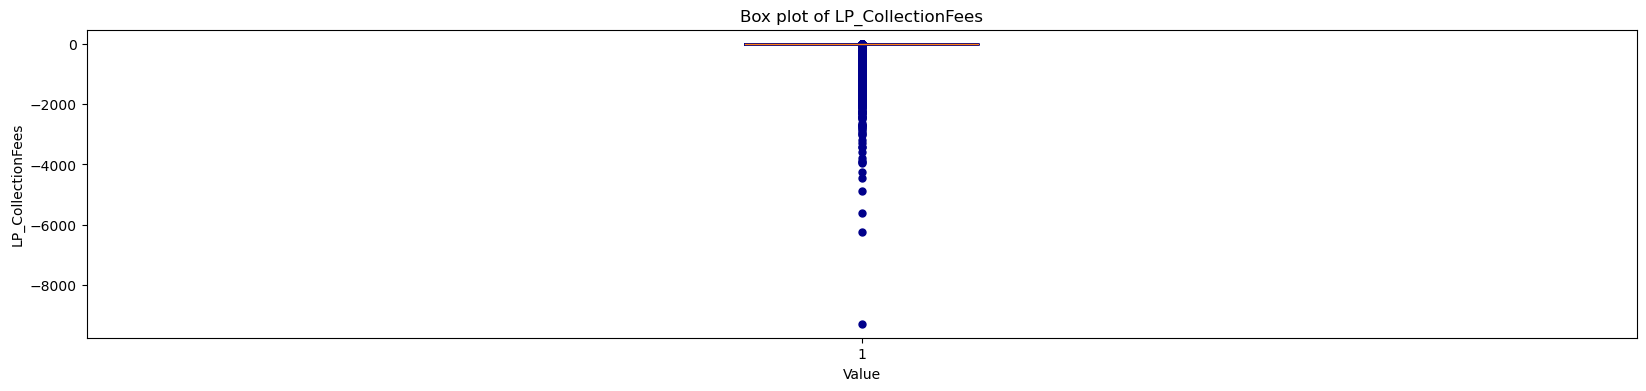

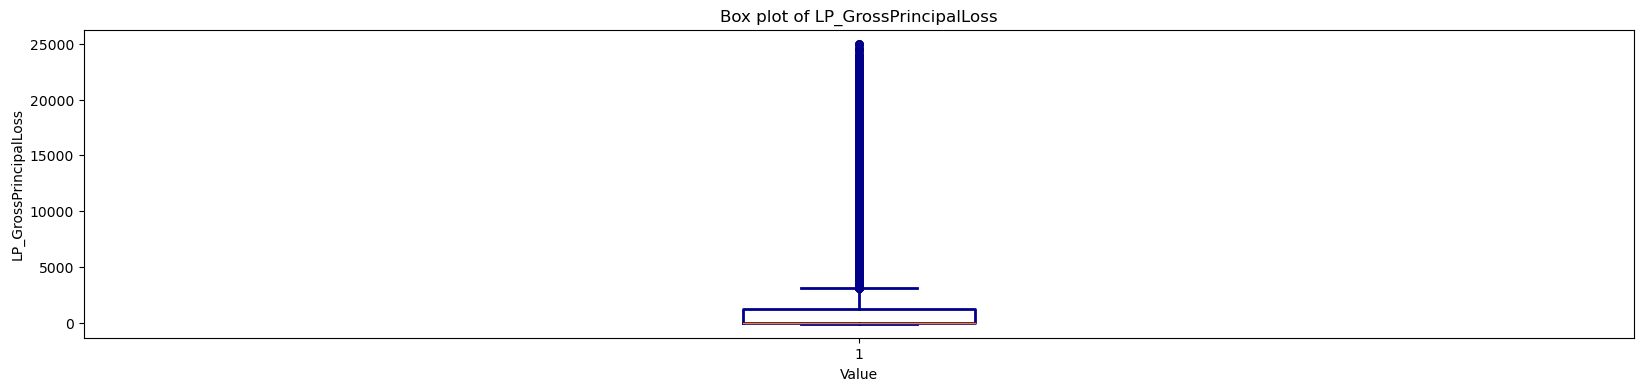

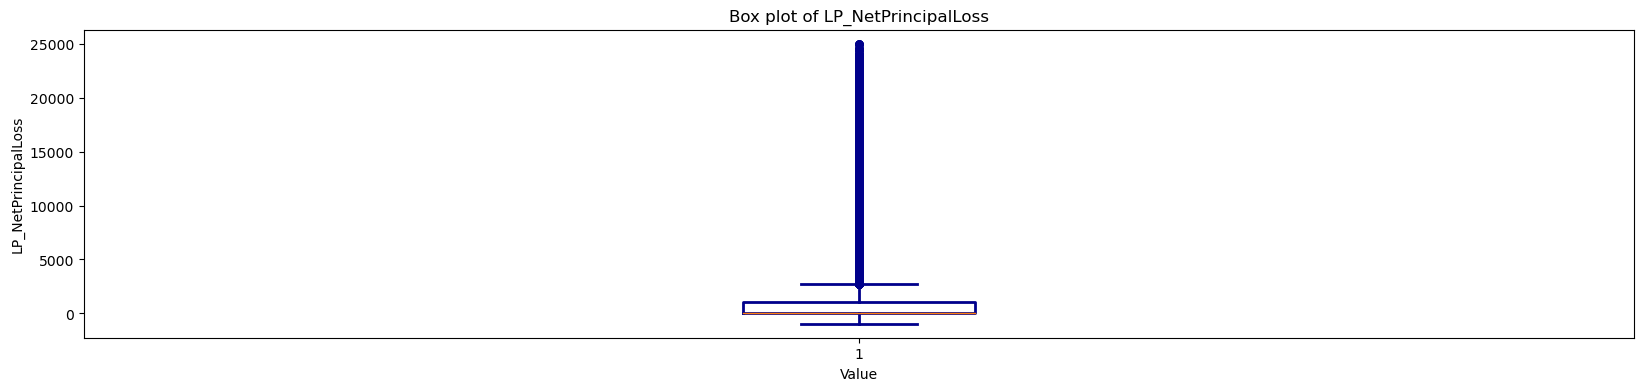

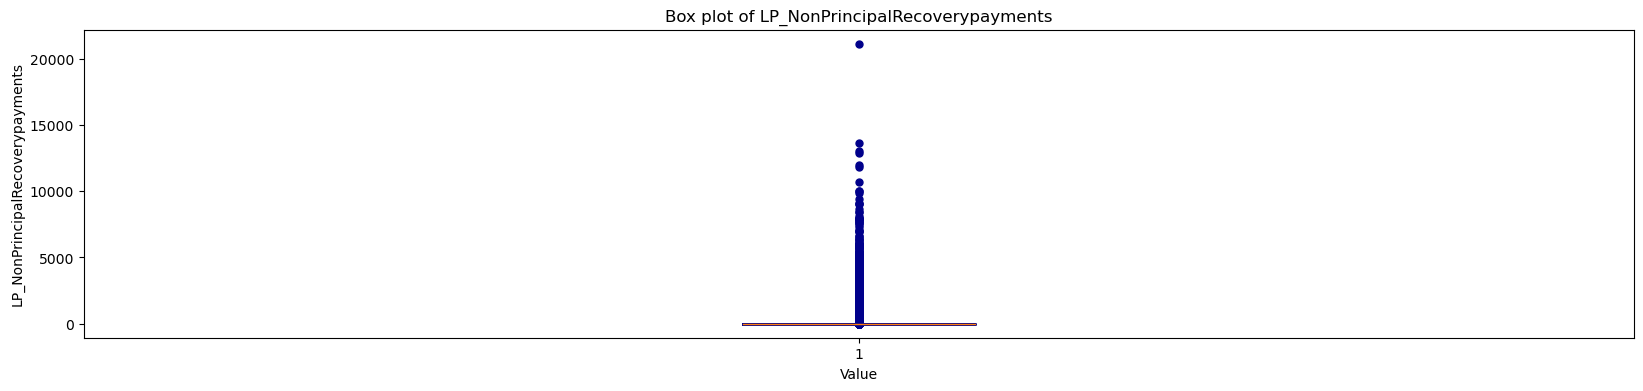

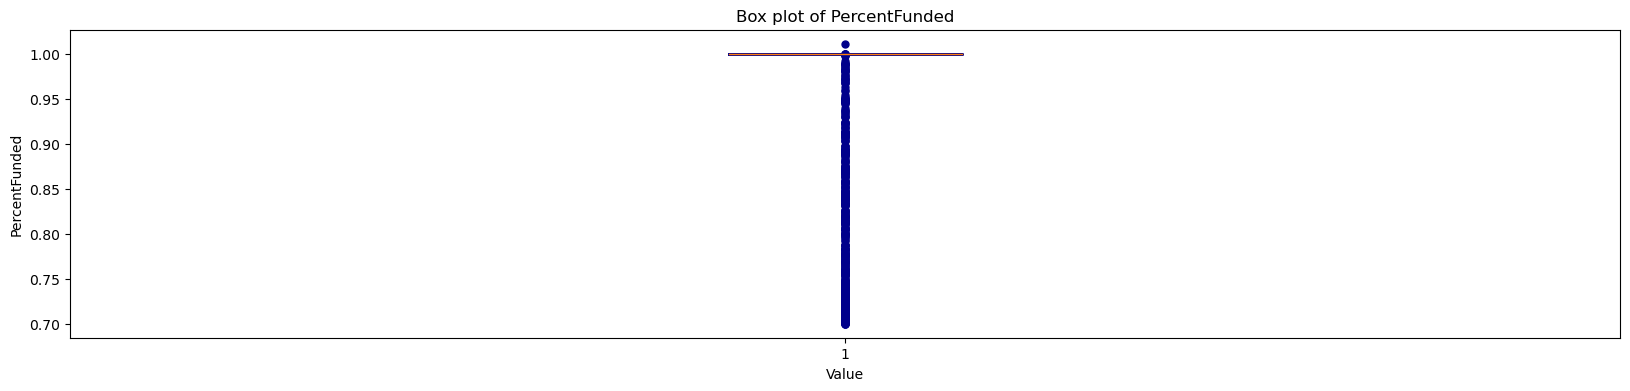

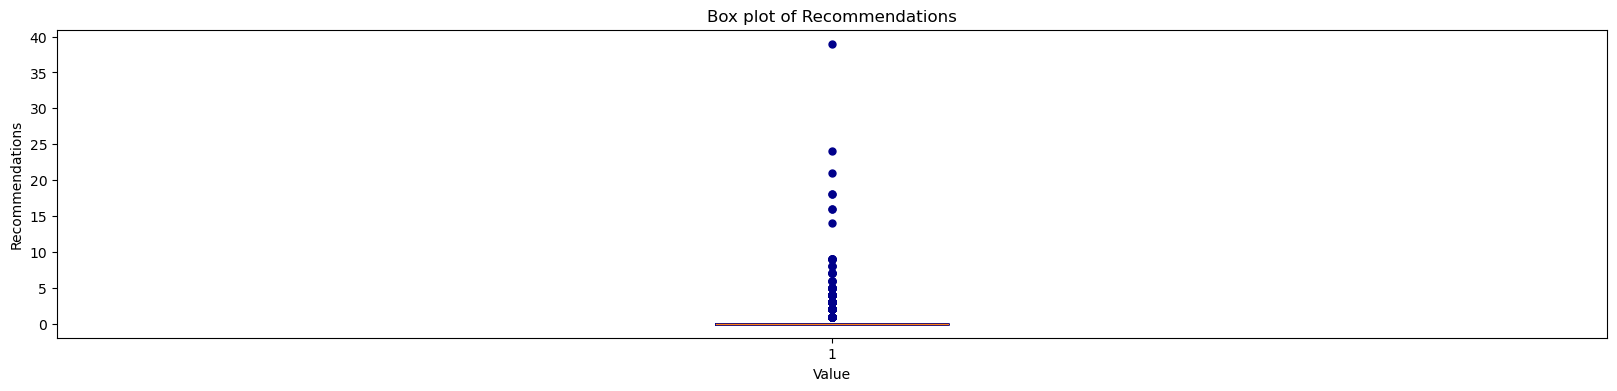

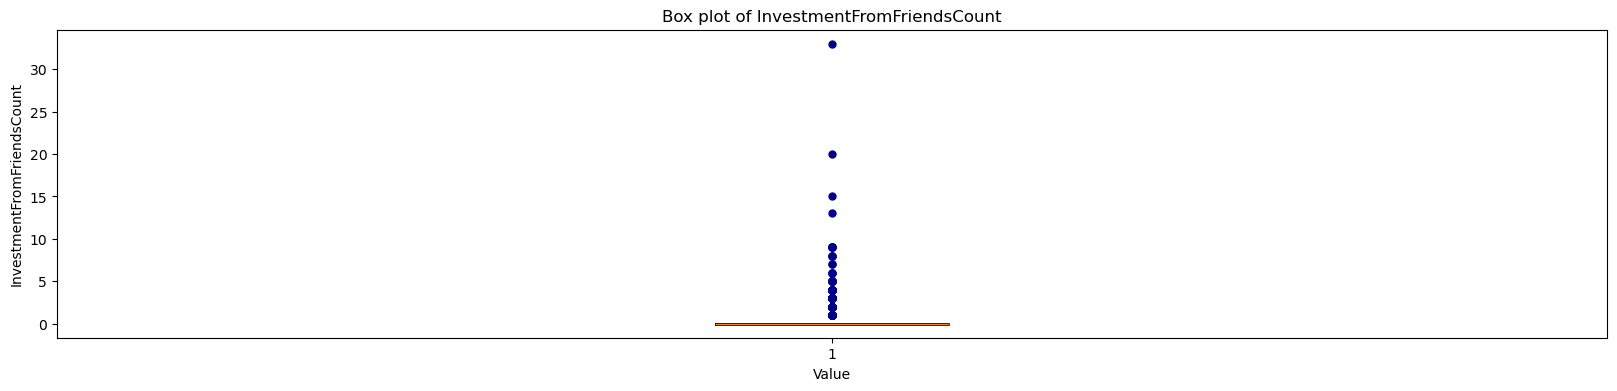

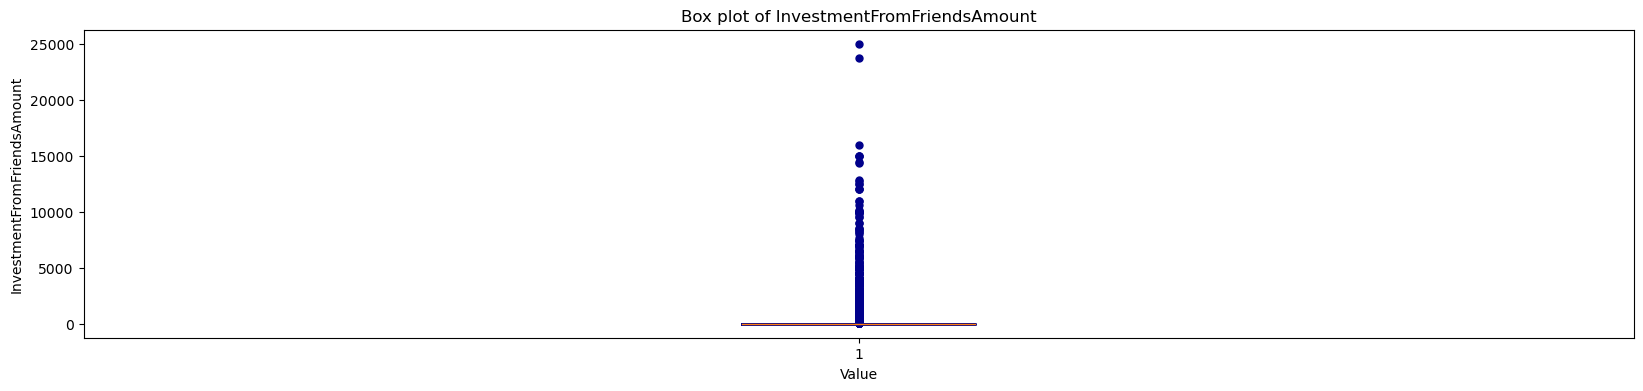

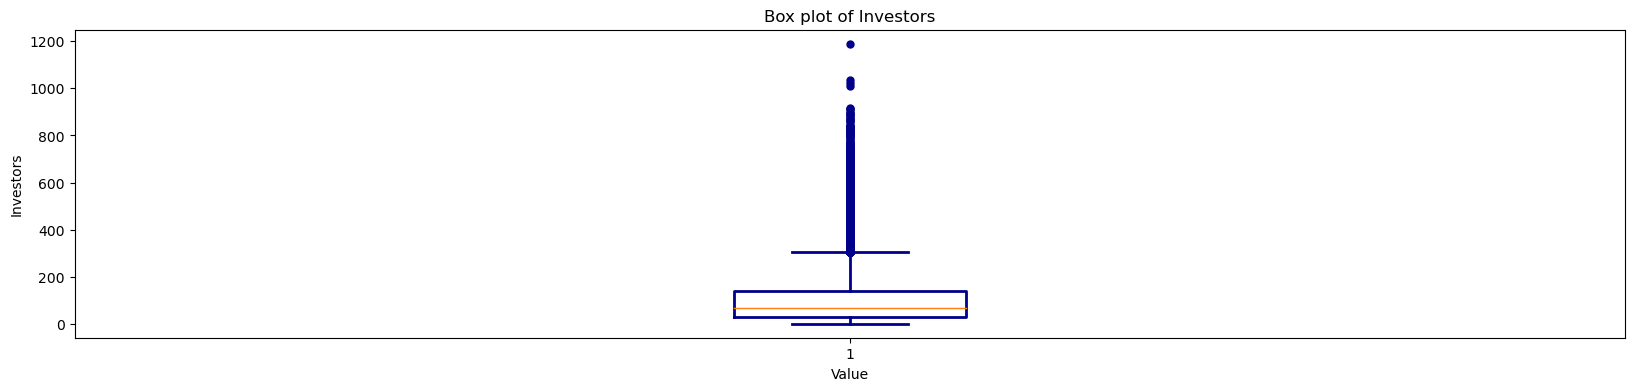

In [42]:
# create a custom design for box plots
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
whiskerprops = dict(linestyle='-', linewidth=2, color='darkblue')
capprops = dict(linestyle='-', linewidth=2, color='darkblue')
flierprops = dict(marker='o', markersize=5, markerfacecolor='darkblue', markeredgecolor='darkblue')

# create a box plot for each numeric column
for column in num_cols:
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.boxplot(num_cols[column], boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)
    ax.set_title(f'Box plot of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel(column)
    plt.show()

In [43]:
# Removing Outliers in above columns
def remove_outlier (col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return col[(col >= lower_range ) & (col <= upper_range)]

In [44]:
# Removing outliers and creating new dataframe named num_cols2
num_cols = num_cols.apply(remove_outlier)

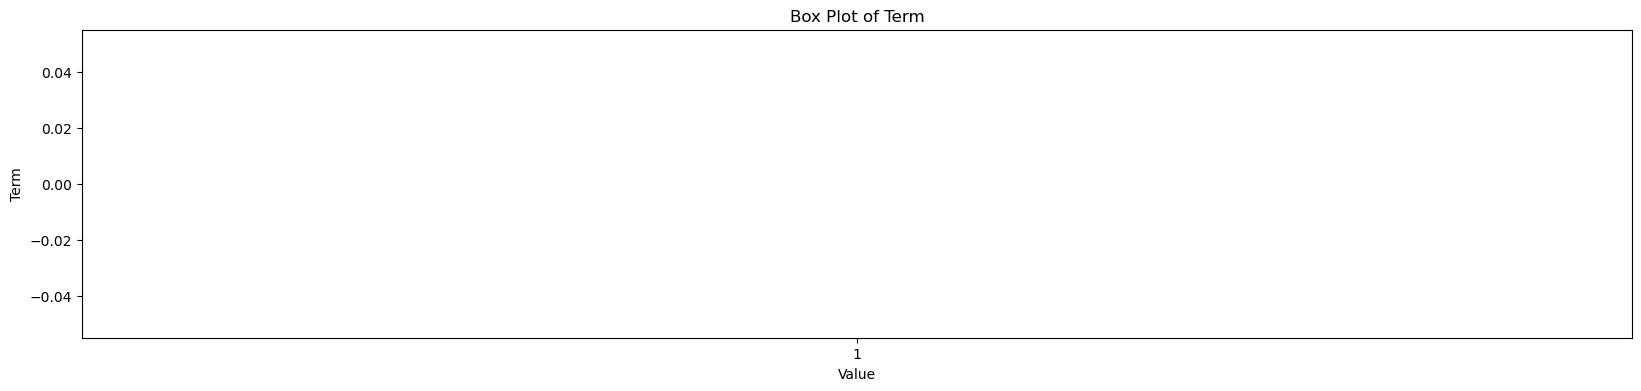

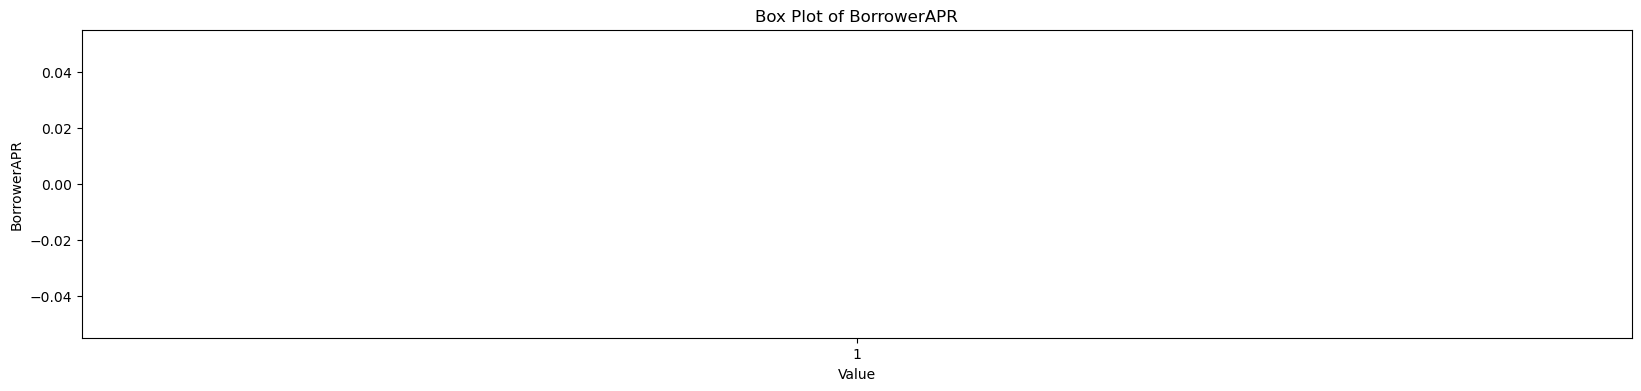

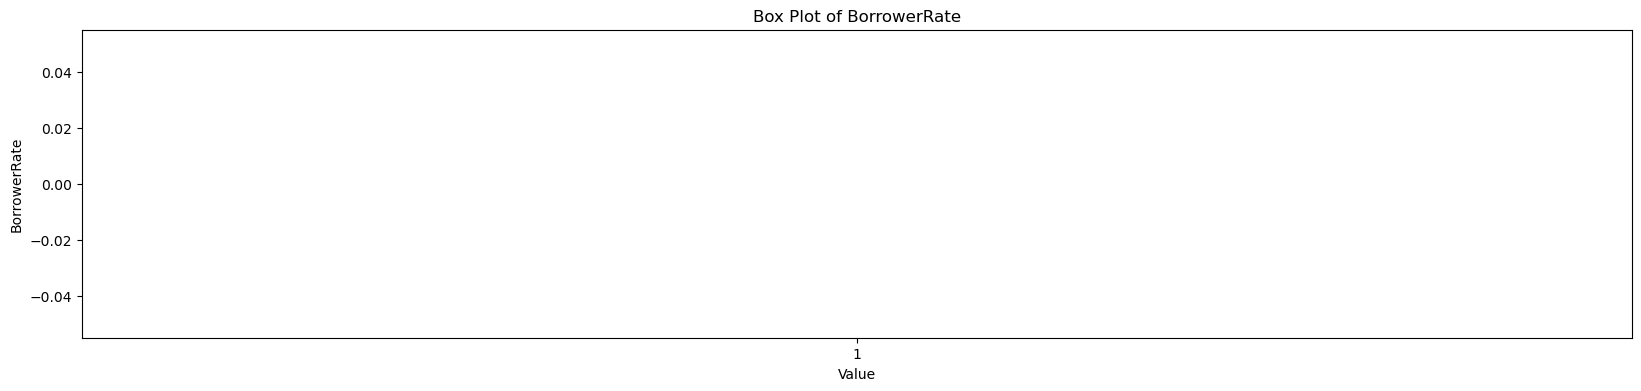

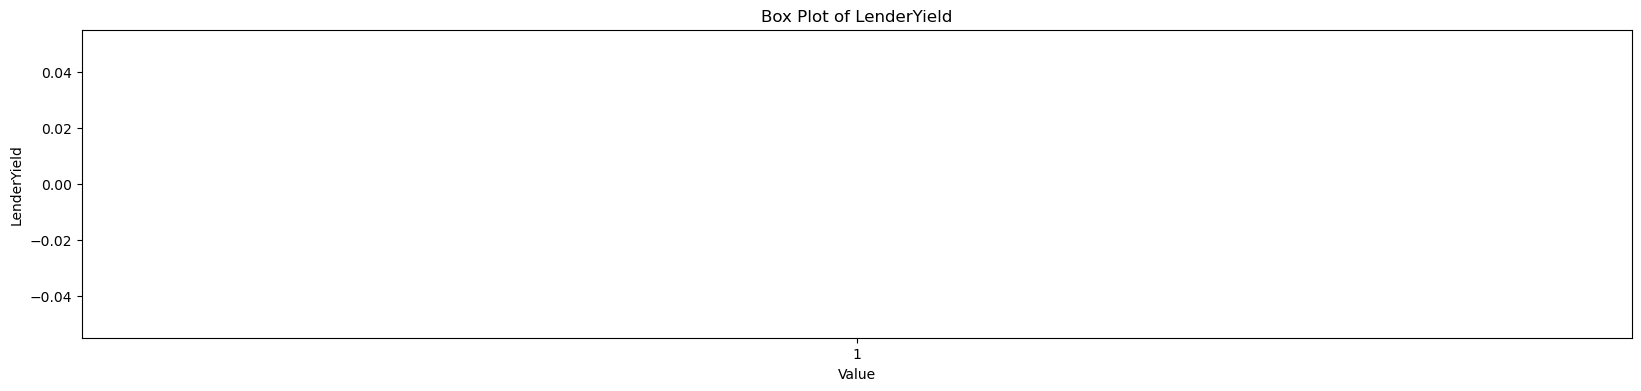

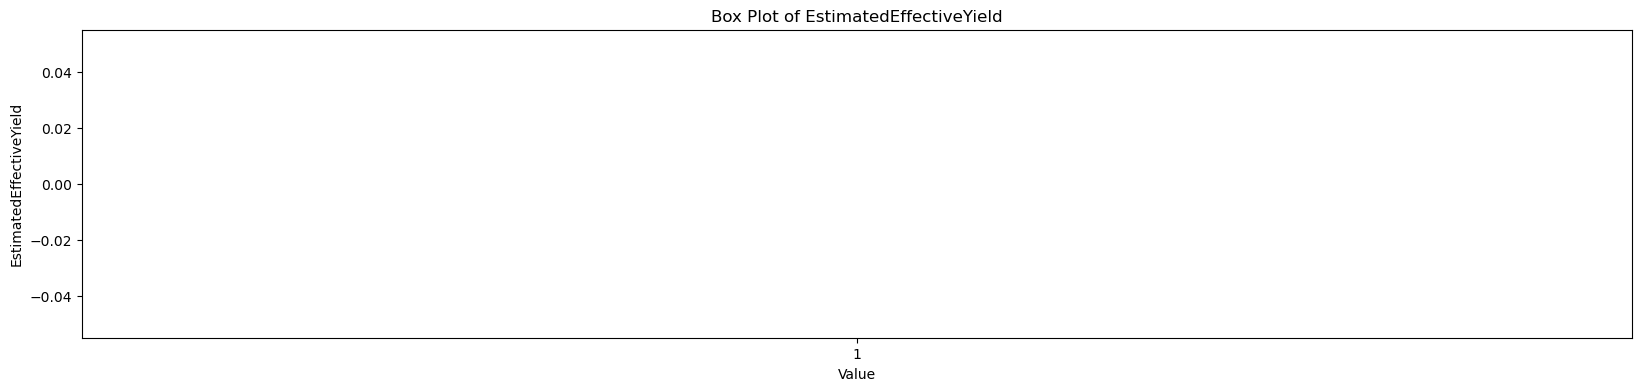

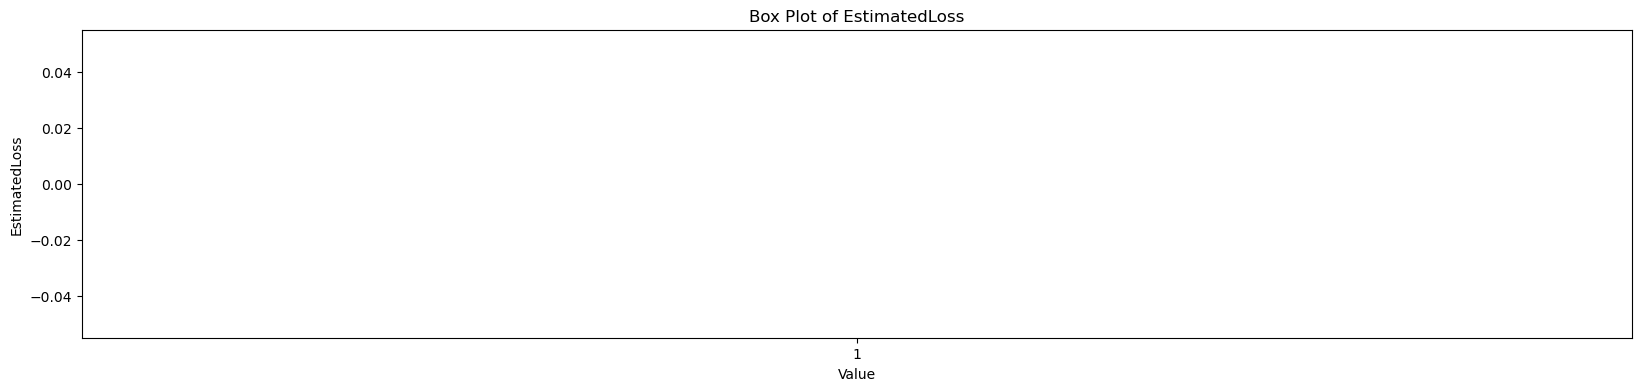

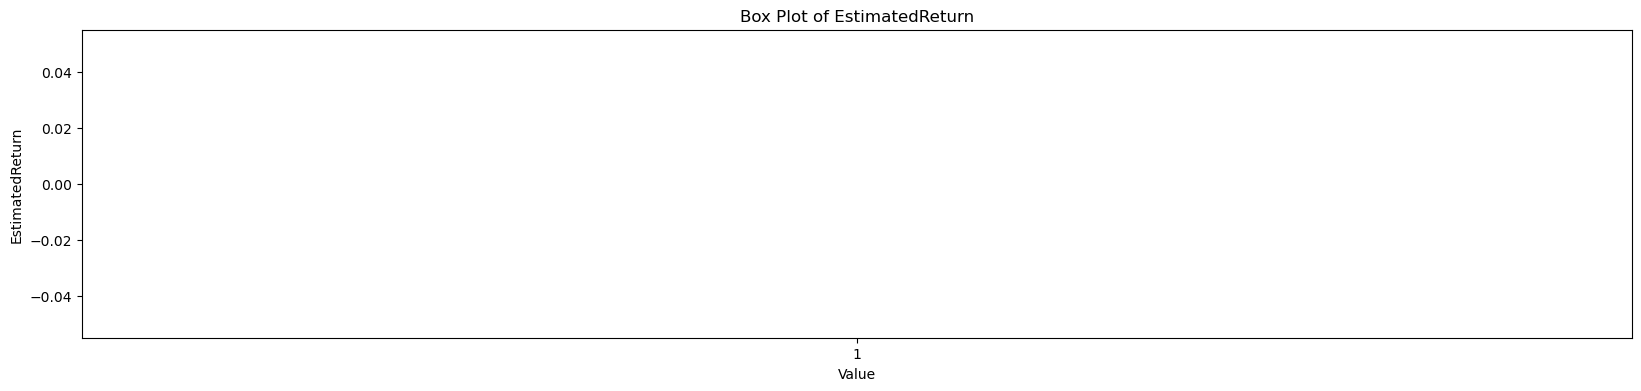

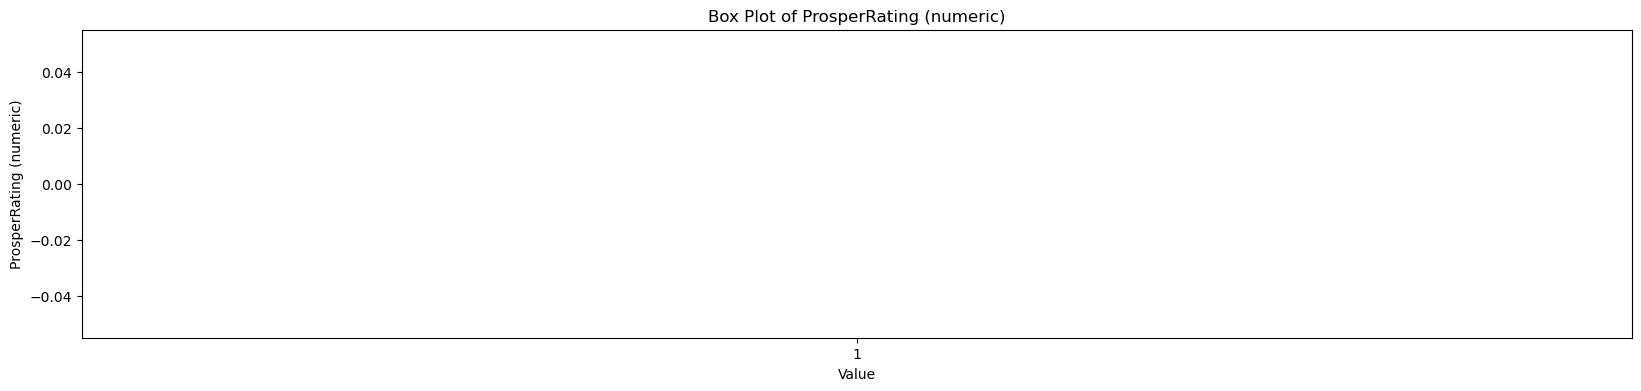

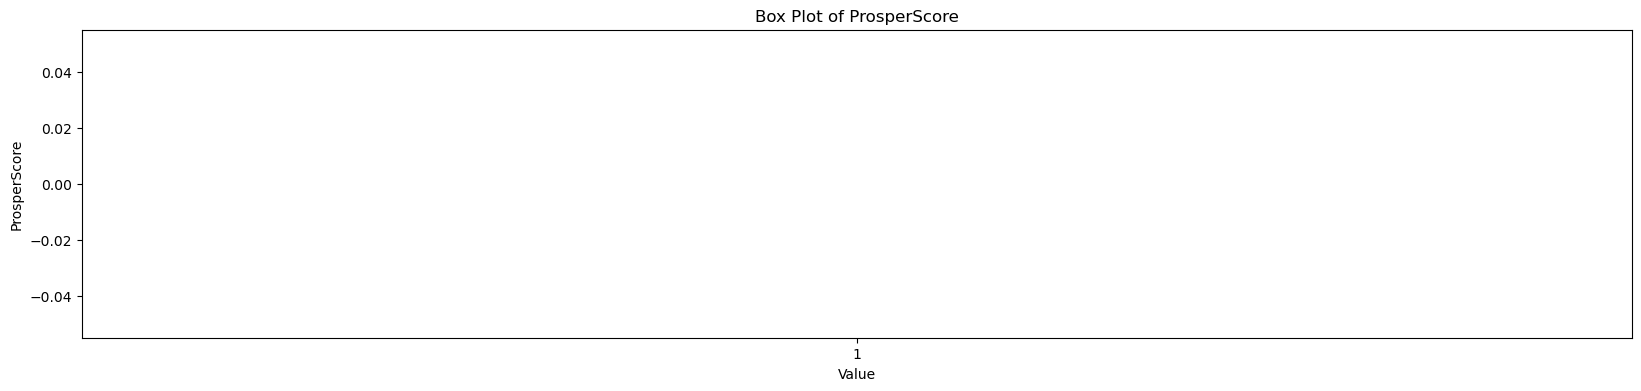

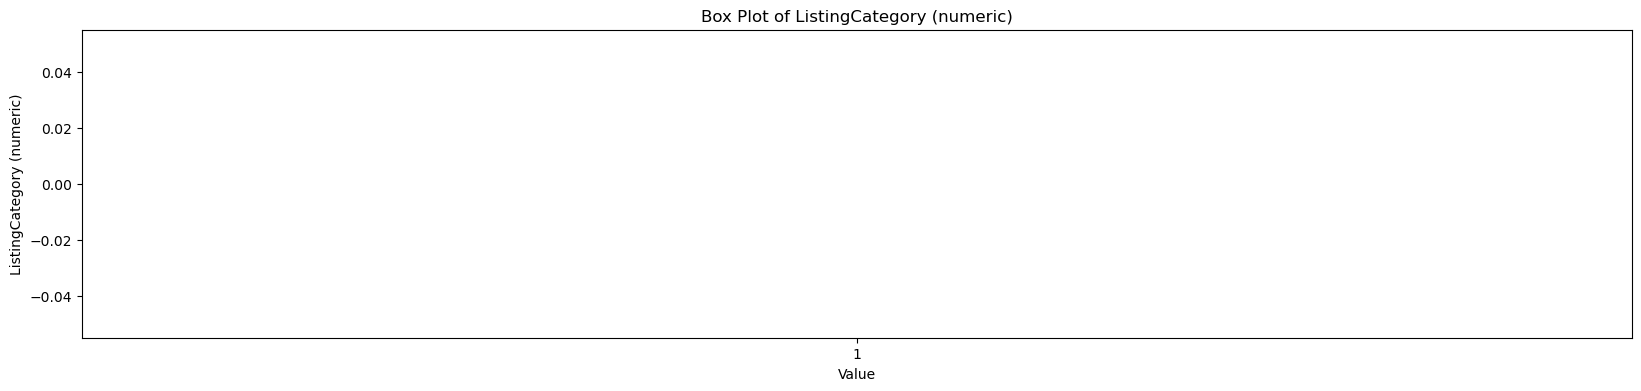

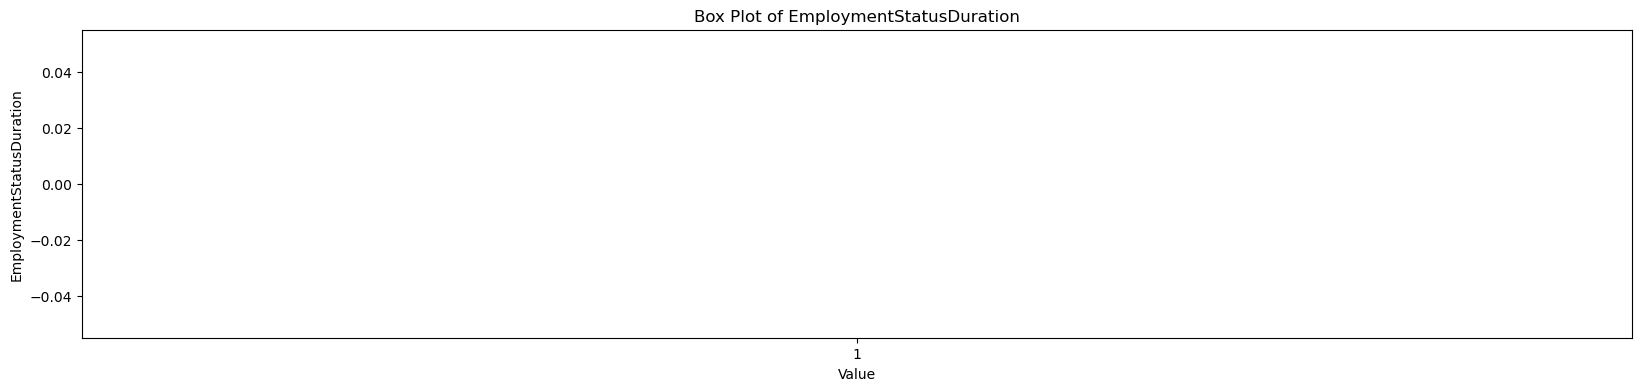

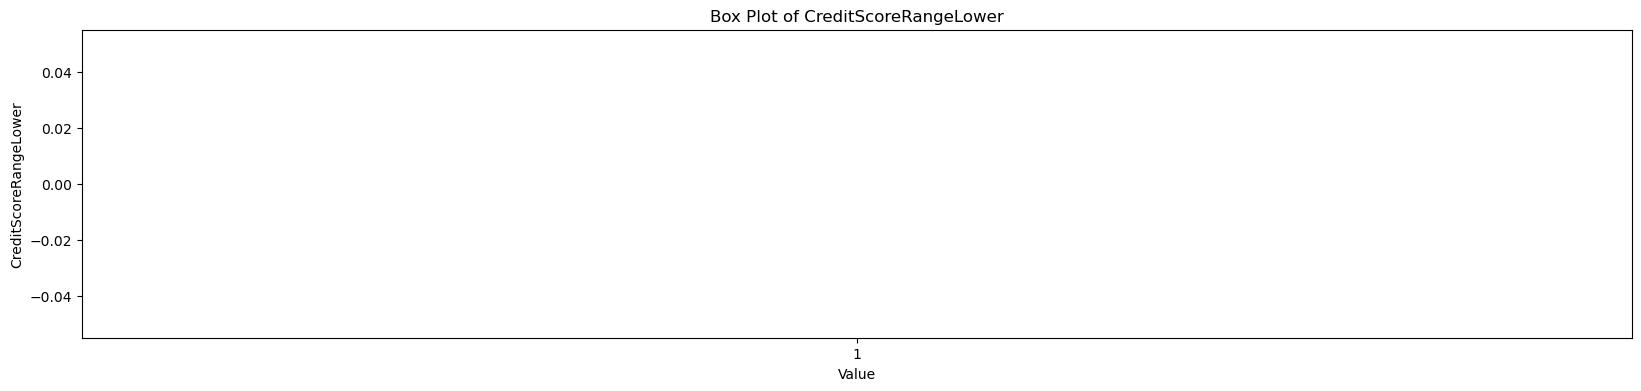

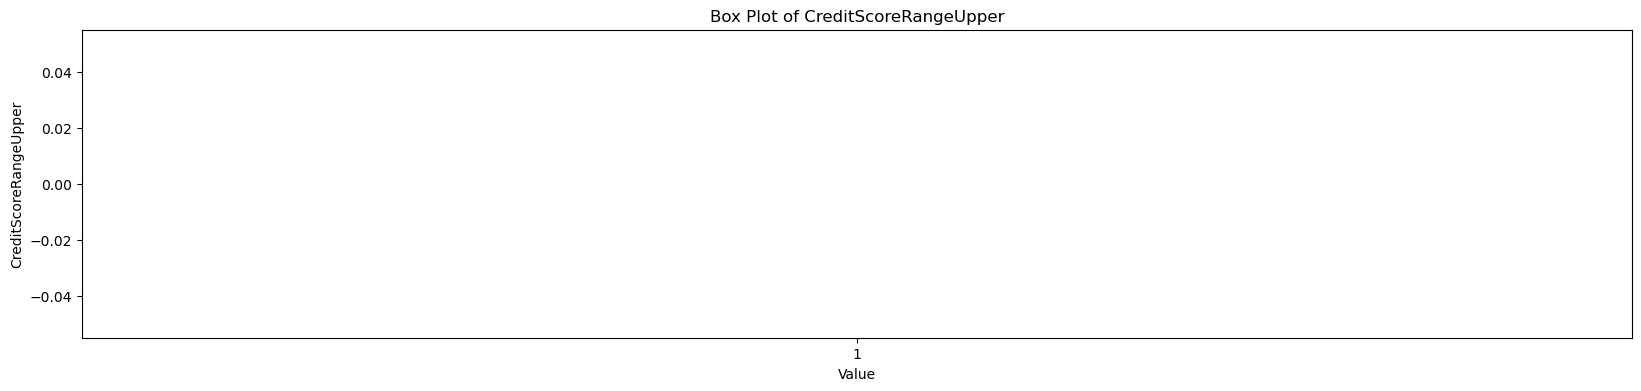

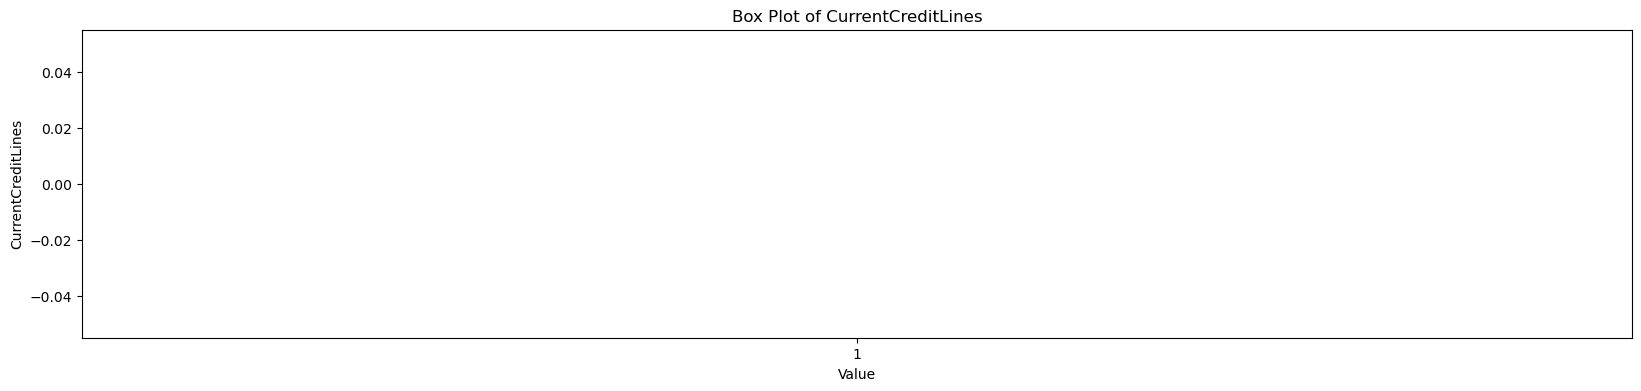

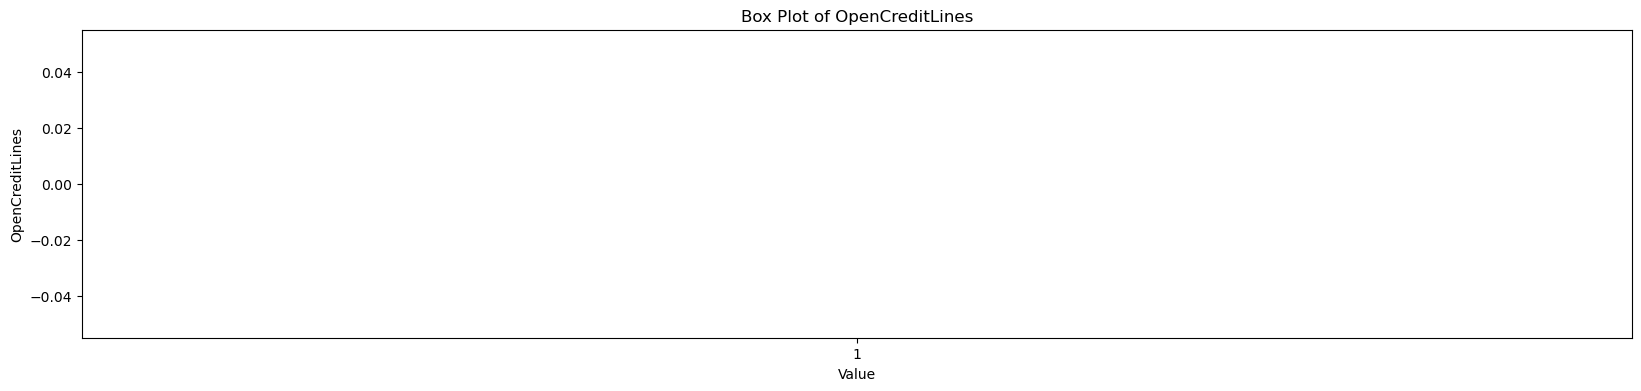

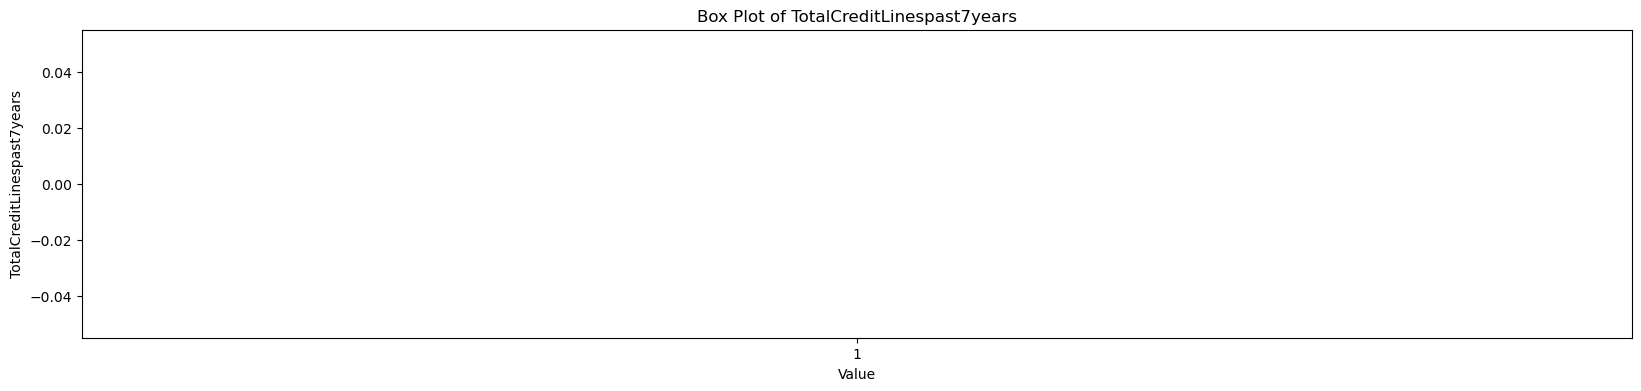

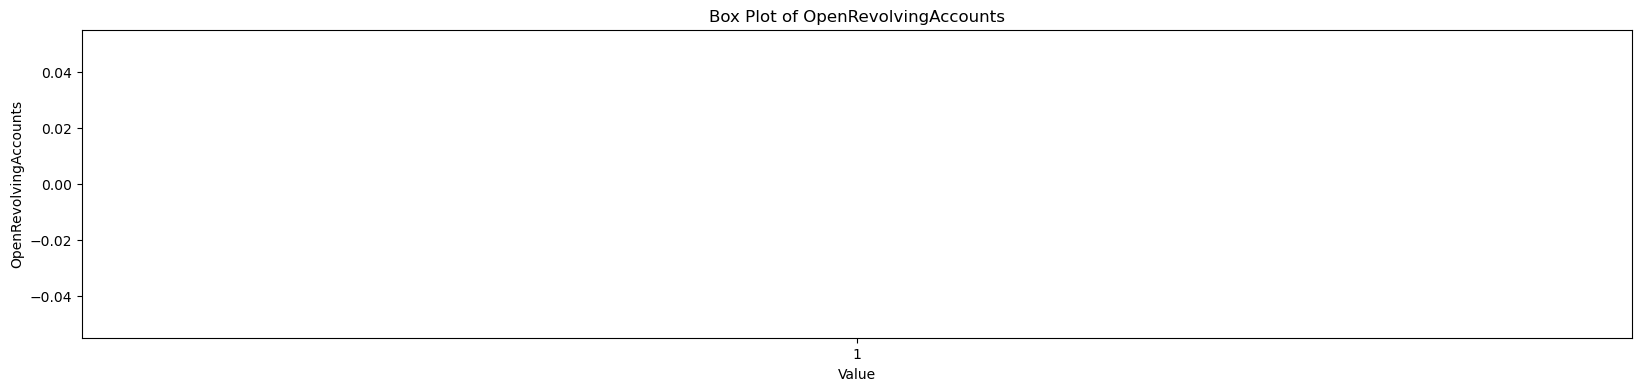

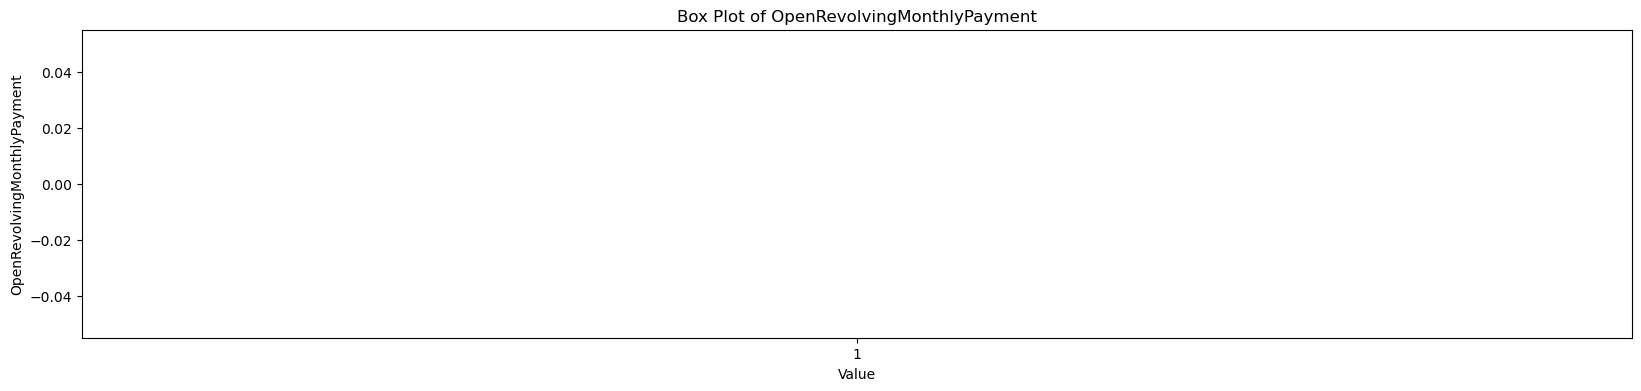

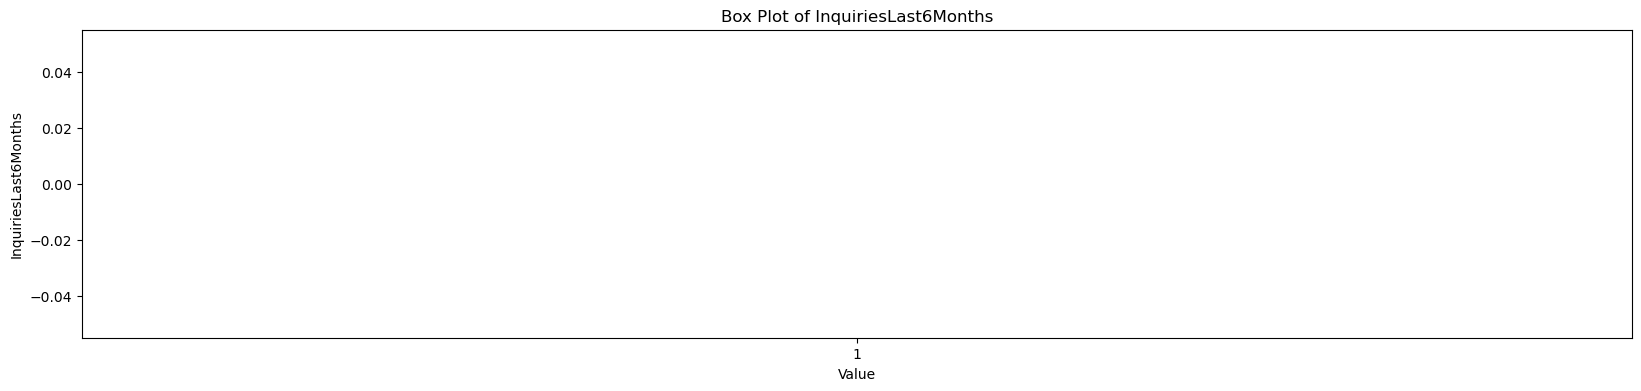

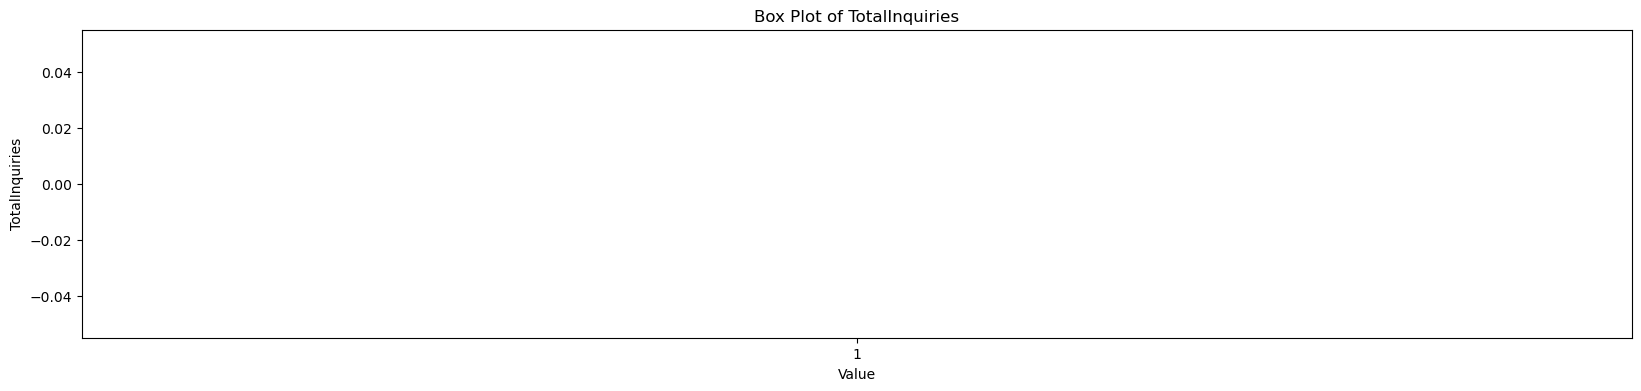

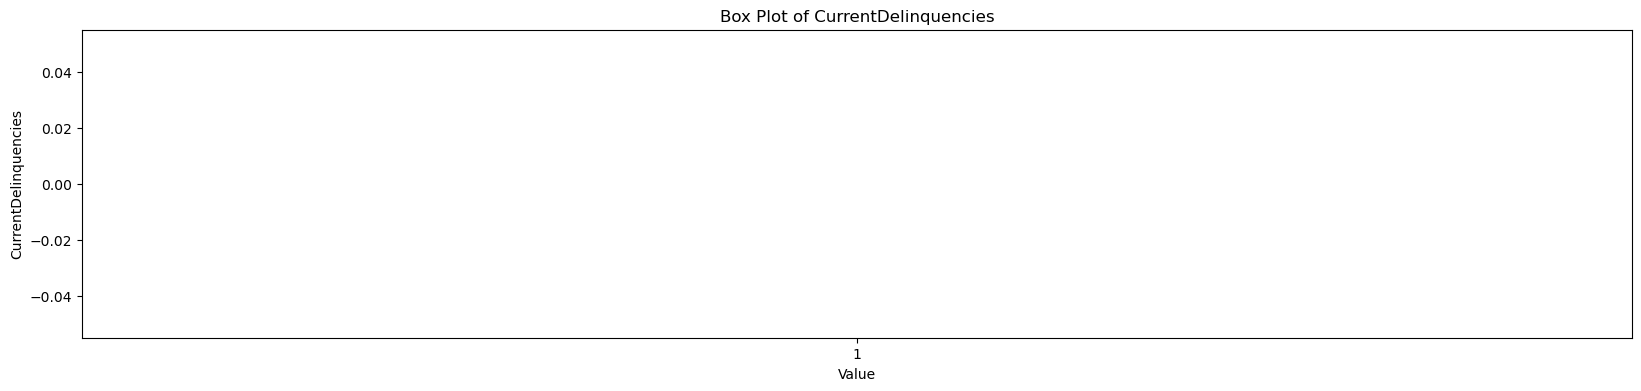

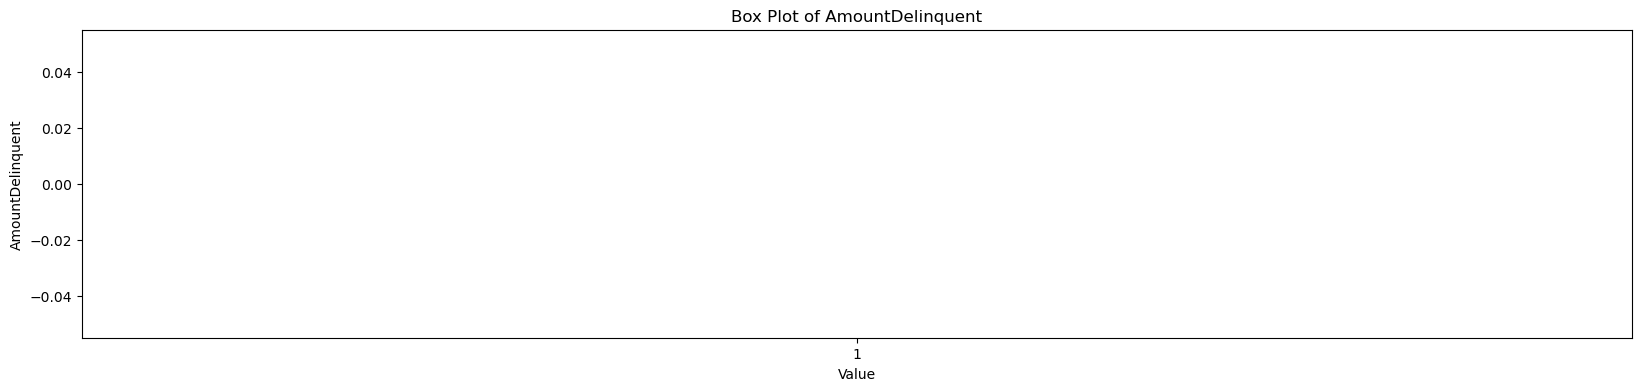

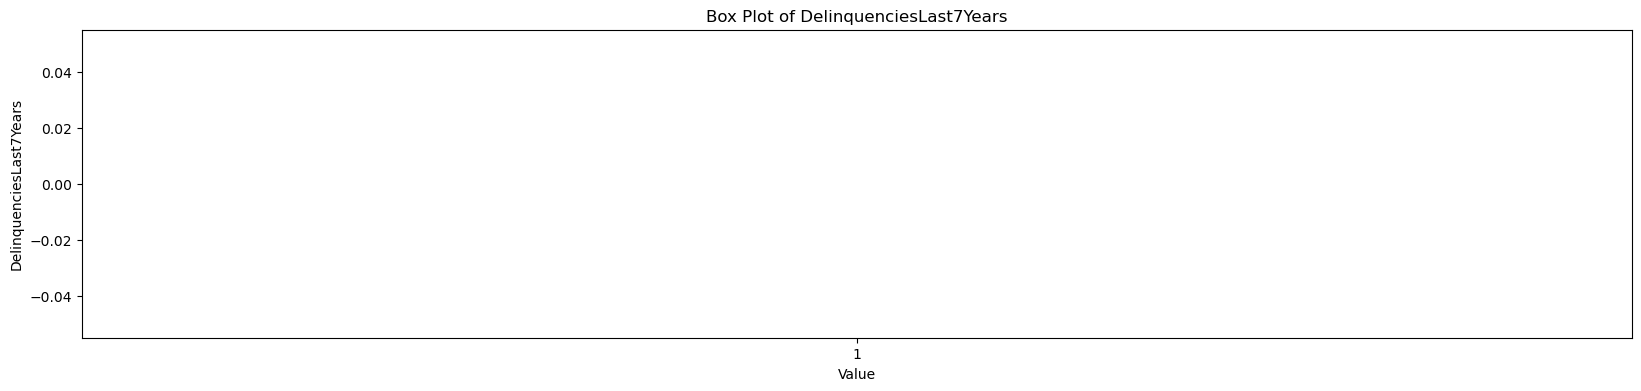

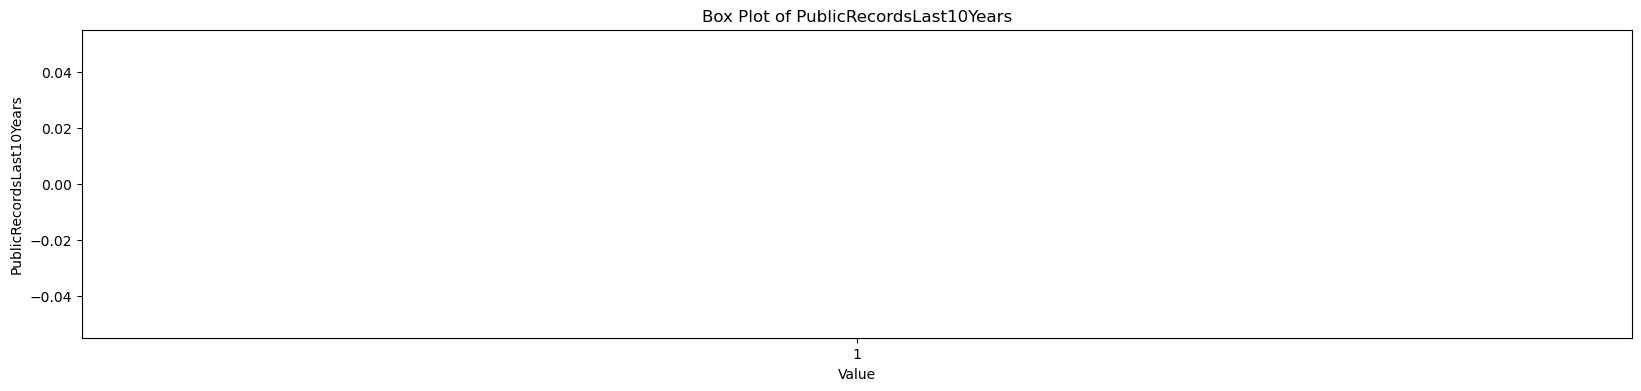

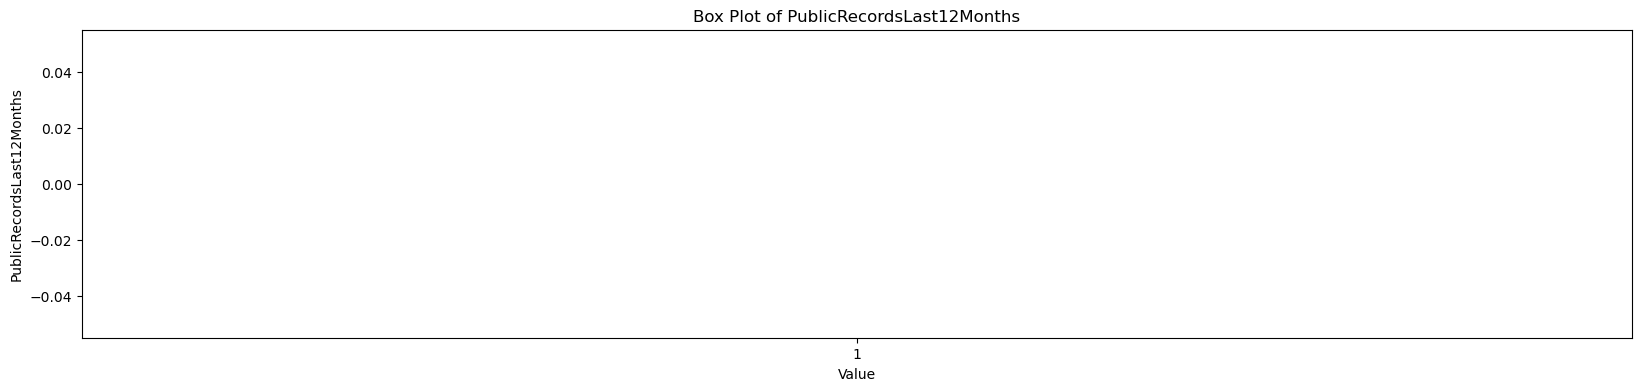

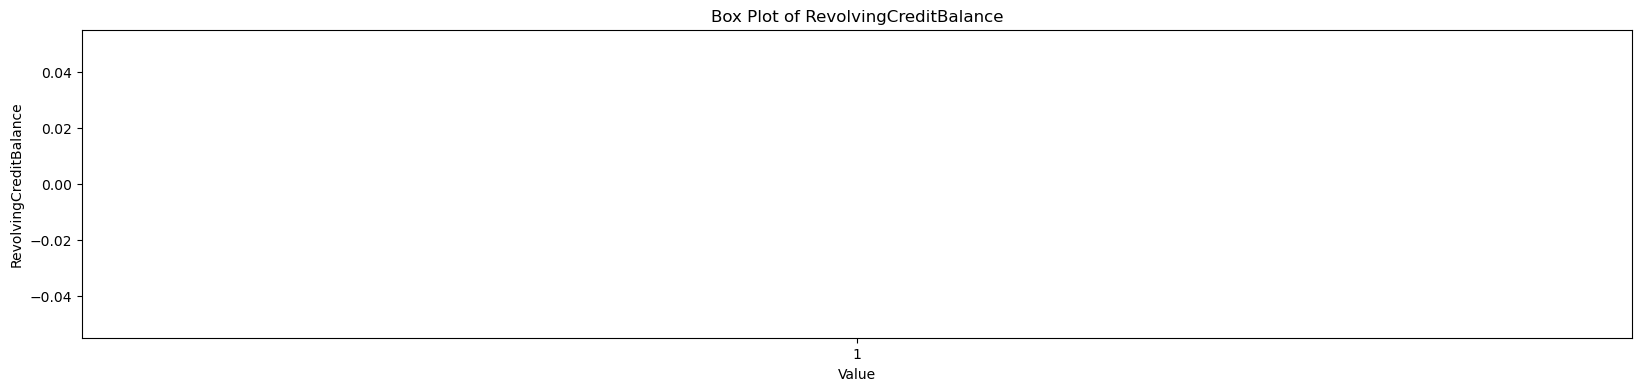

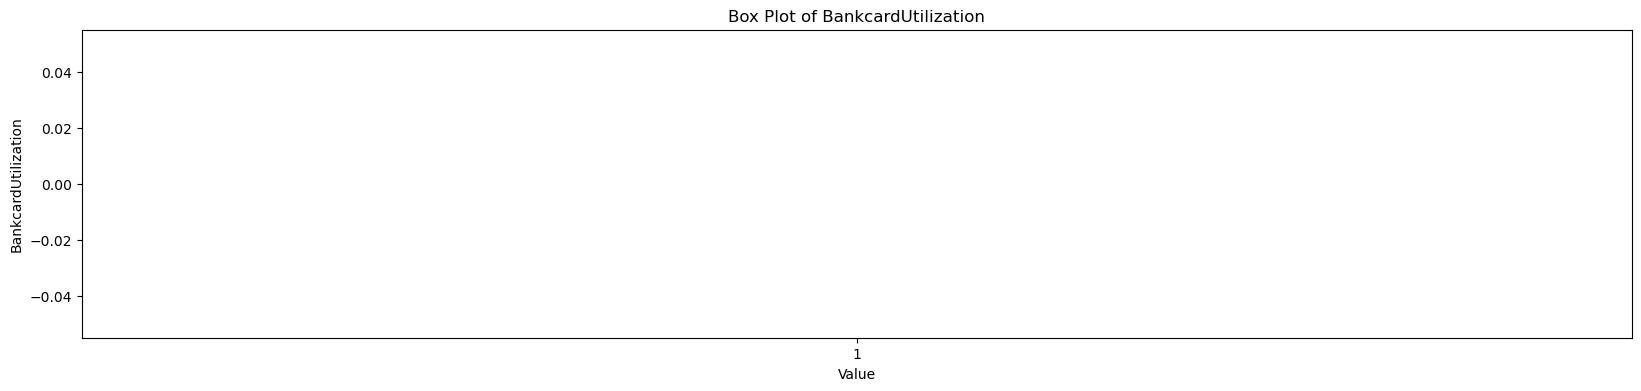

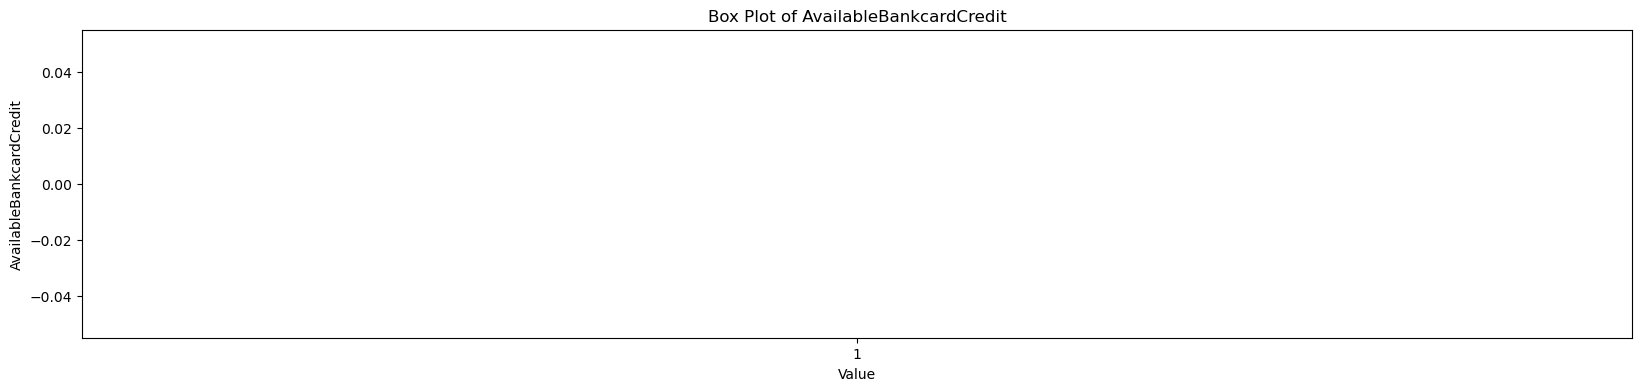

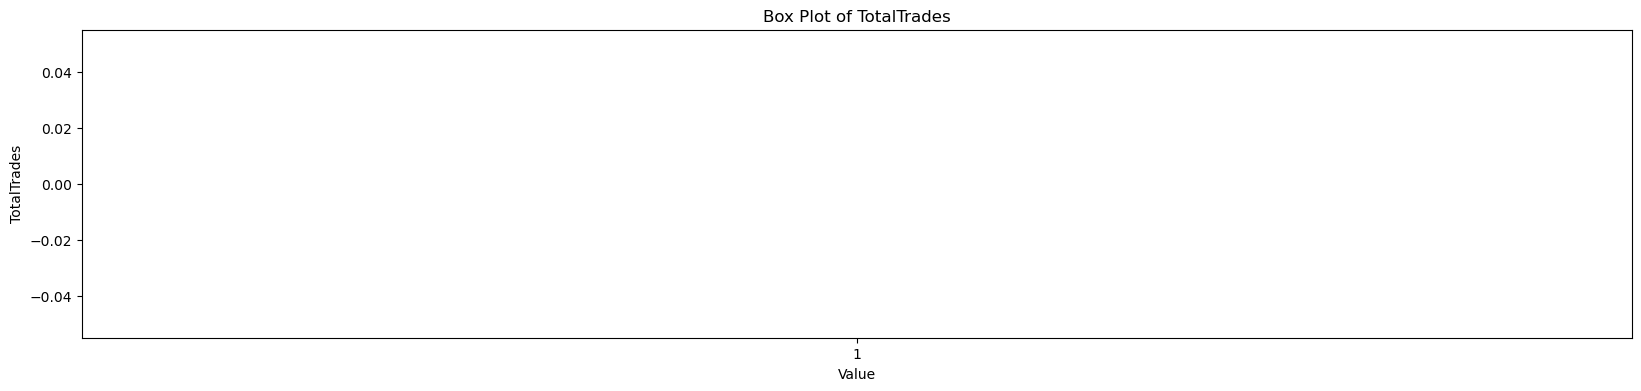

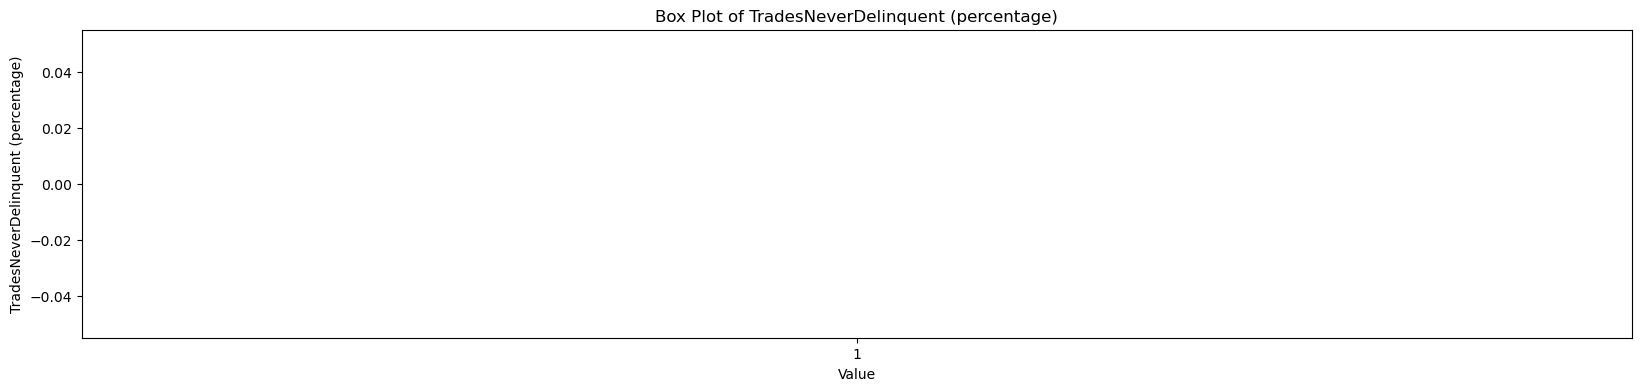

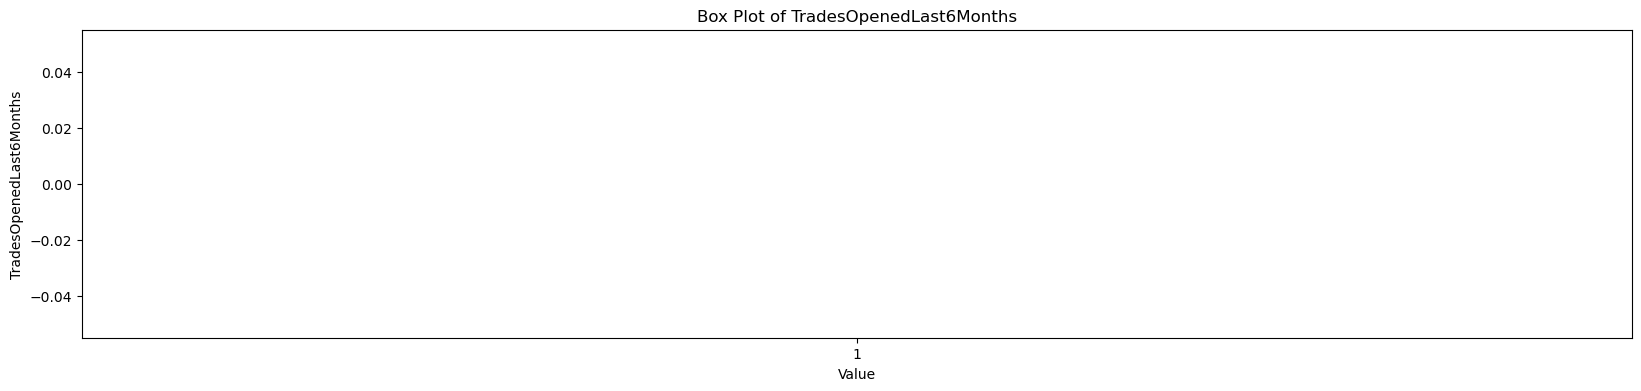

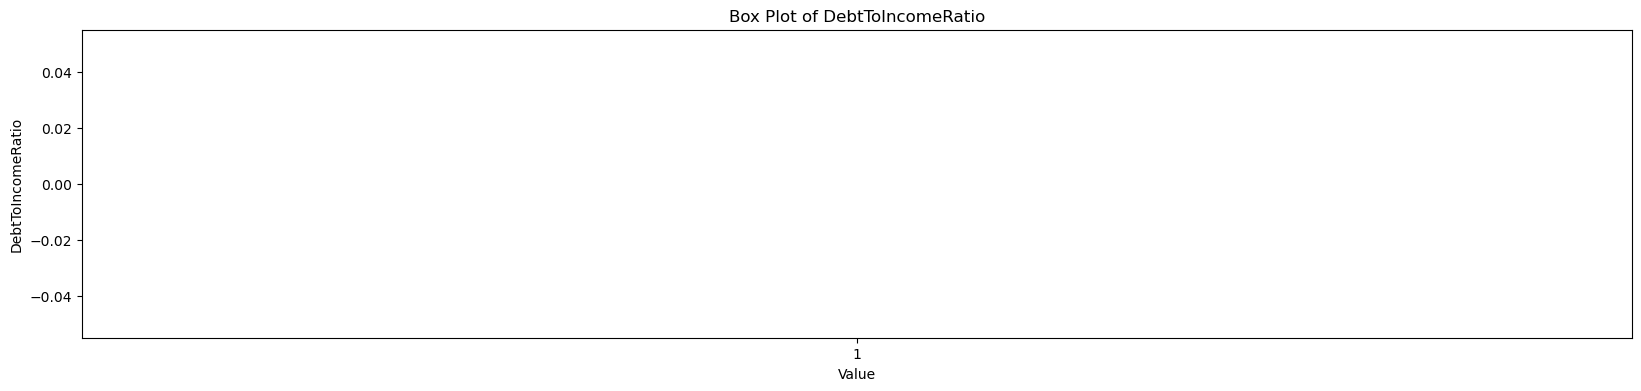

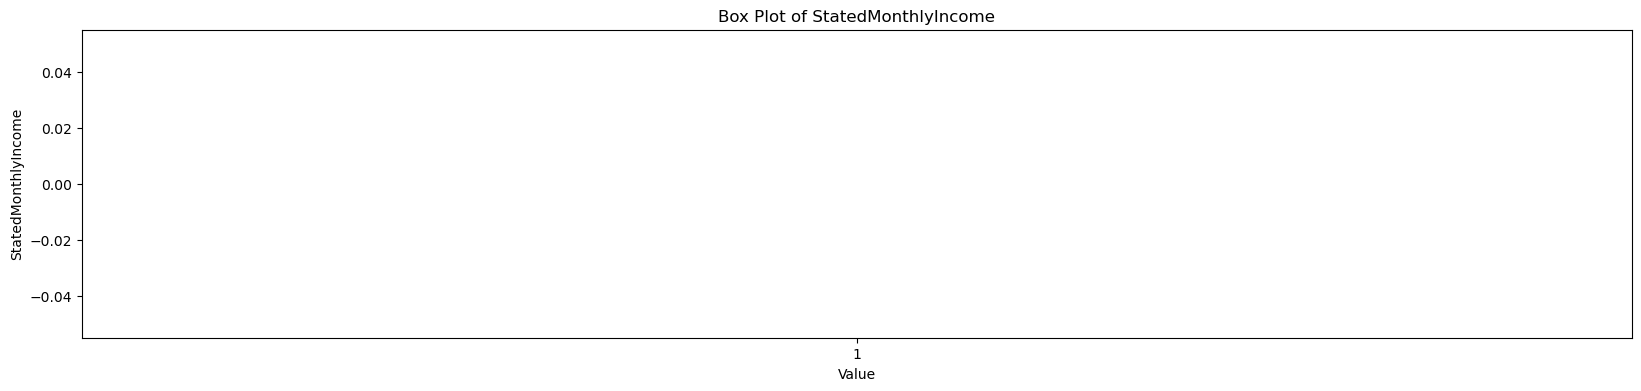

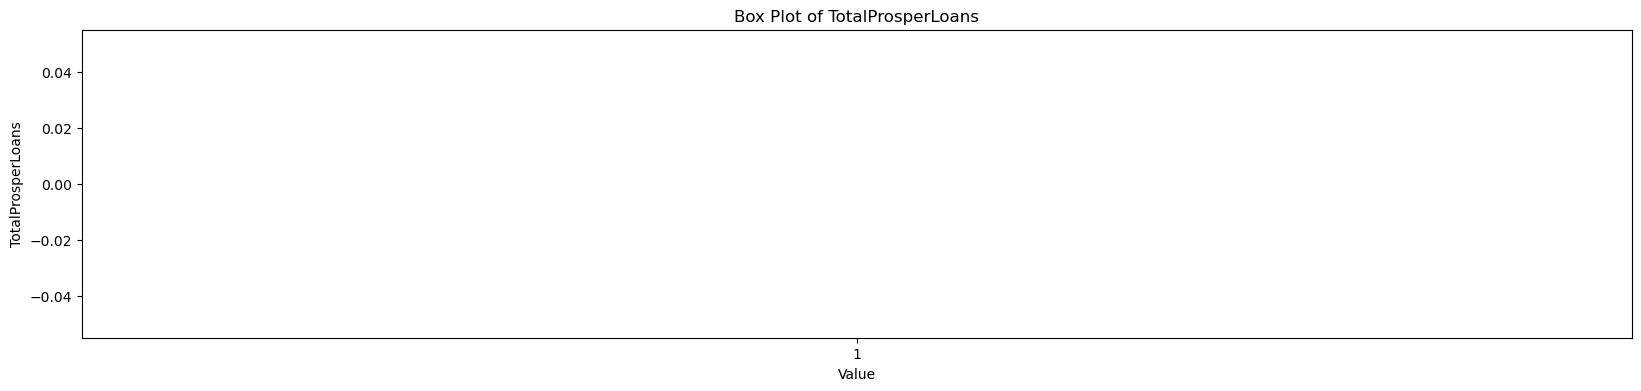

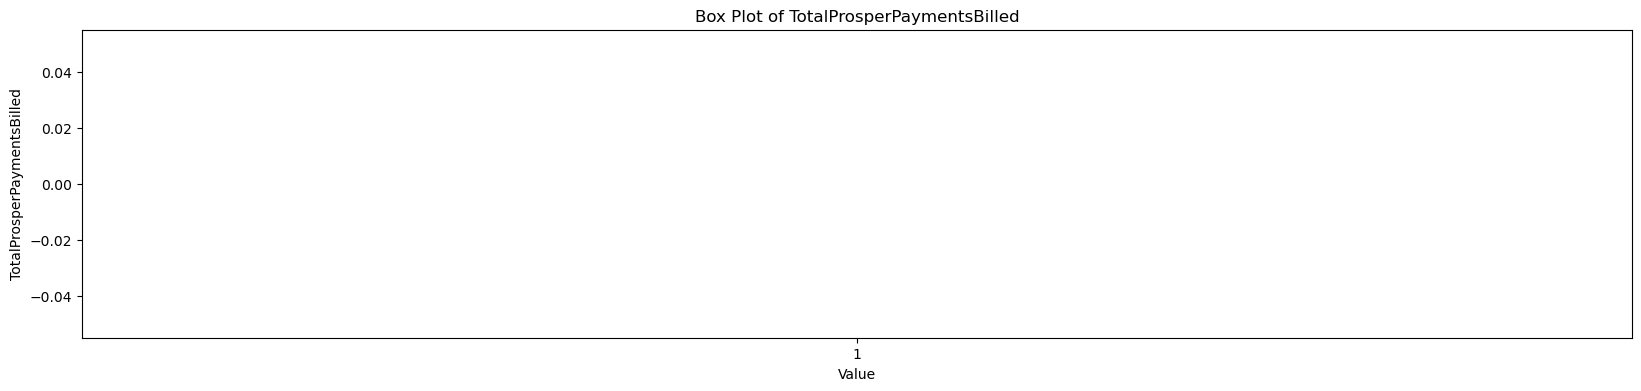

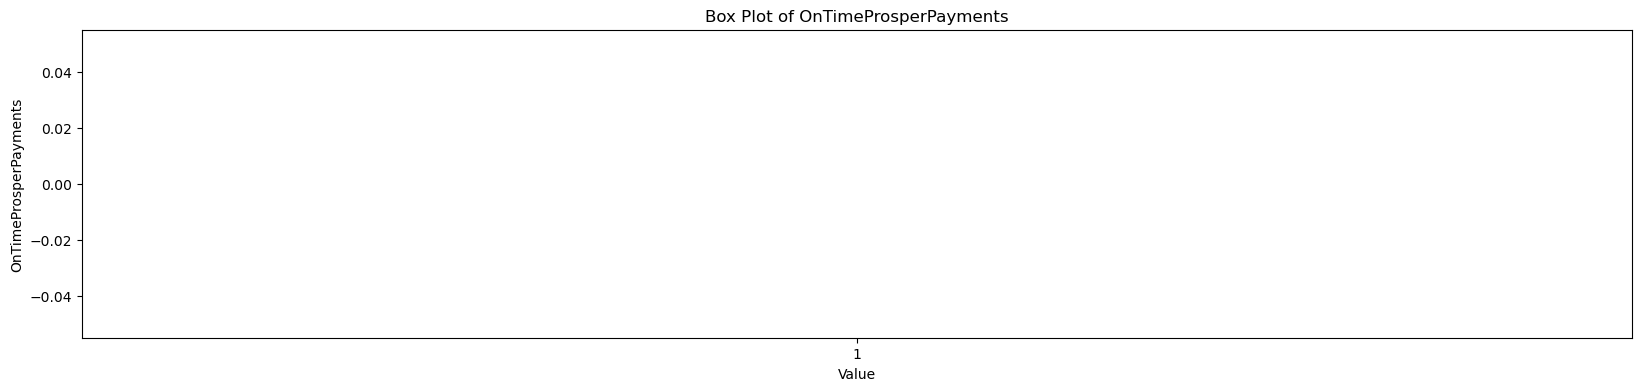

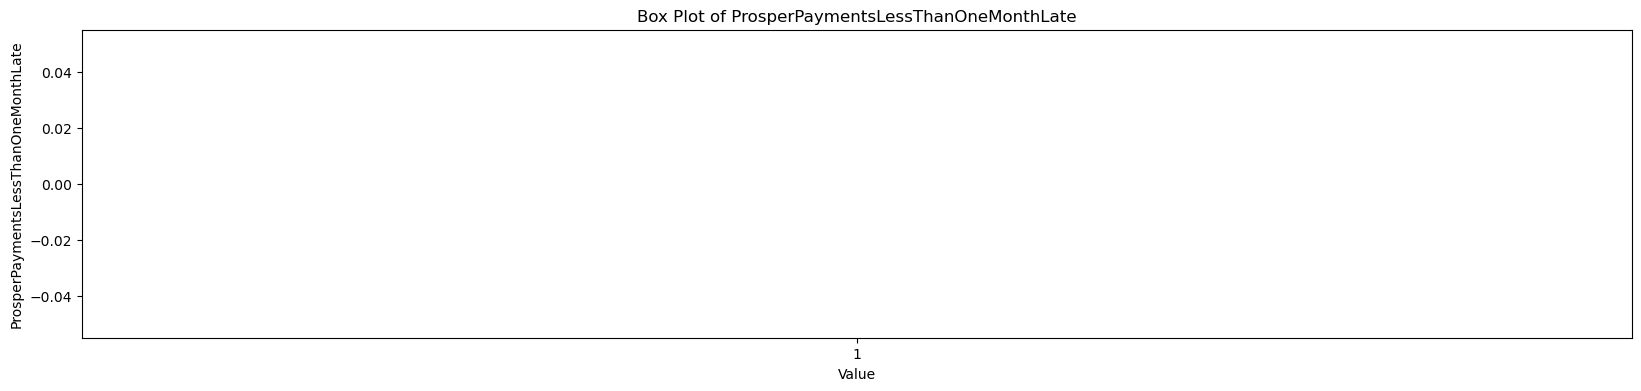

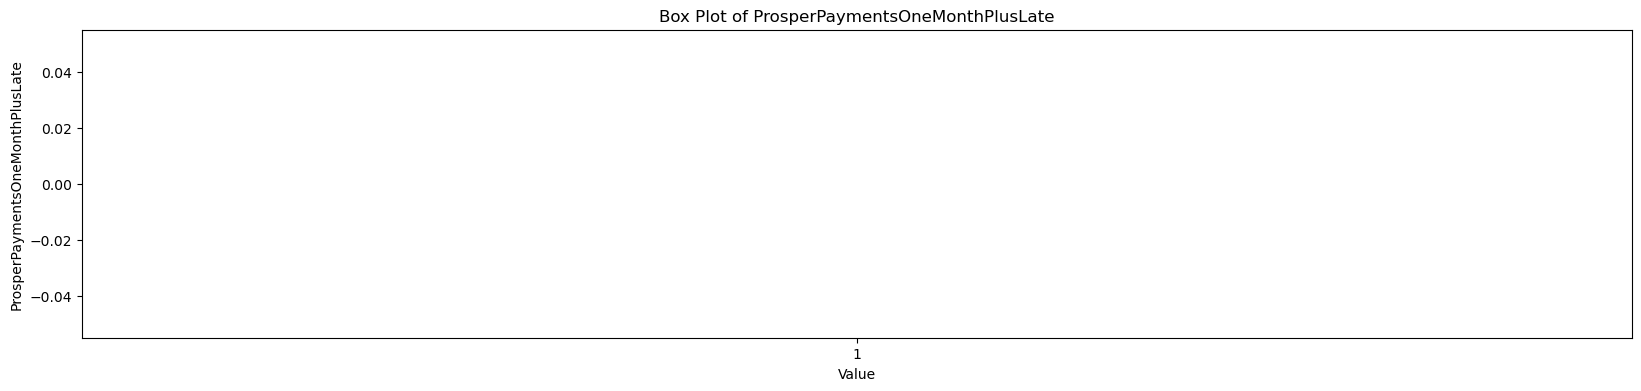

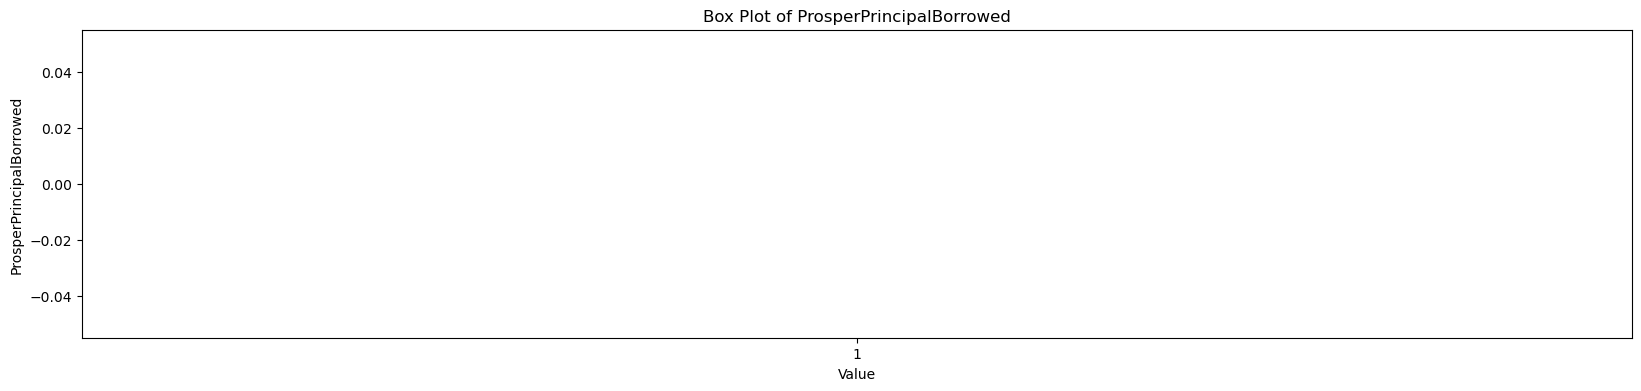

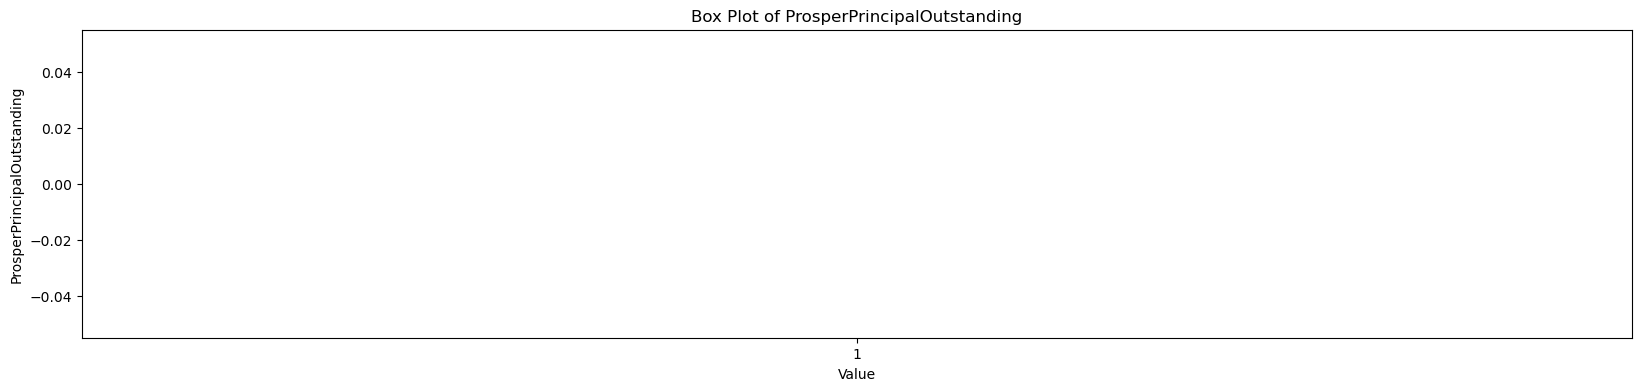

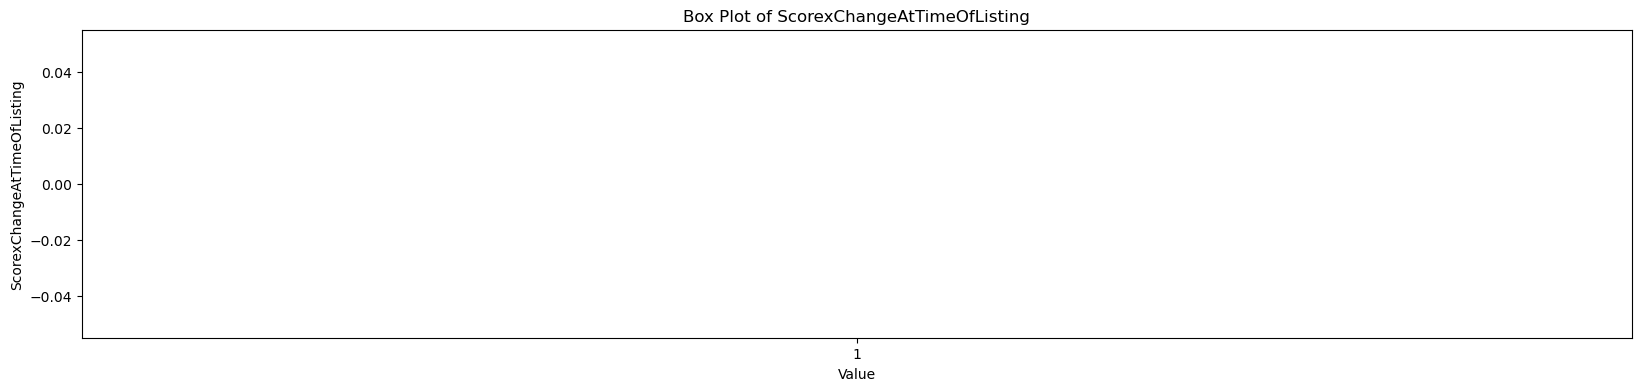

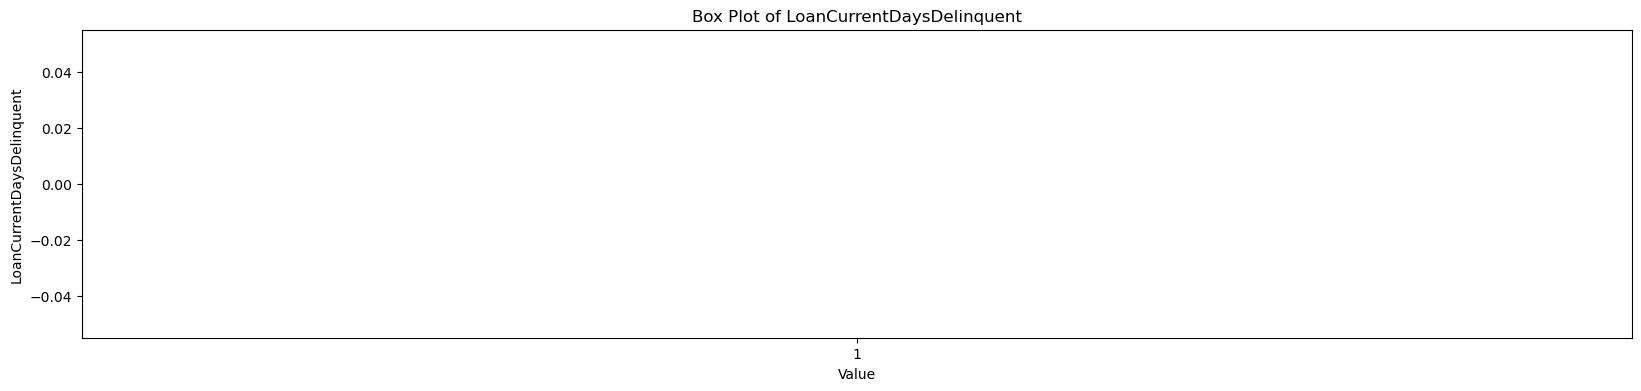

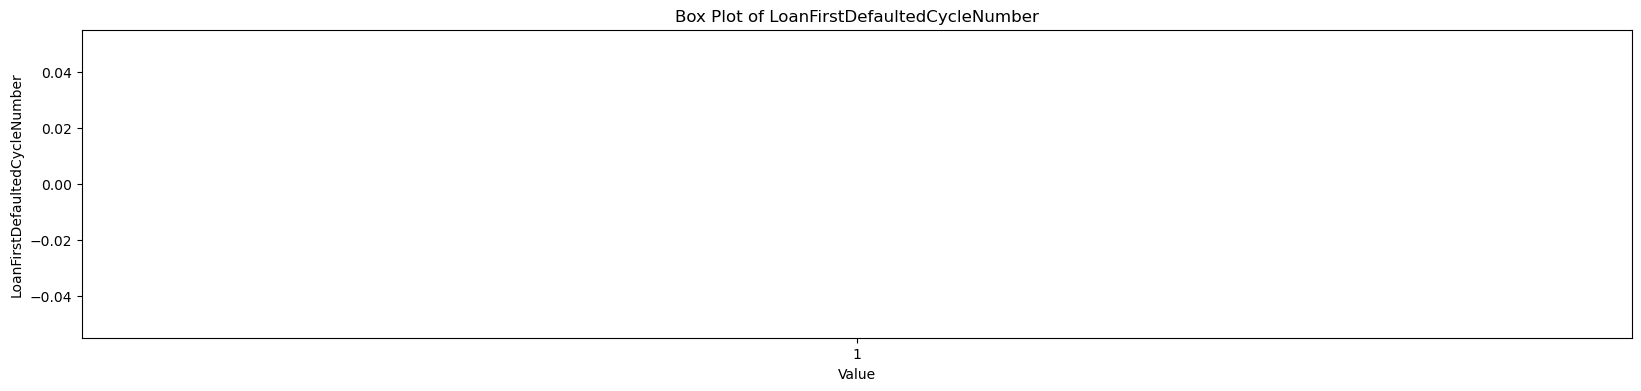

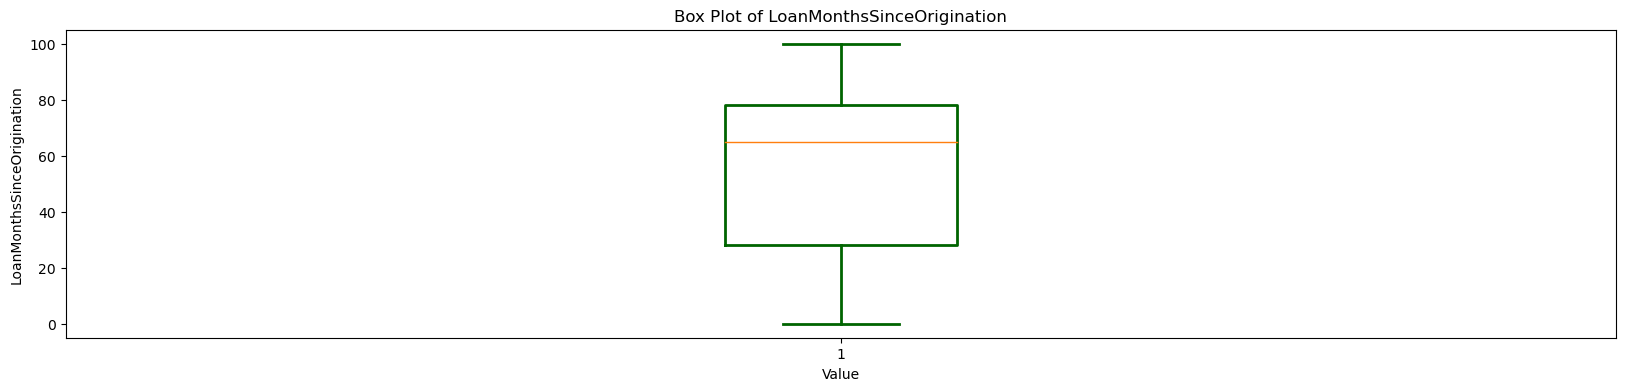

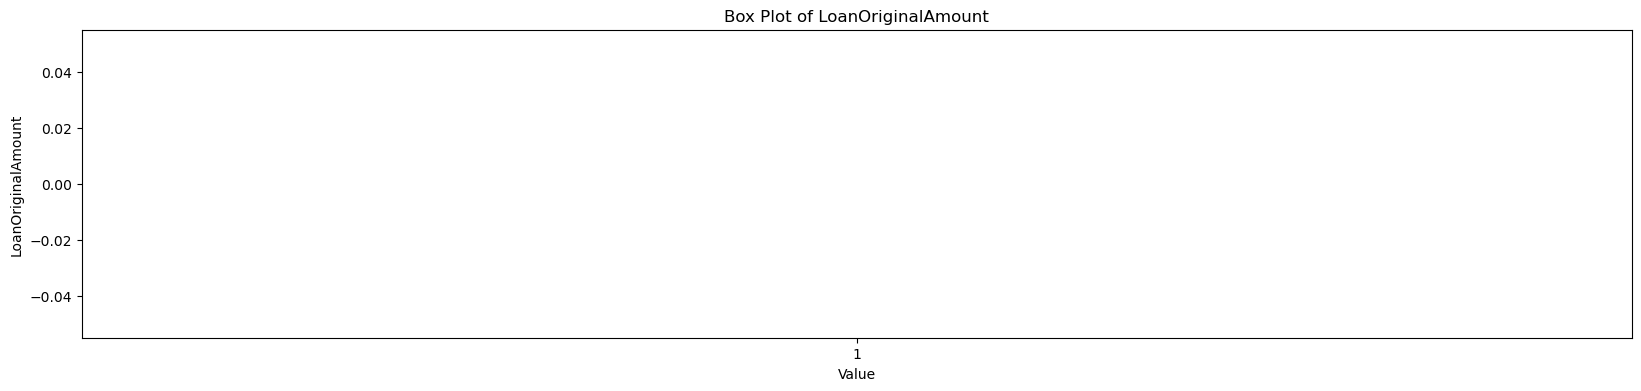

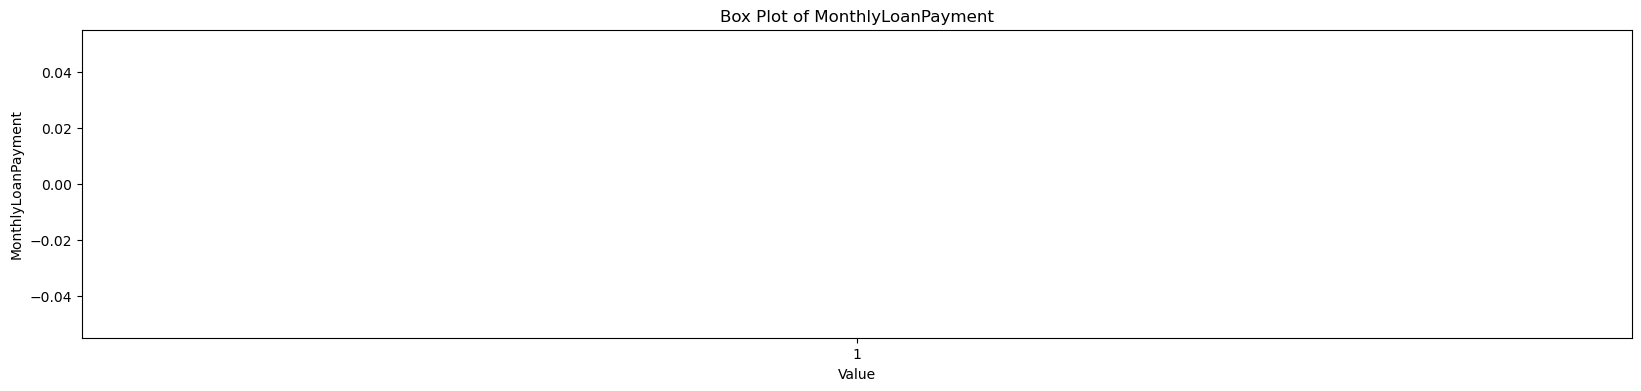

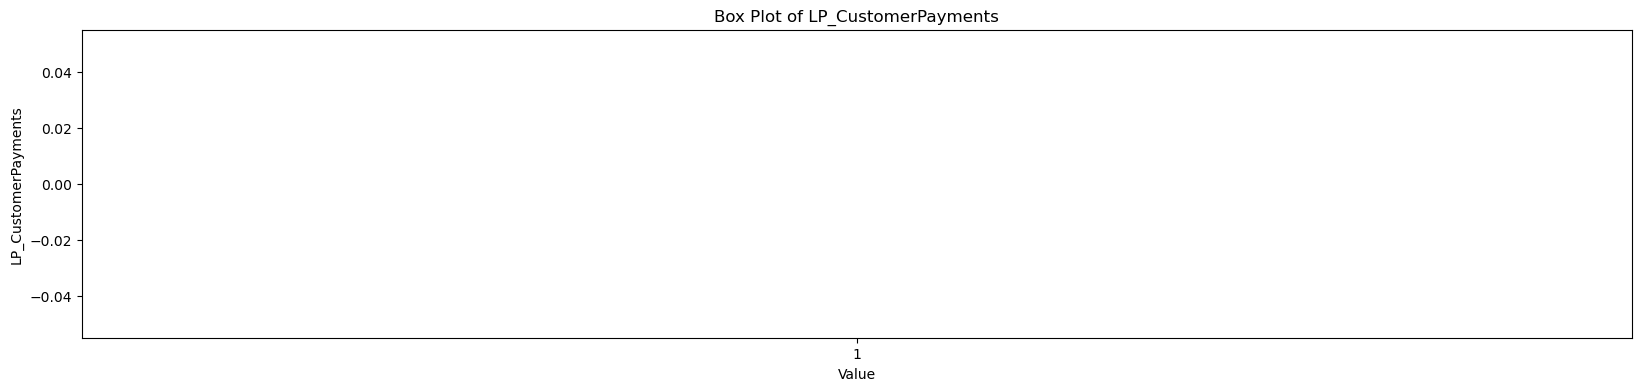

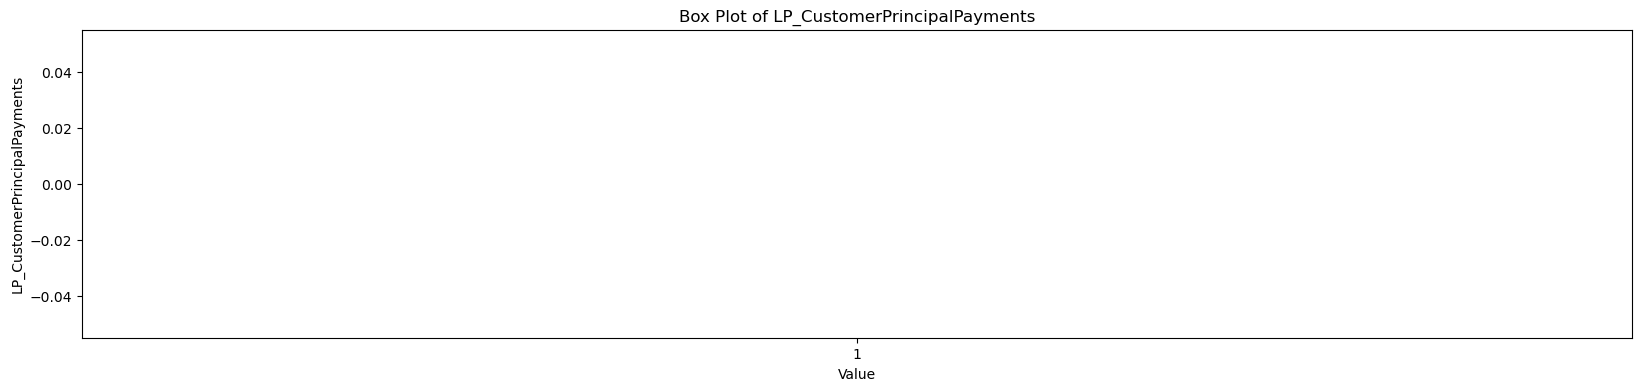

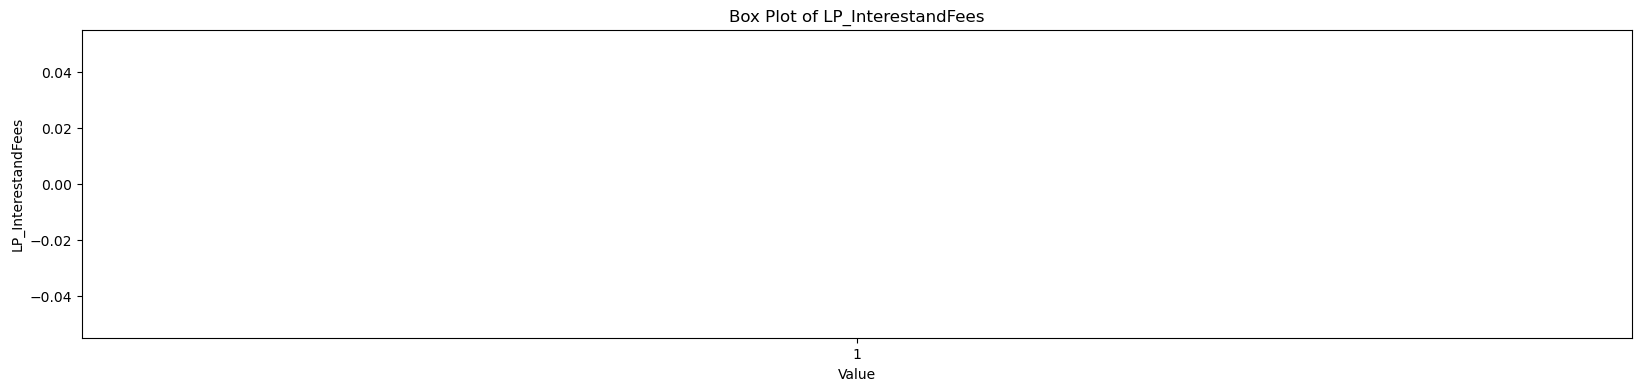

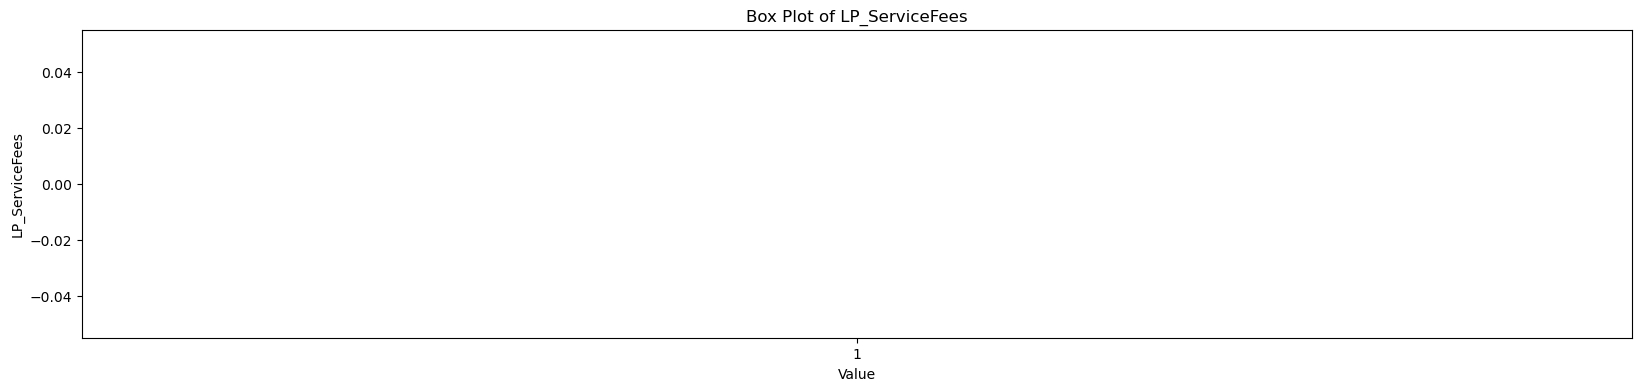

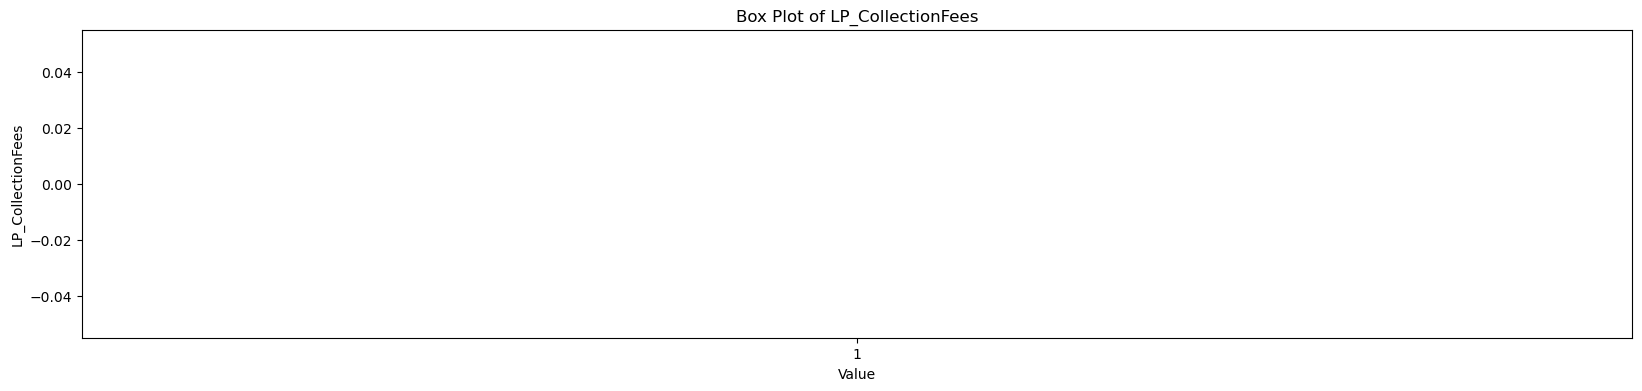

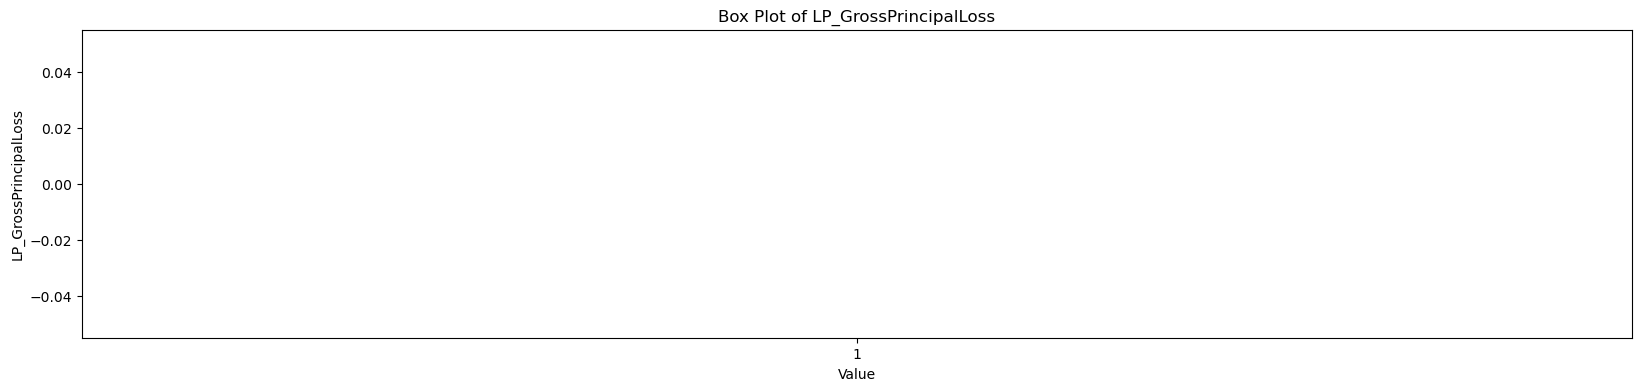

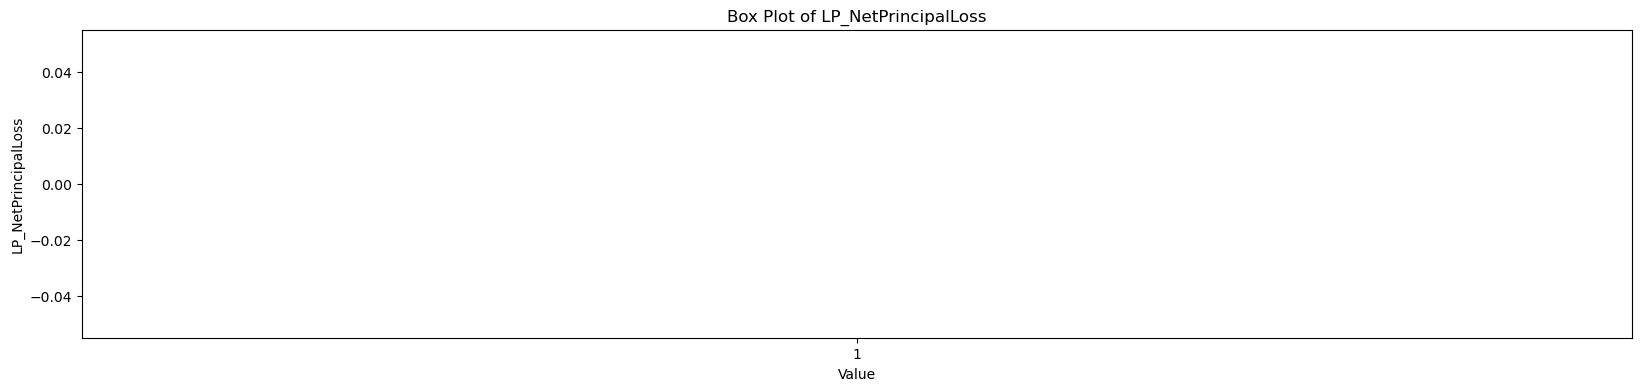

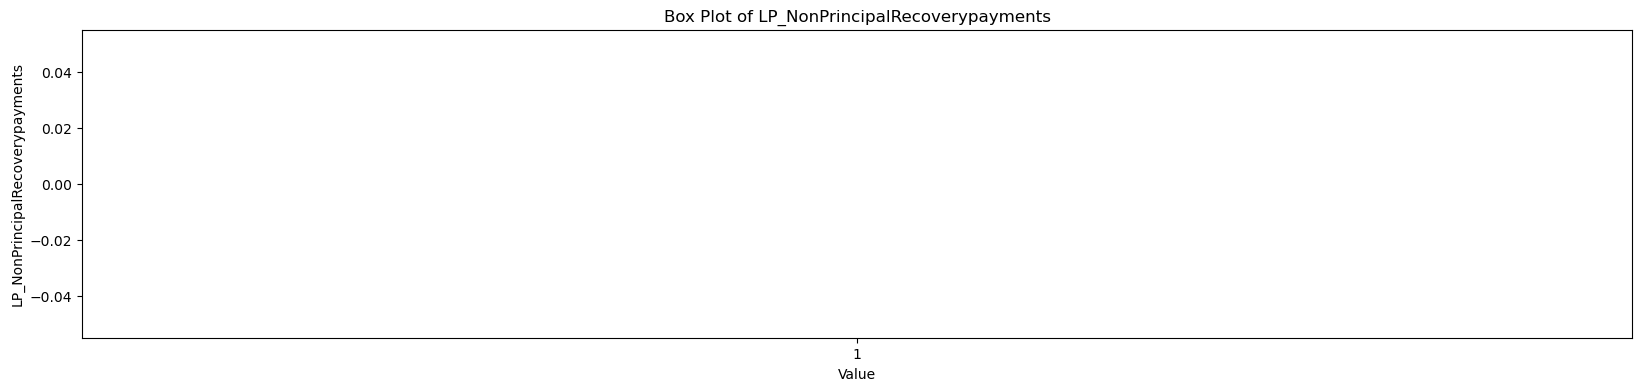

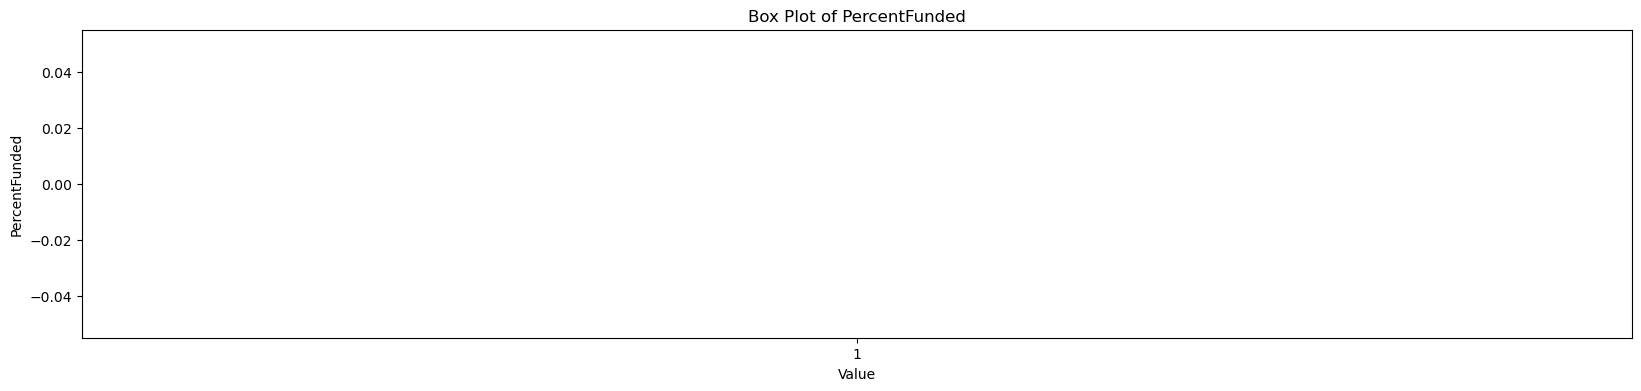

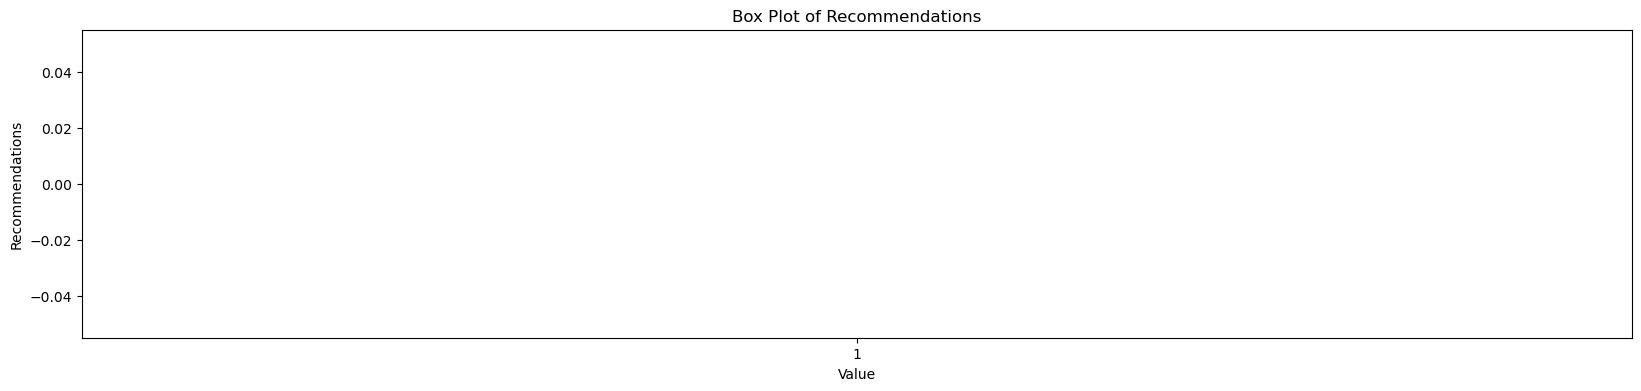

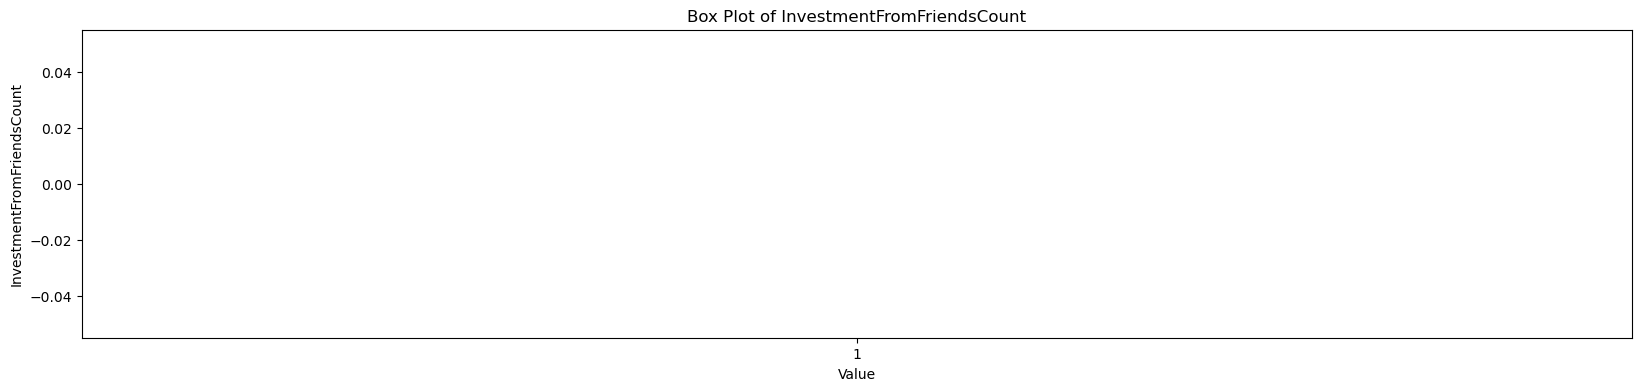

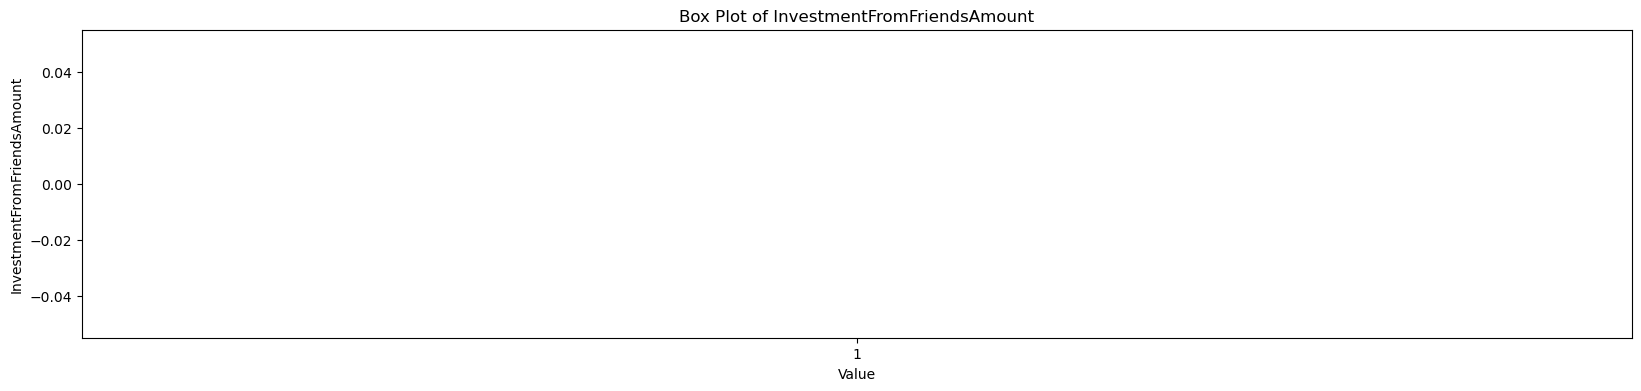

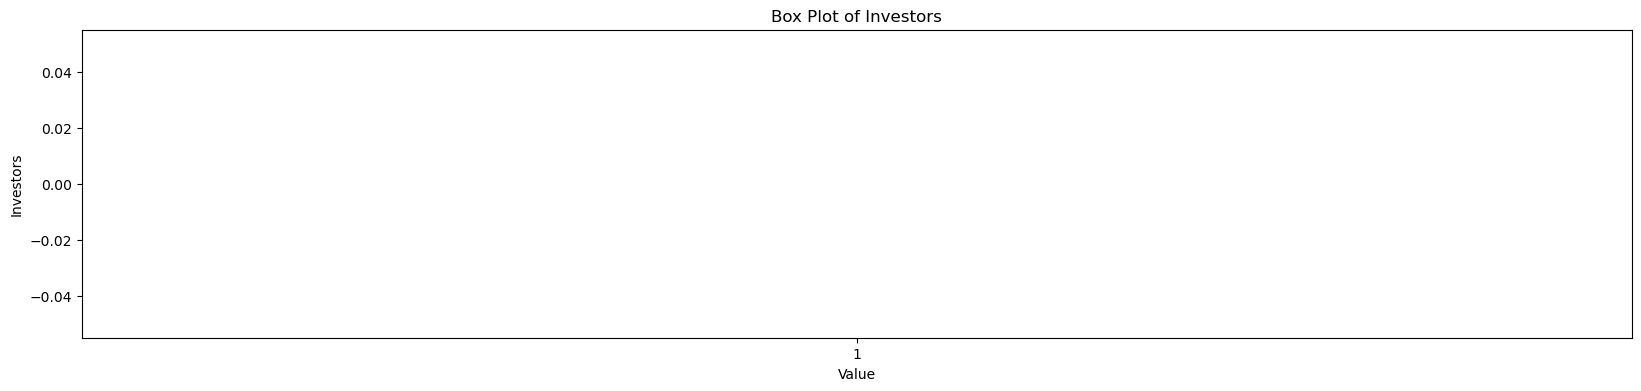

In [45]:
# Again creating the custom design for boxplots 
boxprops = dict (linestyle = '-', linewidth = 2, color = 'darkgreen' )
whiskerprops = dict (linestyle = '-', linewidth = 2, color = 'darkgreen')
capprops = dict (linestyle = '-', linewidth = 2, color = 'darkgreen')
flierprops = dict(marker = 'o', markersize = 5, markerfacecolor = 'darkgreen', markeredgecolor = 'darkblue')

# Creating boxplots for all oultliers cleaned columns
for column in num_cols:
    fig, ax = plt.subplots(figsize = (20, 4))
    ax.boxplot(num_cols[column], boxprops = boxprops, whiskerprops = whiskerprops, capprops = capprops, flierprops = flierprops)
    ax.set_title(f'Box Plot of {column}')
    ax.set_xlabel('Value')
    ax.set_ylabel(column)
    plt.show()

In [46]:
# # Plotting denisty plots for better visualization after box plots
# for col in num_cols.columns:
#     if num_cols[col].dtype != 'object': # check if the column is numeric
#         fig, ax = plt.subplots(figsize = (20, 4))
#         sns.kdeplot(num_cols[col], shade=True)
#         plt.title('Density plot of {}'.format(col))
#         plt.show()

## Categorical Columns Visualization

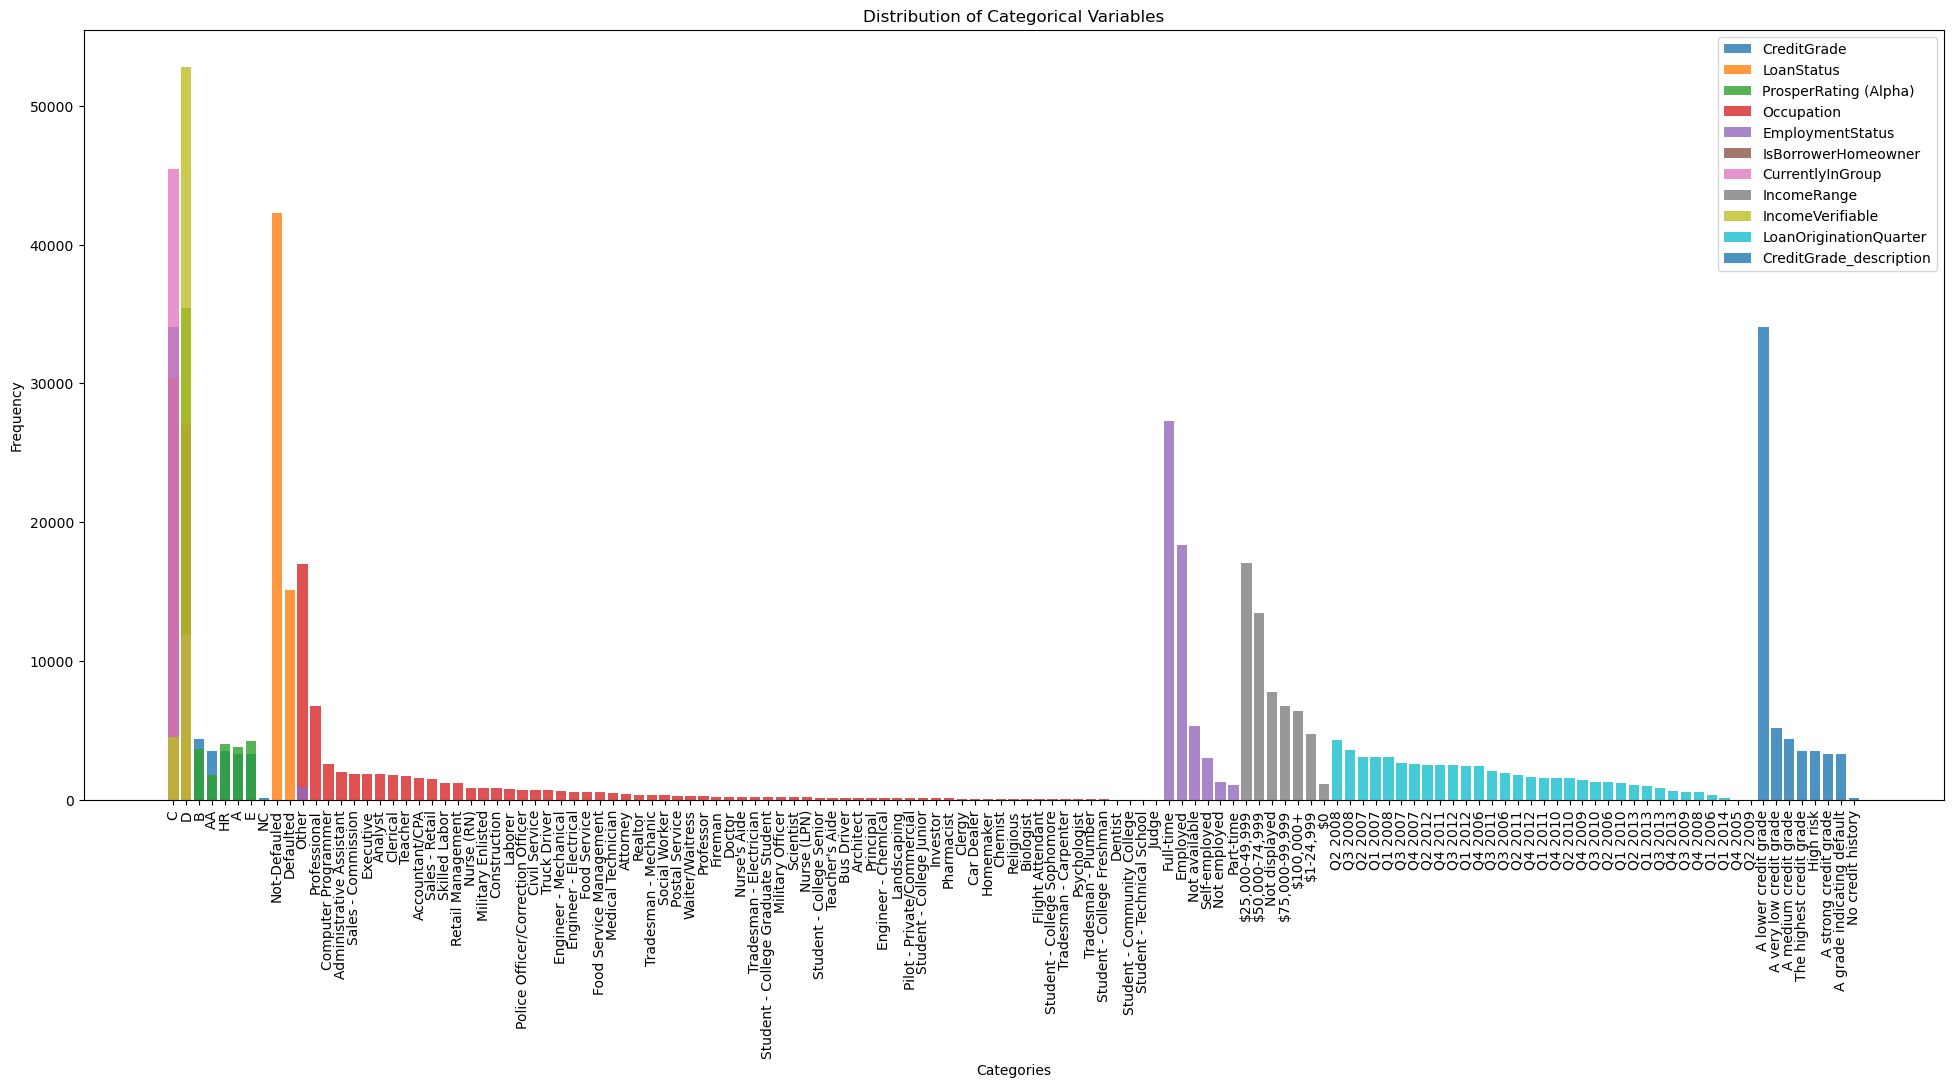

In [47]:
fig, ax = plt.subplots(figsize=(24, 10))

for col in cat_cols.columns:
    # Calculate the frequency of each category in the column
    counts = df[col].value_counts()
    # Create a stacked bar plot with the data
    plt.bar(counts.index, counts.values, label=col, alpha=0.8)
    # Add a legend to the plot
    plt.legend()

# Set the title and axis labels of the plot
plt.title('Distribution of Categorical Variables')
plt.xlabel('Categories')
plt.ylabel('Frequency')

plt.xticks(rotation=90)
# Show the plot
plt.show()

In [48]:
cat_cols.columns

Index(['CreditGrade', 'LoanStatus', 'ProsperRating (Alpha)', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeRange', 'IncomeVerifiable', 'LoanOriginationQuarter', 'CreditGrade_description'], dtype='object')

In [49]:
num_cols.columns

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
       'ScorexChange

## Univariate Analysis

In [50]:
num_cols

Term  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio  StatedMonthlyIncome  TotalProsperLoans  TotalProsperPaymentsBilled  OnTimeProsperPayments  ProsperPaymentsLessThanOneMonthLate  ProsperPaymentsOneMonthPlusLate  ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  ScorexChangeAtTimeOfListing  LoanCurrentDaysDelinquent  LoanFirstDefaultedCycleNumber  \
0      36.0      0.16516        0.1580       0.1380                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                  2.000000                  640.0                  659.0            5.000000         4.000000                        12.0                    1.0                         24.0                   3.0             3.0                   2.0             472.0                      4.0                       0.0                        0.0                0.000000             0.000000              1500.000000    11.000000                            0.810000                 0.000000               0.17          3083.333333           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
1      36.0      0.28269        0.2750       0.2400                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 81.616592                    NaN                    NaN            9.583435         8.363346                         3.0                    0.0                          0.0                   0.0             1.0                   1.0               NaN                      0.0                       0.0                        NaN            15691.794059             0.532197             10761.775498    21.834996                            0.857548                 0.906618               0.06          2083.333333           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
2      36.0      0.15033        0.1325       0.1225                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 19.000000                  640.0                  659.0            2.000000         2.000000                        10.0                    1.0                         40.0                   3.0             5.0                   NaN               NaN                      1.0                       0.0                        0.0             1220.000000             0.320000              2580.000000     7.000000                                 NaN                 0.000000               0.27          1666.666667           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
3      36.0      0.17969        0.1435       0.1335

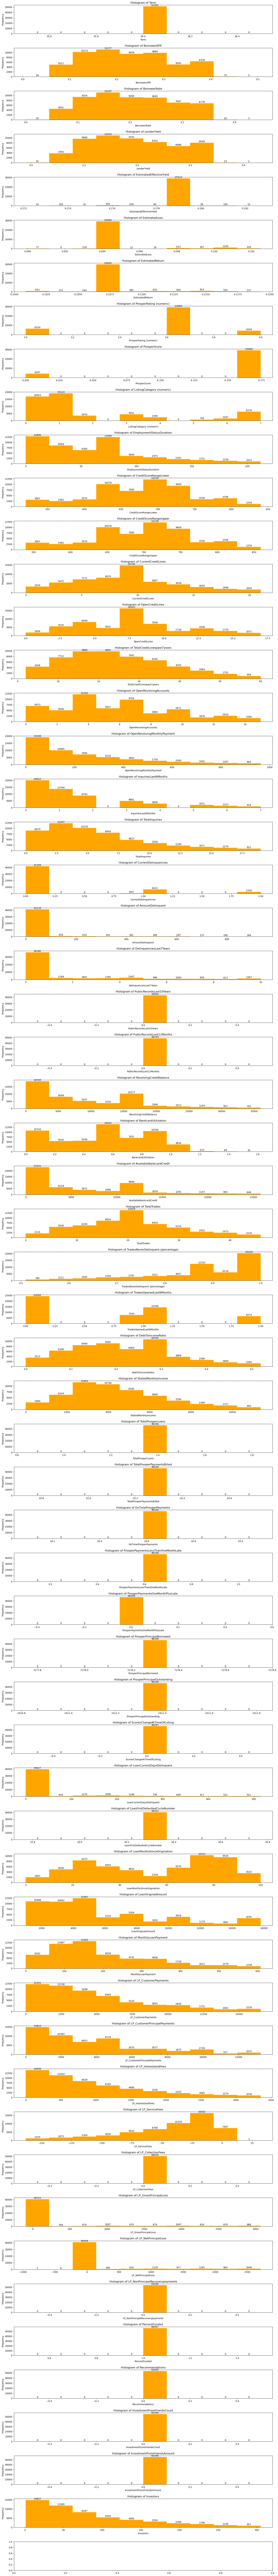

In [51]:
# Set the number of rows and columns for the plot grid
num_rows = 60
numeric_cols = 1

# Create the plot grid
fig, axs = plt.subplots(num_rows, numeric_cols, figsize=(20, 200))

# Flatten the axis array so we can loop through it
axs = axs.flatten()

# Loop through the numerical columns and plot a histogram for each one
for i, col in enumerate(num_cols):
    n, bins, patches = axs[i].hist(num_cols[col], color='orange')
    bin_counts = [int(count) for count in n]
    for j in range(len(patches)):
        x = patches[j].get_x() + patches[j].get_width() / 2
        y = patches[j].get_height() + 5
        axs[i].text(x, y, bin_counts[j], ha='center', va='bottom')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"Histogram of {col}")

# Hide any unused plot grids
for i in range(len(num_cols), num_rows*numeric_cols):
    axs[i].axis('off')

# Adjust the plot spacing
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()

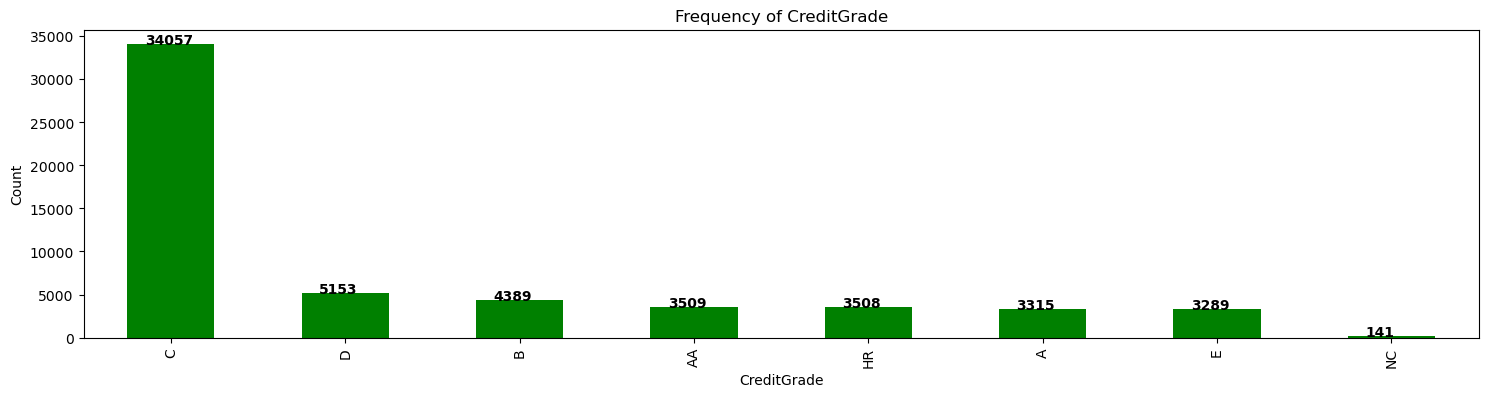

In [52]:
# Plotting the bar Graph for CreditGrade column
fig = plt.figure(figsize = (18,4))
count = cat_cols['CreditGrade'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("CreditGrade")
plt.ylabel('Count')
plt.title('Frequency of CreditGrade')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

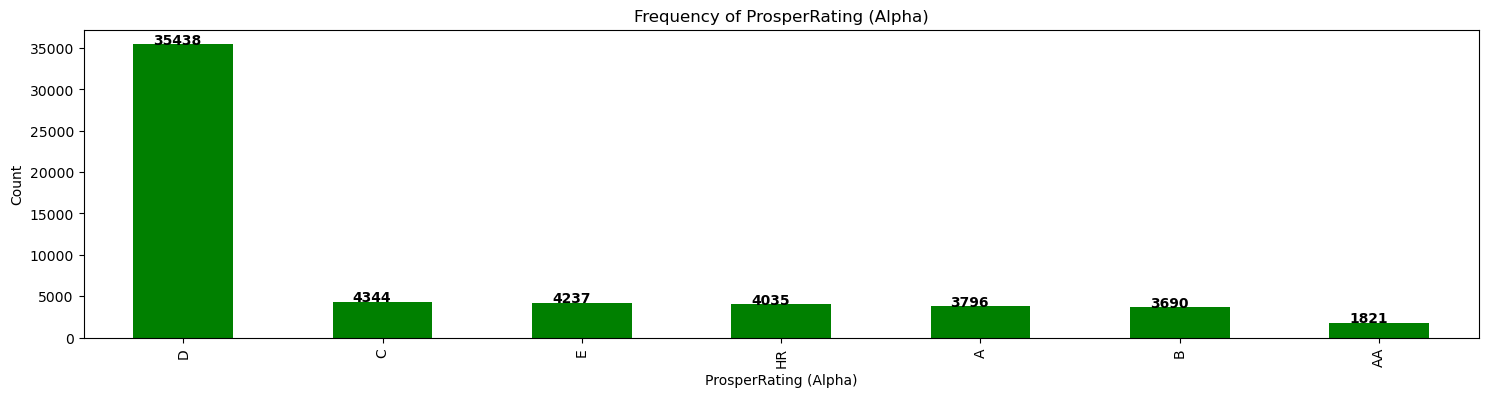

In [53]:
# Plotting the bar Graph for ProsperRating (Alpha) column
fig = plt.figure(figsize = (18,4))
count = cat_cols['ProsperRating (Alpha)'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("ProsperRating (Alpha)")
plt.ylabel('Count')
plt.title('Frequency of ProsperRating (Alpha)')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

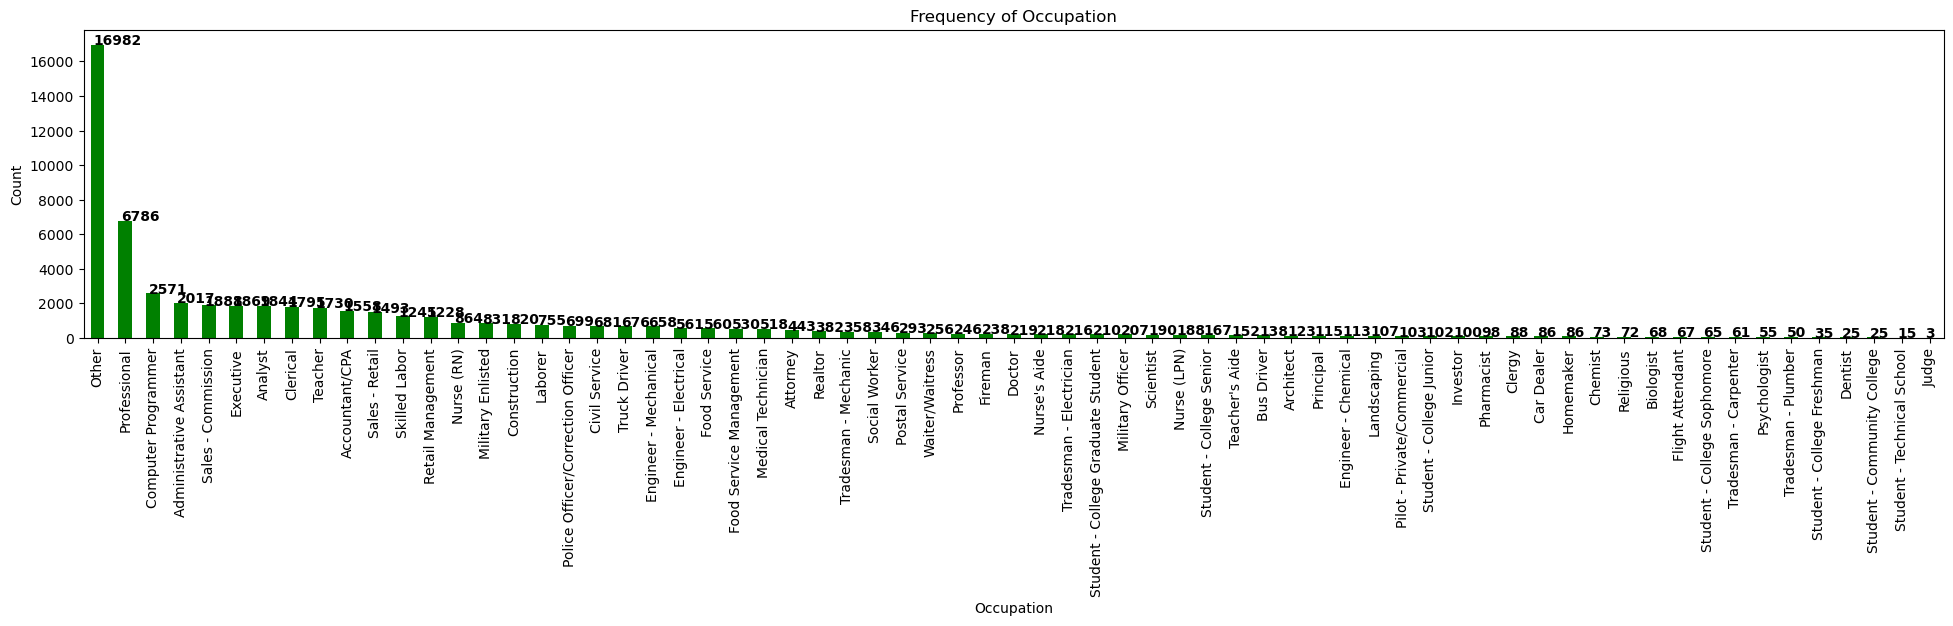

In [54]:
# Plotting the bar Graph for Occupation column
fig = plt.figure(figsize = (24,4))
count = cat_cols['Occupation'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("Occupation")
plt.ylabel('Count')
plt.title('Frequency of Occupation')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

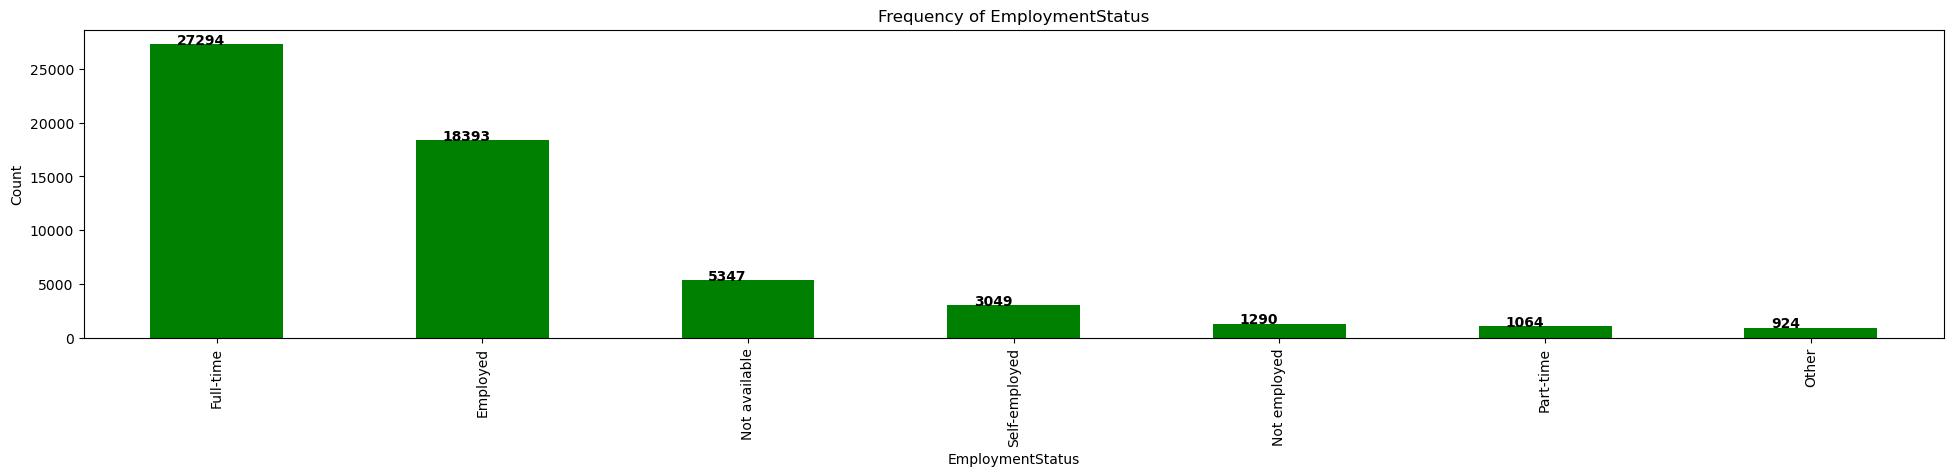

In [55]:
# Plotting the bar Graph for EmploymentStatus column
fig = plt.figure(figsize = (24,4))
count = cat_cols['EmploymentStatus'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("EmploymentStatus")
plt.ylabel('Count')
plt.title('Frequency of EmploymentStatus')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

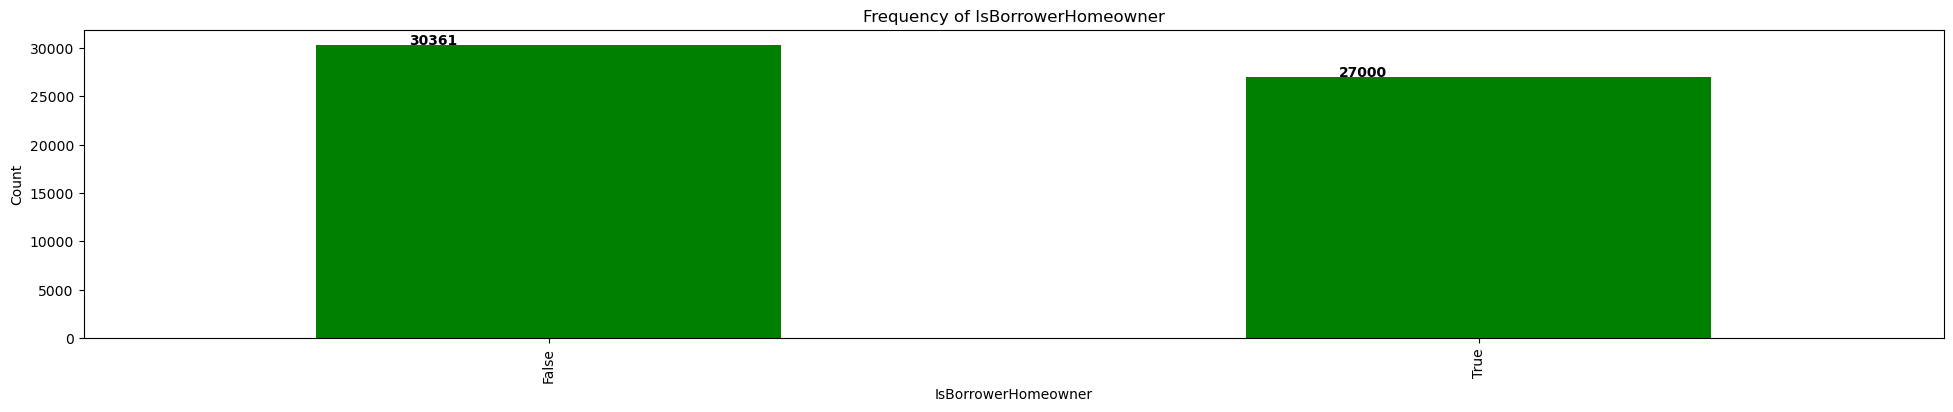

In [56]:
# Plotting the bar Graph for IsBorrowerHomeowner column
fig = plt.figure(figsize = (24,4))
count = cat_cols['IsBorrowerHomeowner'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("IsBorrowerHomeowner")
plt.ylabel('Count')
plt.title('Frequency of IsBorrowerHomeowner')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

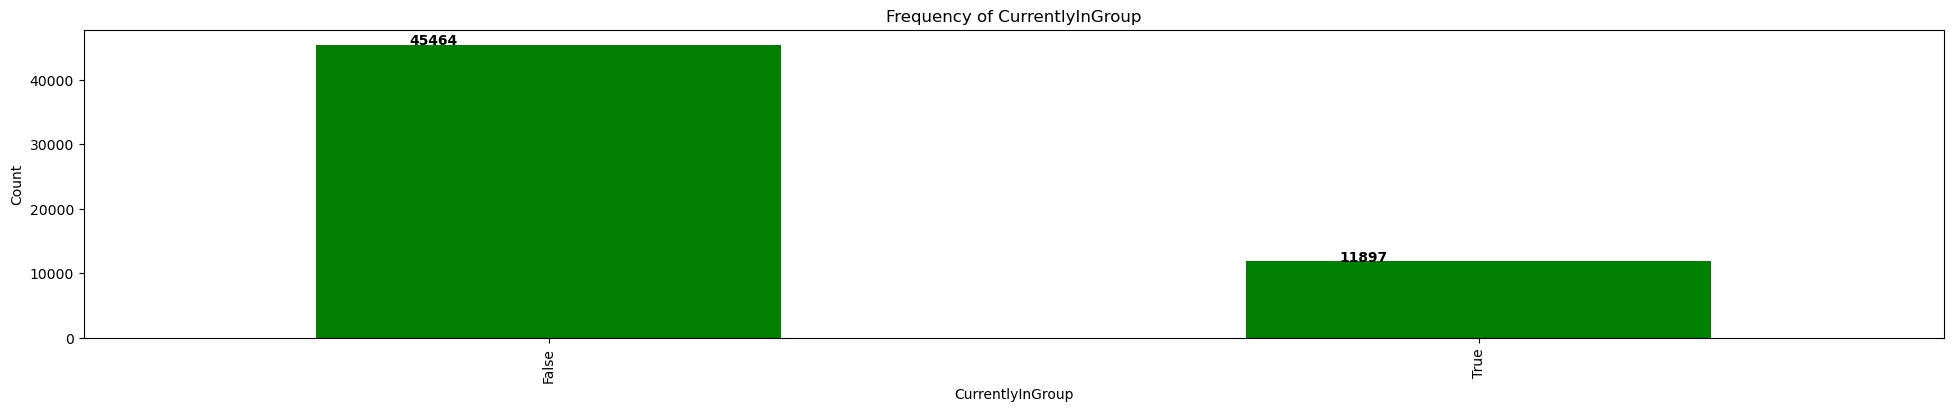

In [57]:
# Plotting the bar Graph for CurrentlyInGroup column
fig = plt.figure(figsize = (24,4))
count = cat_cols['CurrentlyInGroup'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("CurrentlyInGroup")
plt.ylabel('Count')
plt.title('Frequency of CurrentlyInGroup')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

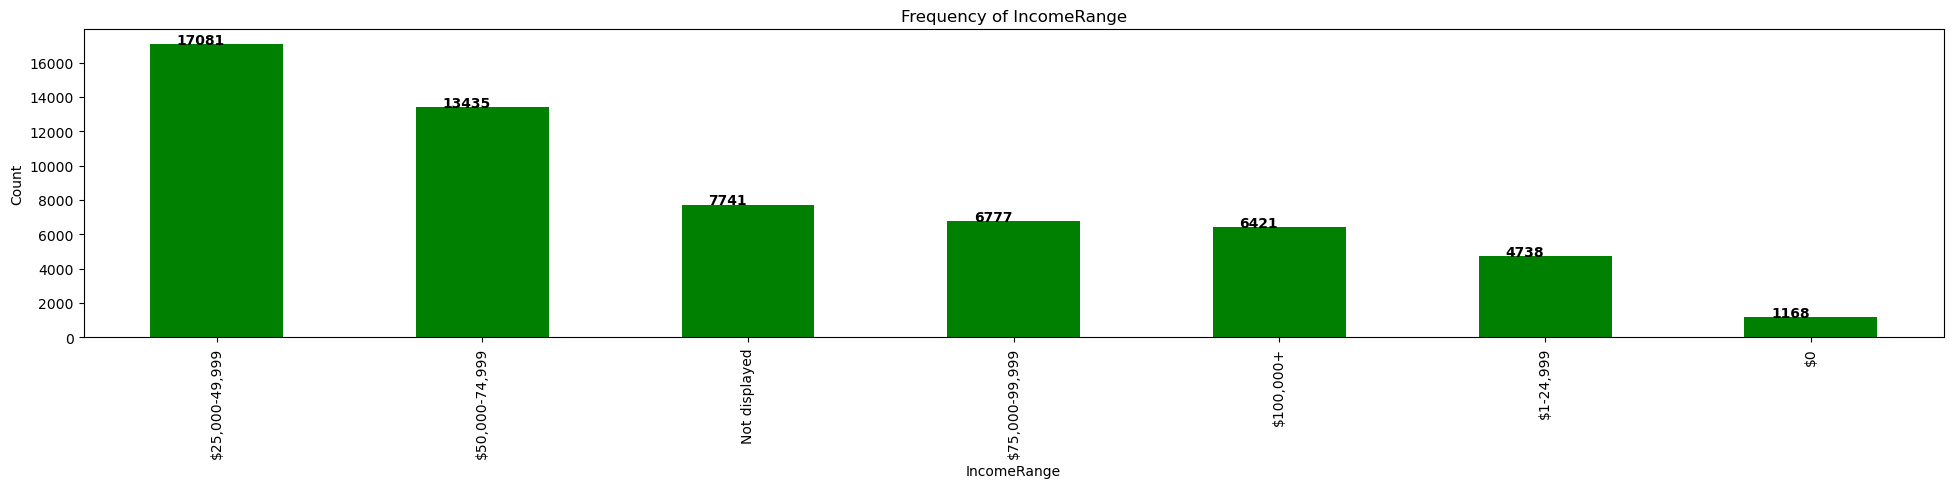

In [58]:
# Plotting the bar Graph for IncomeRange column
fig = plt.figure(figsize = (24,4))
count = cat_cols['IncomeRange'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("IncomeRange")
plt.ylabel('Count')
plt.title('Frequency of IncomeRange')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

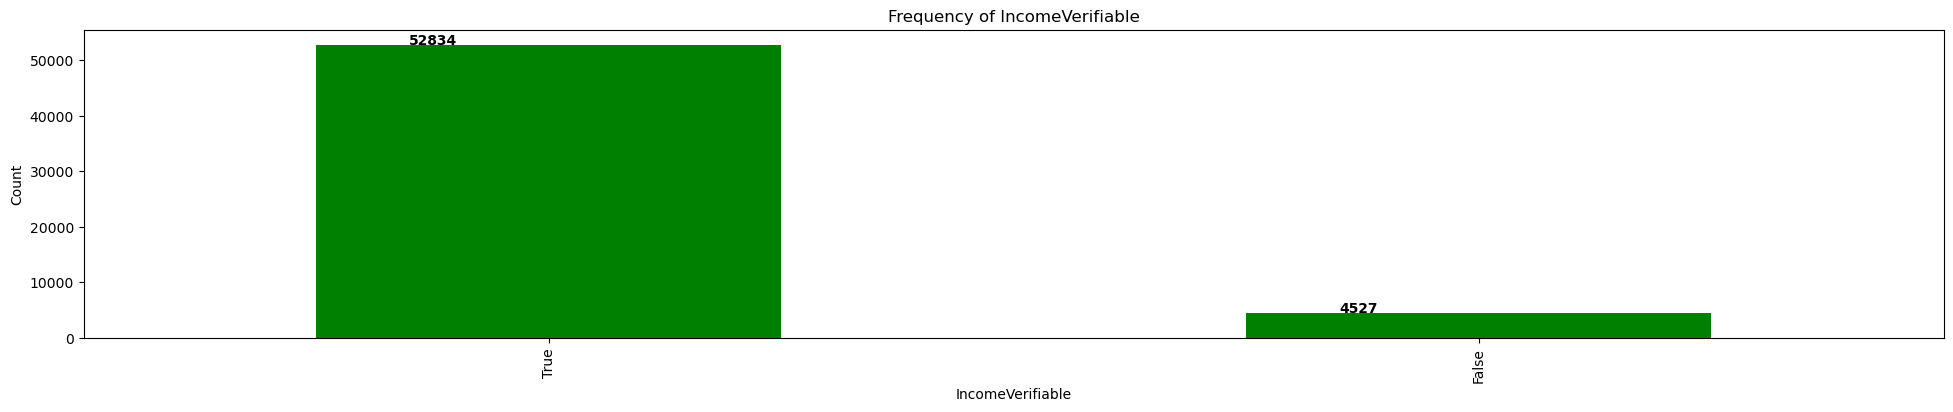

In [59]:
# Plotting the bar Graph for IncomeVerifiable column
fig = plt.figure(figsize = (24,4))
count = cat_cols['IncomeVerifiable'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("IncomeVerifiable")
plt.ylabel('Count')
plt.title('Frequency of IncomeVerifiable')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

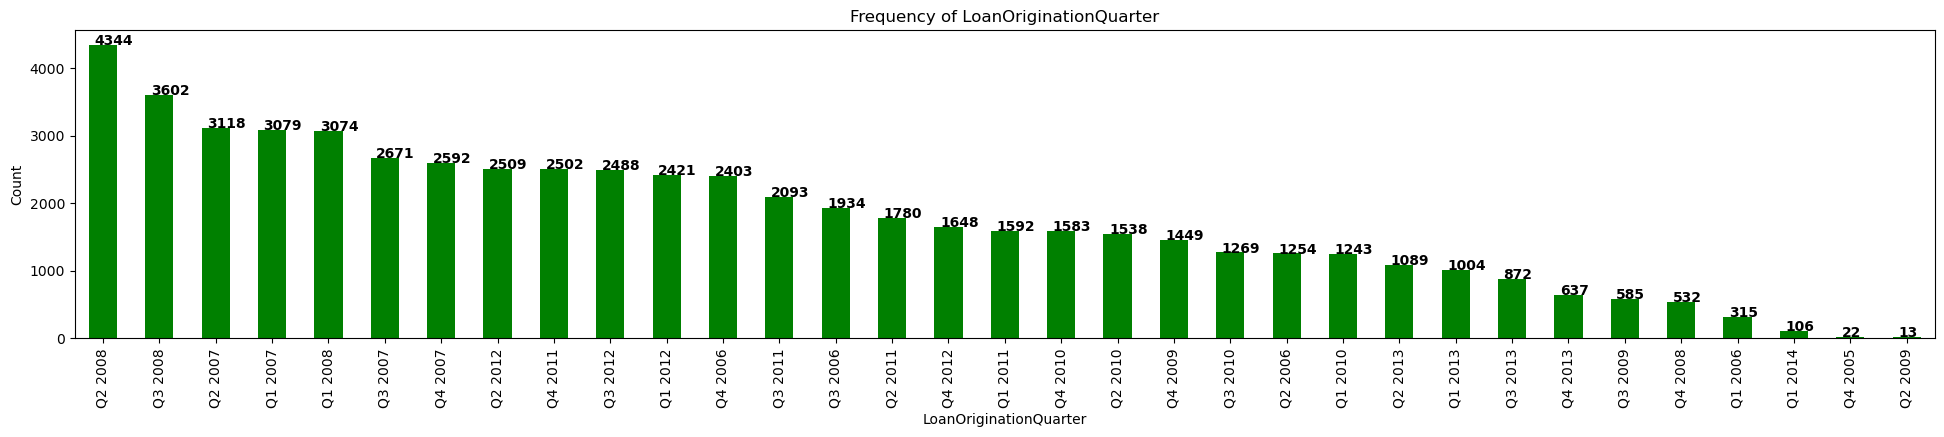

In [60]:
# Plotting the bar Graph for LoanOriginationQuarter column
fig = plt.figure(figsize = (24,4))
count = cat_cols['LoanOriginationQuarter'].value_counts()
ax = count.plot(kind = 'bar', color = 'green')
plt.xlabel("LoanOriginationQuarter")
plt.ylabel('Count')
plt.title('Frequency of LoanOriginationQuarter')

for i, v in enumerate(count):
    ax.text(i - 0.15, v + 1, str(v), color='black', fontweight='bold')

plt.show()

## Bivariate Analysis

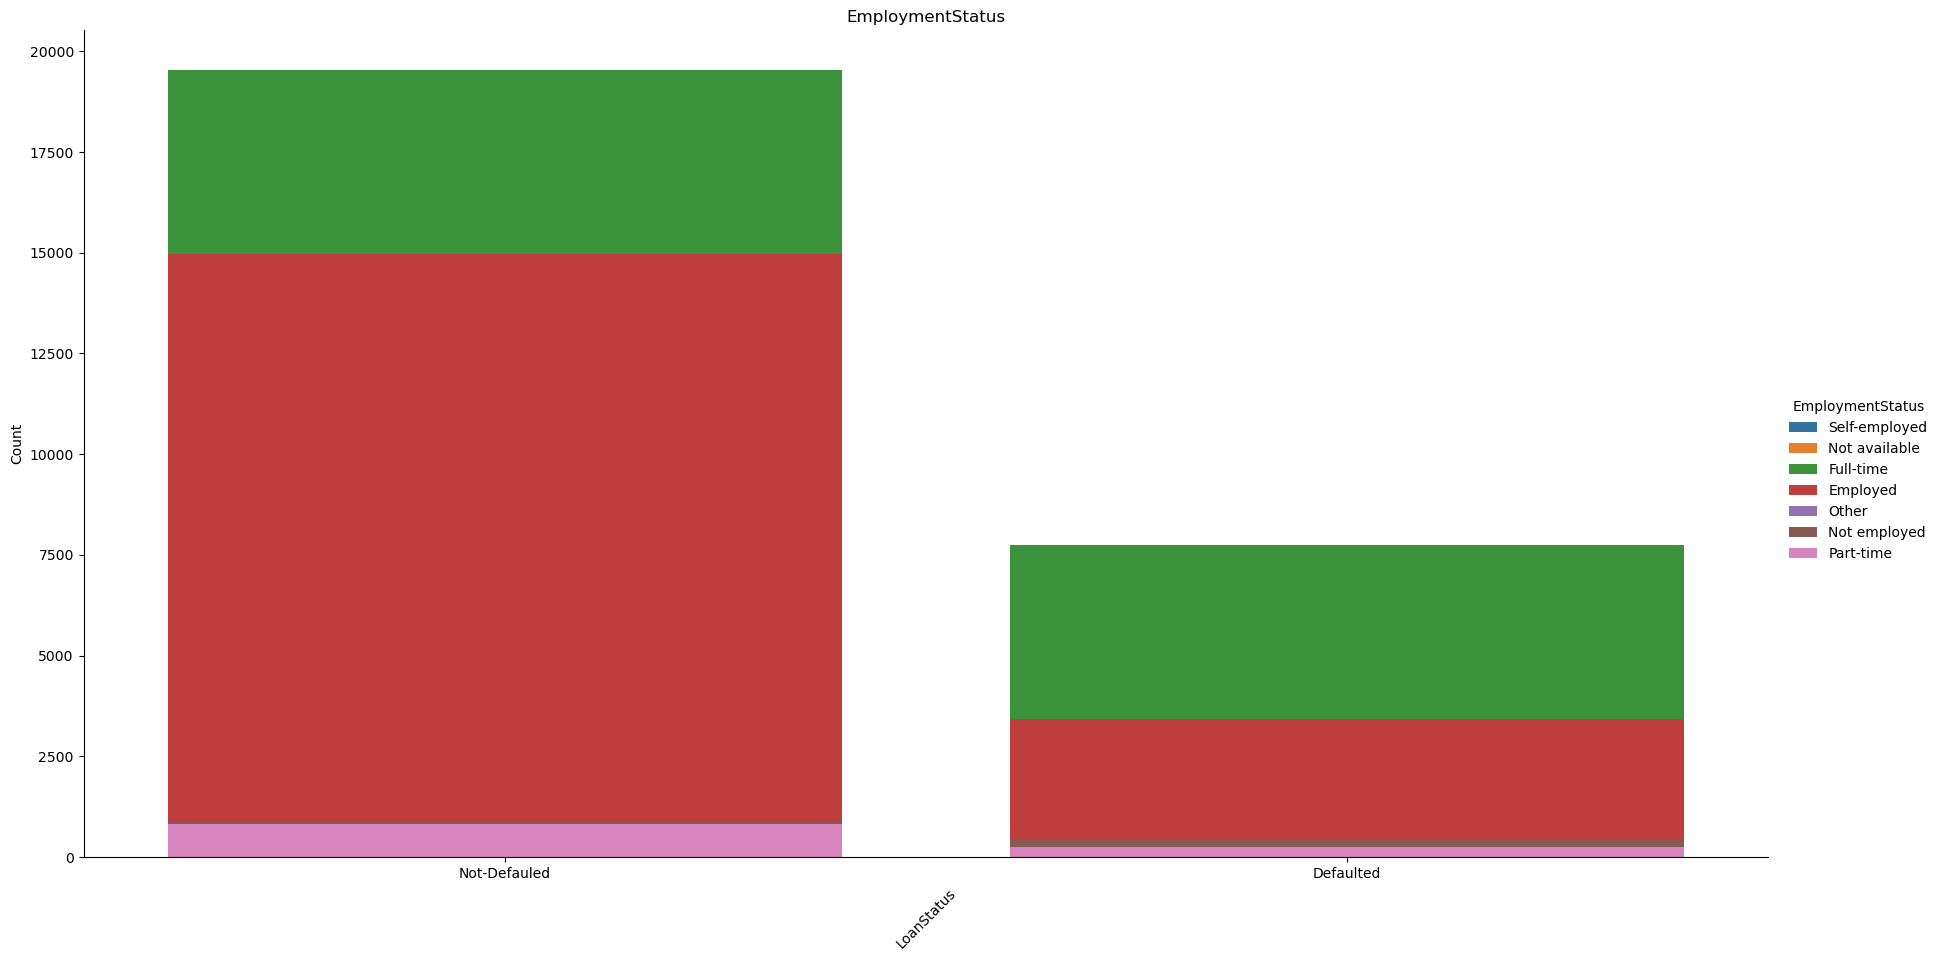

In [61]:
# Plotting the Graph for LoanStatus and EmploymentStatus columns
sns.catplot(x="LoanStatus", hue="EmploymentStatus", kind="count", data=cat_cols, dodge=False, height=9, aspect=2)

# Set the x-axis and y-axis labels and rotate the x-axis label
plt.xlabel("LoanStatus", rotation=45)
plt.ylabel("Count")
plt.title("EmploymentStatus")

# Display the plot
plt.show()

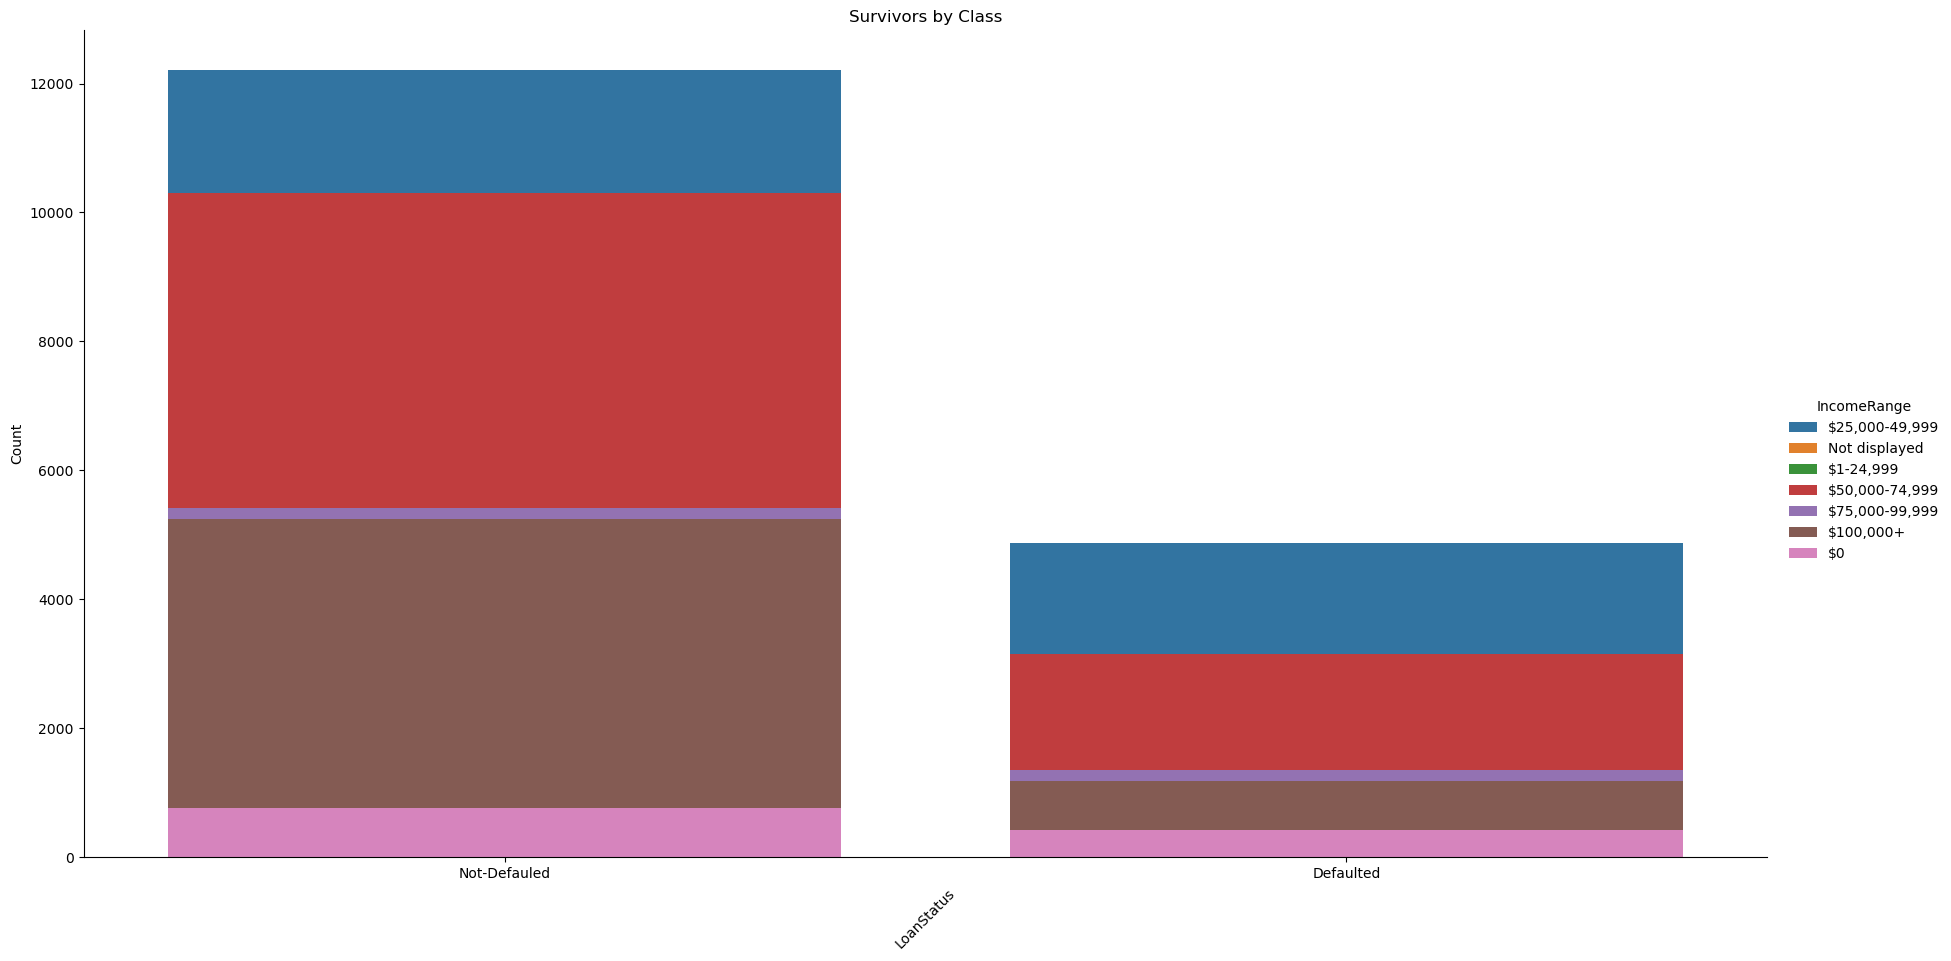

In [62]:
# Plotting the Graph for LoanStatus and IncomeRange columns
sns.catplot(x = "LoanStatus", hue = "IncomeRange", kind = "count", data = cat_cols, dodge = False, height = 9, aspect = 2)

# Set the x-axis and y-axis labels and rotate the x-axis label
plt.xlabel("LoanStatus", rotation=45)
plt.ylabel("Count")
plt.title("Survivors by Class")

# Display the plot
plt.show()

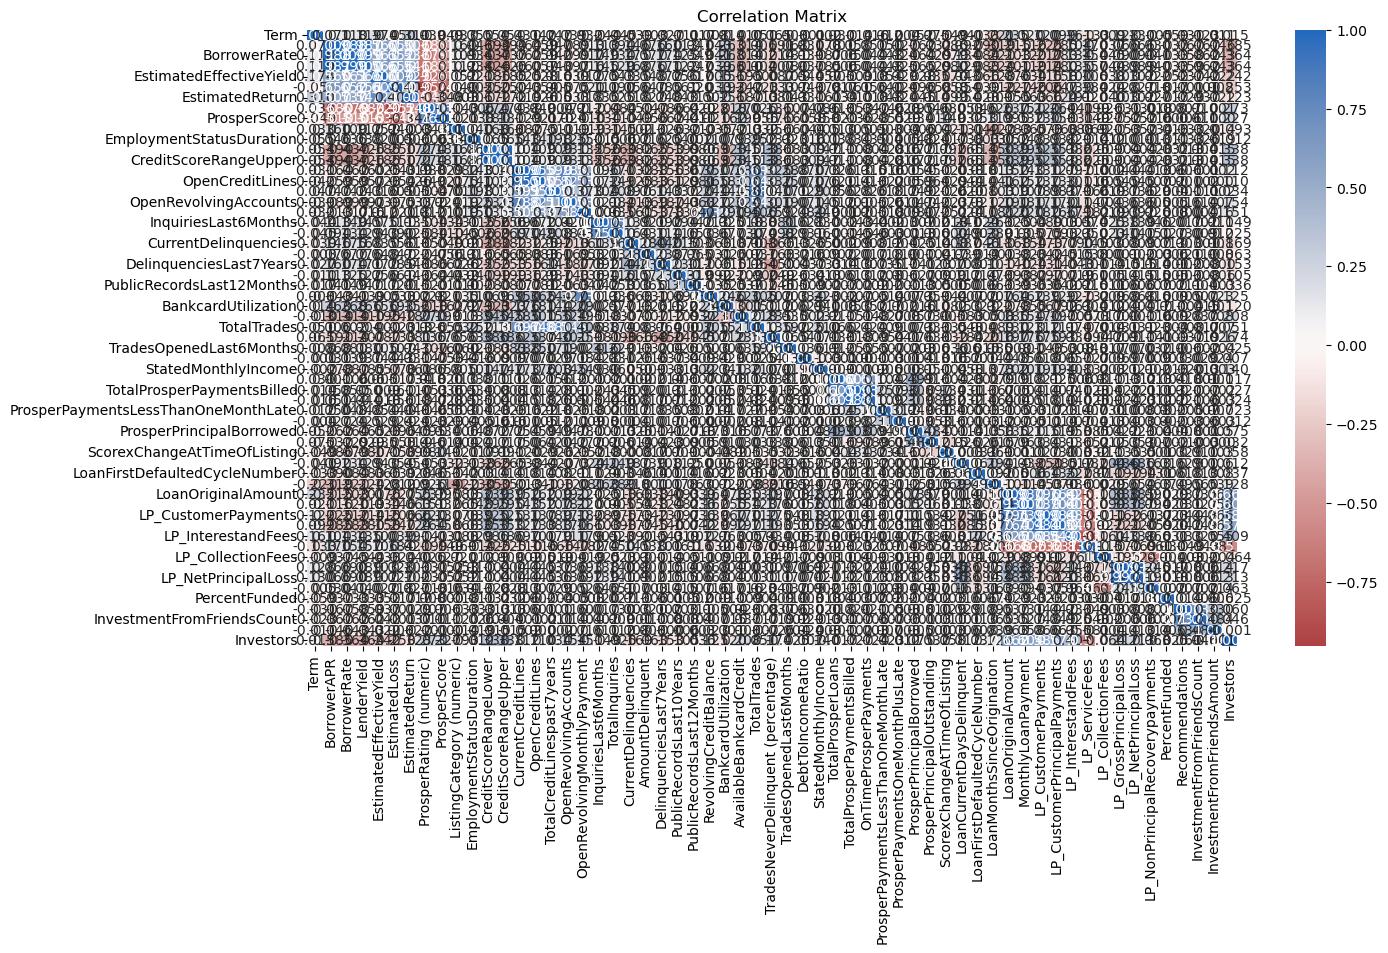

In [63]:
# Matrix of correlations for all numerical variables
plt.figure(figsize = [15, 8])
sns.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.margins(x = 0.5, y= 0.3)
plt.show()

# Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder
cat_list = [] 
num_list = []
for colname, colvalue in df_c.iteritems():
        cat_list.append(colname)
for col in cat_list:
    encoder = LabelEncoder()
    encoder.fit(df_c[col])
    df_c[col] = encoder.transform(df_c[col])

L=df_c.columns.to_list()
df_c = pd.DataFrame(df_c, columns=L)
data=pd.concat([df_c,df_n],axis=1)

data = data.select_dtypes(exclude=['object'])
data.head()

CreditGrade  LoanStatus  ProsperRating (Alpha)  Occupation  EmploymentStatus  IsBorrowerHomeowner  CurrentlyInGroup  IncomeRange  IncomeVerifiable  LoanOriginationQuarter  CreditGrade_description  Term  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio  StatedMonthlyIncome  TotalProsperLoans  TotalProsperPaymentsBilled  OnTimeProsperPayments  \
0            3           1                      4          35                 6                    1                 1            3                 1                      17                        1  36.0      0.16516        0.1580       0.1380                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                  2.000000                  640.0                  659.0            5.000000         4.000000                        12.0                    1.0                         24.0                   3.0             3.0                   2.0        472.000000                      4.0                       0.0                   0.000000                0.000000             0.000000              1500.000000    11.000000                            0.810000                 0.000000               0.17          3083.333333           1.337528                   20.233199              19.585899   
1            6           1                      4          35                 2                    0                 1            6                 1                       1                        5  36.0      0.28269        0.2750       0.2400                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 81.616592                  480.0                  499.0            9.583435         8.363346                         3.0                    0.0                          0.0                   0.0             1.0                   1.0       1065.968395                      0.0                       0.0                   0.023353            15691.794059             0.532197             10761.775498    21.834996                            0.857548                 0.906618               0.06          2083.333333           1.337528                   20.233199              19.585899   
2            3           1                      4          66                 1                    0                 0            1                 1                      26                        1  36.0      0.15033        0.1325       0.1225                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 19.000000                  640.0                  659.0            2.000000         2.000000                        10.0                    1.0                         40.0                   3.0             5.0                   3.0       2224.000000                      1.0                       0.0                   0.000000             1220.000000             0.320000              2580.000000     7.000000                            0.400000                 0.000000               0.27          1666.666667           1.337528                   20.233199              19.585899   
3            3           1                      2          48                 0                    0                 0     

# Feature Engineering

# Feature Selection
> by using mutual_info_classif

In [65]:
X = data.copy()
y = X.pop("LoanStatus")
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

LoanCurrentDaysDelinquent              0.576361
LoanFirstDefaultedCycleNumber          0.484286
LP_GrossPrincipalLoss                  0.477139
LP_NetPrincipalLoss                    0.472873
LP_CustomerPrincipalPayments           0.343325
LP_CustomerPayments                    0.130560
BorrowerAPR                            0.060408
BorrowerRate                           0.054513
LenderYield                            0.048390
MonthlyLoanPayment                     0.047800
LP_NonPrincipalRecoverypayments        0.047368
LP_CollectionFees                      0.038762
EstimatedReturn                        0.037588
EstimatedEffectiveYield                0.036051
EstimatedLoss                          0.032791
CreditScoreRangeUpper                  0.031641
LoanOriginationQuarter                 0.028331
ProsperRating (numeric)                0.028048
CreditGrade                            0.027556
CreditScoreRangeLower                  0.027113
LoanMonthsSinceOrigination             0

Text(0.5, 0, 'Features')

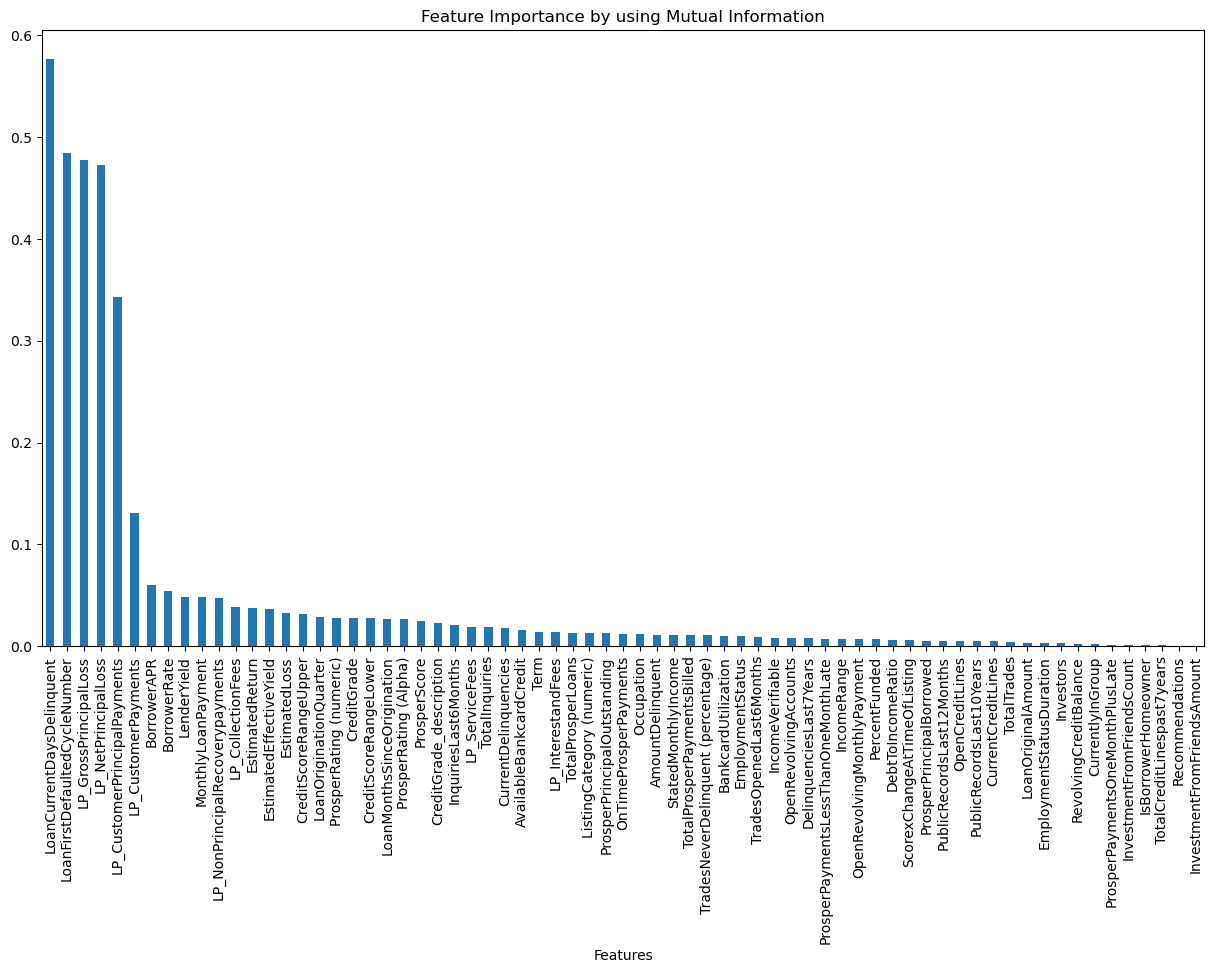

In [66]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 8))
plt.title("Feature Importance by using Mutual Information")
plt.xlabel("Features")

# 10 best Feature selection using by mutual_info_classif

In [67]:
from sklearn.feature_selection import SelectKBest
sel_ten_cols = SelectKBest(mutual_info_classif, k=10)
sel_ten_cols.fit(X, y)
selected_data=X.columns[sel_ten_cols.get_support()]
selected_data

Index(['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments'], dtype='object')

In [68]:
X=X[selected_data]

In [69]:
X.corr()

BorrowerAPR  BorrowerRate  LenderYield  LoanCurrentDaysDelinquent  LoanFirstDefaultedCycleNumber  LP_CustomerPayments  LP_CustomerPrincipalPayments  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  LP_NonPrincipalRecoverypayments
BorrowerAPR                         1.000000      0.988037     0.987199                   0.092074                      -0.090373            -0.225088                     -0.285223               0.065980             0.066358                         0.029531
BorrowerRate                        0.988037      1.000000     0.998667                   0.134165                      -0.083688            -0.216901                     -0.283178               0.089686             0.089797                         0.040868
LenderYield                         0.987199      0.998667     1.000000                   0.128602                      -0.083059            -0.214231                     -0.280288               0.088526             0.088659                         0.039664
LoanCurrentDaysDelinquent           0.092074      0.134165     0.128602                   1.000000                       0.061428            -0.251134                     -0.285336               0.485615             0.486327                         0.163185
LoanFirstDefaultedCycleNumber      -0.090373     -0.083688    -0.083059                   0.061428                       1.000000             0.164334                      0.134594              -0.196667            -0.194465                        -0.131325
LP_CustomerPayments                -0.225088     -0.216901    -0.214231                  -0.251134                       0.164334             1.000000                      0.983756              -0.161594            -0.161360                        -0.036692
LP_CustomerPrincipalPayments       -0.285223     -0.283178    -0.280288                  -0.285336                       0.134594             0.983756                      1.000000              -0.221496            -0.219973                        -0.058528
LP_GrossPrincipalLoss               0.065980      0.089686     0.088526                   0.485615                      -0.196667            -0.161594                     -0.221496               1.000000             0.992176                         0.244926
LP_NetPrincipalLoss                 0.066358      0.089797     0.088659                   0.486327                      -0.194465            -0.161360                     -0.219973               0.992176             1.000000                         0.189712
LP_NonPrincipalRecoverypayments     0.029531      0.040868     0.039664                   0.163185                      -0.131325            -0.036692                     -0.058528               0.244926             0.189712                         1.000000

<AxesSubplot: >

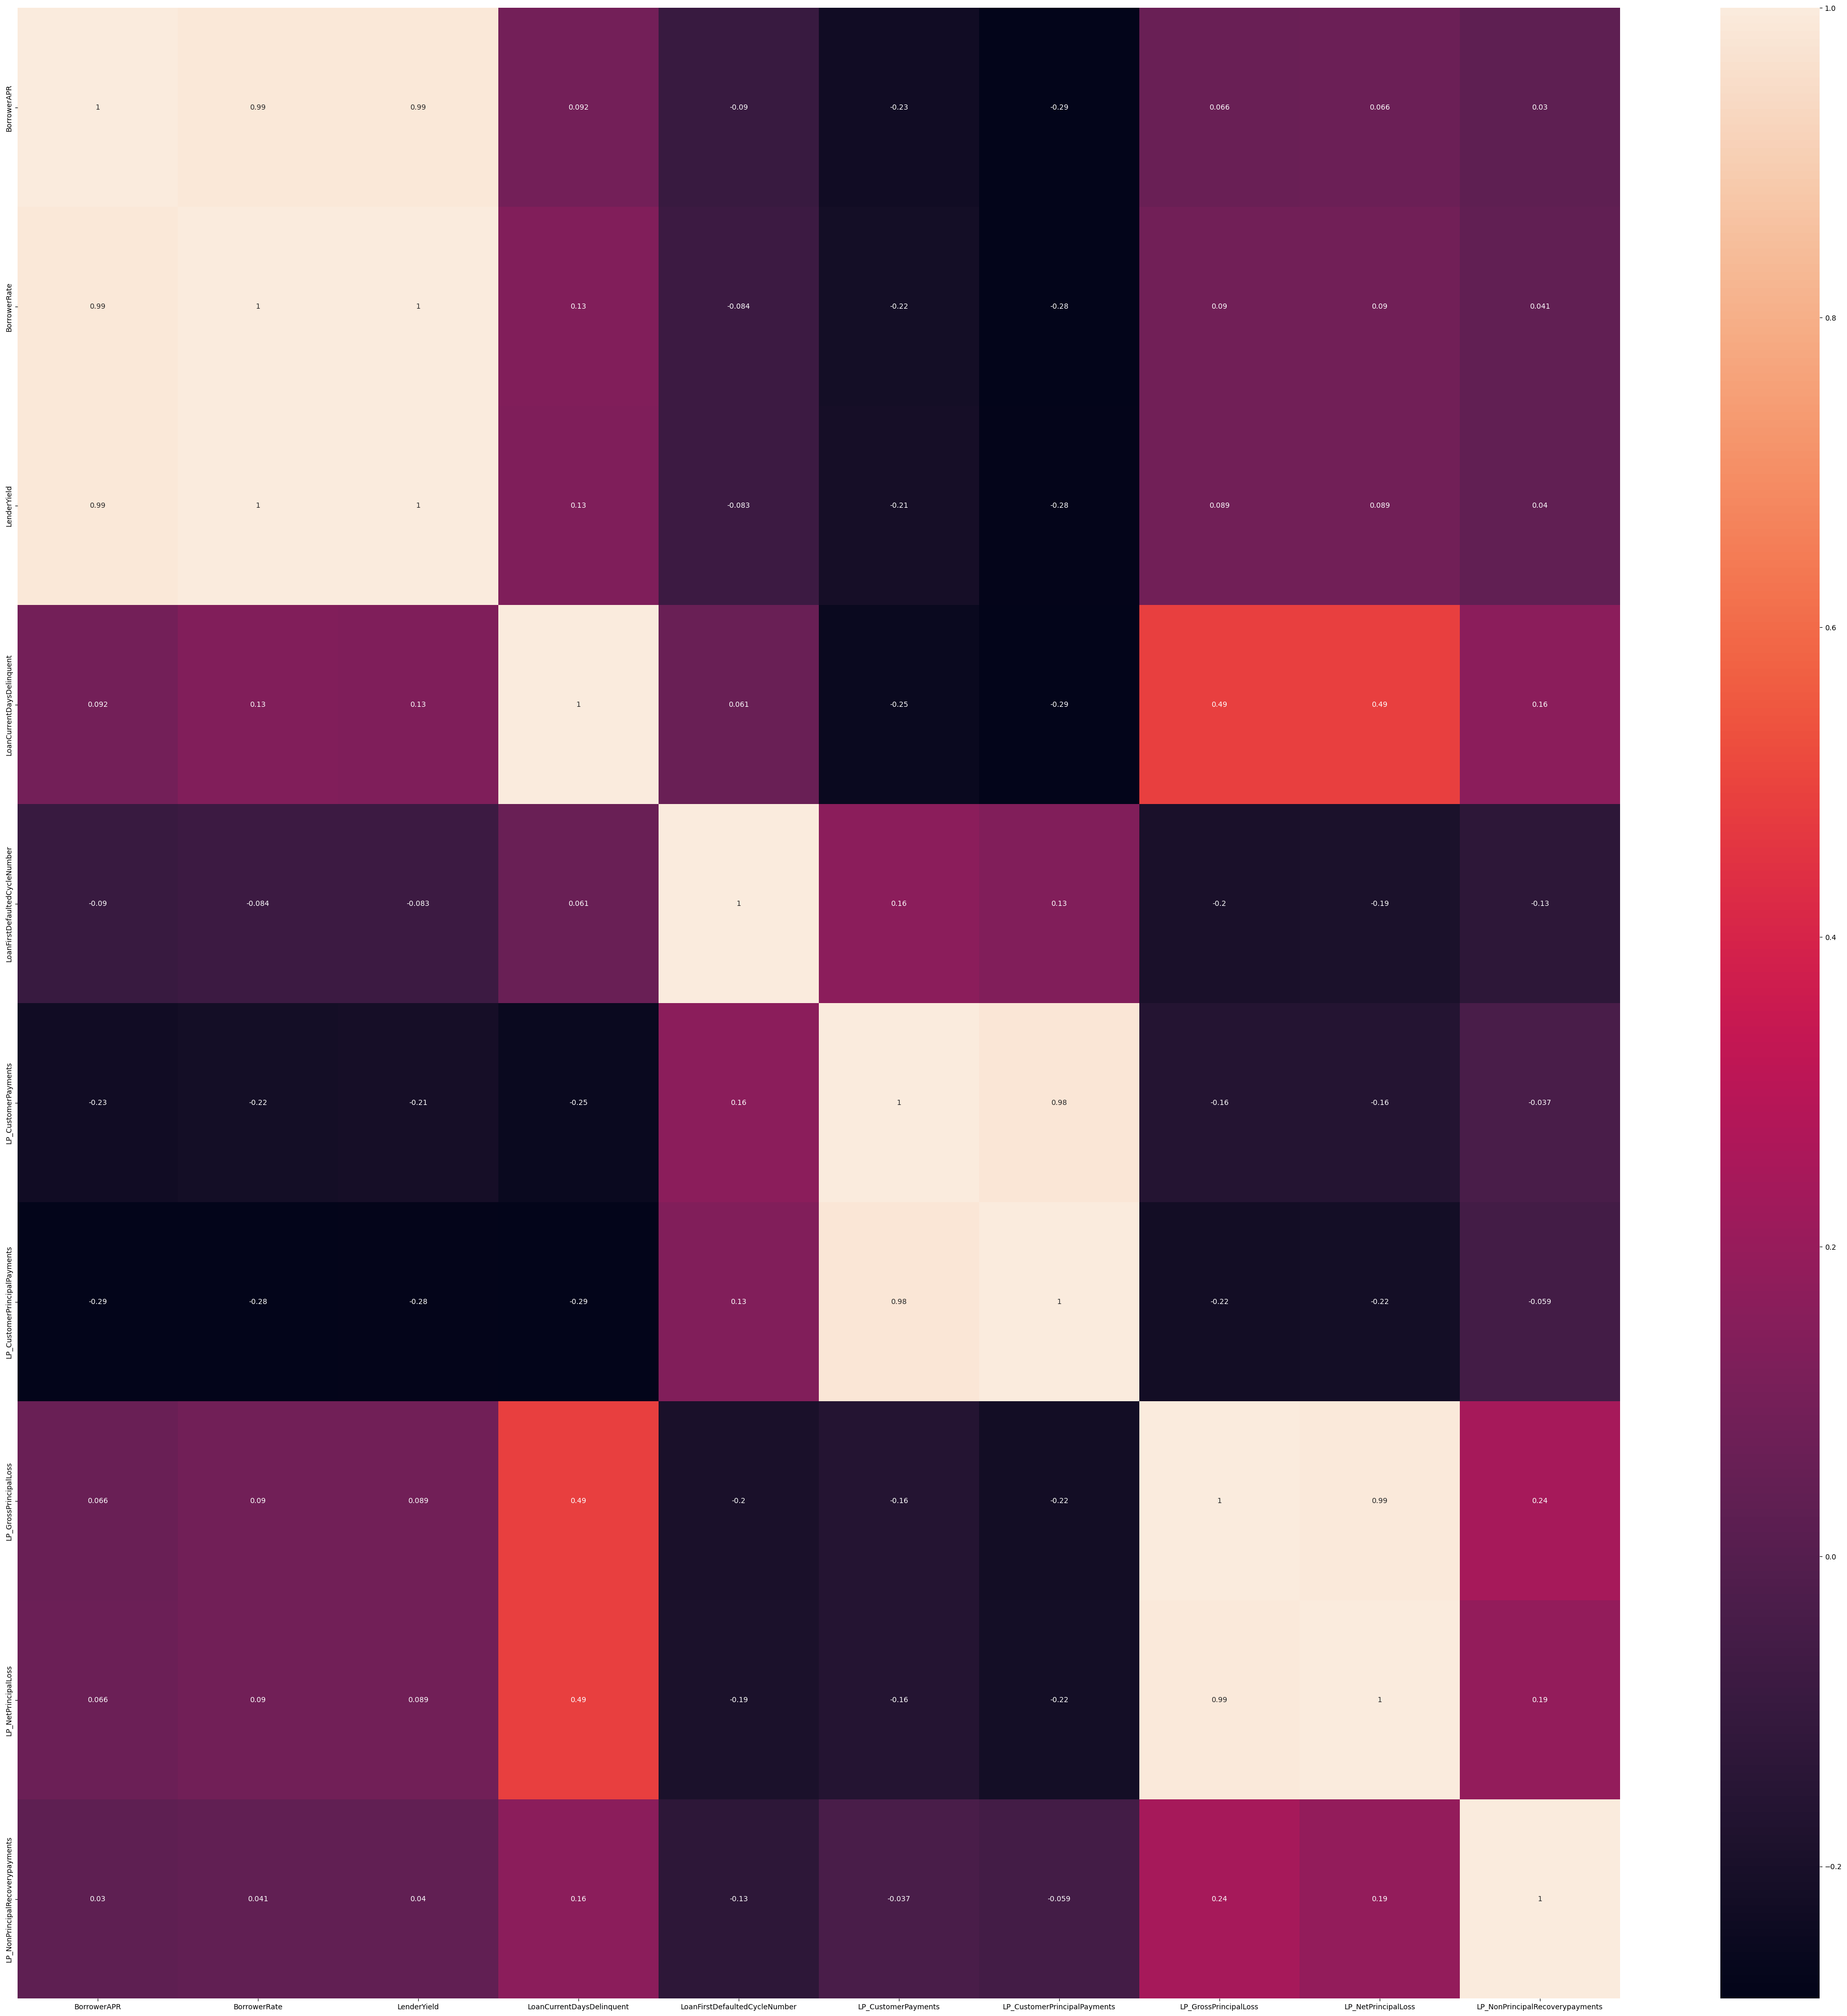

In [70]:
plt.figure(figsize=(50,50))
sns.heatmap(X.corr(),cbar=True,annot=True)     

# Spliting data into training and testing

In [71]:
X.head()

BorrowerAPR  BorrowerRate  LenderYield  LoanCurrentDaysDelinquent  LoanFirstDefaultedCycleNumber  LP_CustomerPayments  LP_CustomerPrincipalPayments  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  LP_NonPrincipalRecoverypayments
0      0.16516        0.1580       0.1380                        0.0                      16.270265           11396.1400                       9425.00                   0.00                 0.00                              0.0
1      0.28269        0.2750       0.2400                        0.0                      16.270265            4186.6300                       3001.00                   0.00                 0.00                              0.0
2      0.15033        0.1325       0.1225                        0.0                      16.270265            1011.6500                       1000.00                   0.00                 0.00                              0.0
3      0.17969        0.1435       0.1335                        3.0                      16.270265             135.8174                         88.64                   0.00                 0.00                              0.0
4      0.35797        0.3177       0.3077                      140.0                       8.000000             521.1300                        209.75                3790.25              3790.25                              0.0

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=int(len(X) * 0.67),random_state=42)
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (38431, 10)
y_train: (38431,)
X_test: (18930, 10)
y_test: (18930,)


In [73]:
X_train.head()

BorrowerAPR  BorrowerRate  LenderYield  LoanCurrentDaysDelinquent  LoanFirstDefaultedCycleNumber  LP_CustomerPayments  LP_CustomerPrincipalPayments  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  LP_NonPrincipalRecoverypayments
50218      0.35797        0.3177       0.3077                       80.0                      16.270265              1302.75                        613.28                    0.0                  0.0                              0.0
5471       0.37453        0.3500       0.3400                        0.0                      16.270265             12236.21                       7500.01                    0.0                  0.0                              0.0
392        0.28370        0.2452       0.2352                        0.0                      16.270265              2380.53                       2000.00                    0.0                  0.0                              0.0
19608      0.09333        0.0899       0.0799                        0.0                      16.270265              2027.22                       2000.00                    0.0                  0.0                              0.0
452        0.14770        0.1299       0.1249                        0.0                      16.270265              1206.41                       1000.00                    0.0                  0.0                              0.0

In [74]:
y_train.head()

50218    1
5471     1
392      1
19608    1
452      1
Name: LoanStatus, dtype: int32

# Standardize the data

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Applying PCA to reduce dimensions

In [76]:
pca=PCA(n_components=10) 

pca.fit(X_train_std)

X_train_PCA=pca.transform(X_train_std)
X_test_PCA=pca.transform(X_test_std)

In [77]:
print('Train data Shape before PCA: ', X_train.shape)
print('Train data Shape after PCA: ', X_train_PCA.shape)

print('Test data Shape before PCA: ', X_test.shape)
print('Test data Shape after PCA: ', X_test_PCA.shape)

Train data Shape before PCA:  (38431, 10)
Train data Shape after PCA:  (38431, 10)
Test data Shape before PCA:  (18930, 10)
Test data Shape after PCA:  (18930, 10)


In [78]:
np.round(pca.explained_variance_ratio_,3)

array([0.356, 0.237, 0.155, 0.107, 0.088, 0.053, 0.002, 0.001, 0.001,
       0.   ])

# Model Building

In [79]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,roc_curve
from sklearn.naive_bayes import GaussianNB

# 1. Logistic Regression

In [80]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_PCA ,y_train)

logistic_pred_train=logistic_model.predict(X_train_PCA)
logistic_pred_test=logistic_model.predict(X_test_PCA)
logistic_train_acc=accuracy_score(logistic_pred_train,y_train)
logistic_test_acc=accuracy_score(logistic_pred_test,y_test)

In [81]:
lo_train=pd.DataFrame.from_dict(classification_report(logistic_pred_train,y_train,output_dict=True))
print('\033[1m'+'\nLogistic Regression - Training Data\n')
lo_train.round(2)


Logistic Regression - Training Data



0        1  accuracy  macro avg  weighted avg
precision      1.0      1.0       1.0        1.0           1.0
recall         1.0      1.0       1.0        1.0           1.0
f1-score       1.0      1.0       1.0        1.0           1.0
support    10124.0  28307.0       1.0    38431.0       38431.0

In [82]:
lo_test=pd.DataFrame.from_dict(classification_report(logistic_pred_test,y_test,output_dict=True))
print('\033[1m'+'\nLogistic Regression - Testing Data\n')
lo_test


Logistic Regression - Testing Data



0             1  accuracy     macro avg  weighted avg
precision     0.996571      0.999213  0.998521      0.997892      0.998522
recall        0.997778      0.998784  0.998521      0.998281      0.998521
f1-score      0.997174      0.998998  0.998521      0.998086      0.998521
support    4951.000000  13979.000000  0.998521  18930.000000  18930.000000

In [83]:
lo_f1_tr=f1_score(logistic_pred_train,y_train,average='weighted').round(2)
lo_f1_tr

1.0

In [84]:
lo_f1_t=f1_score(logistic_pred_test,y_test,average='weighted').round(2)
lo_f1_t

1.0

# 2. Naive Bayes

In [85]:
Gnb_model=GaussianNB()
Gnb_model.fit(X_train_PCA ,y_train)

Gnb_pred_train=Gnb_model.predict(X_train_PCA)
Gnb_pred_test=Gnb_model.predict(X_test_PCA)
Gnb_train_acc=accuracy_score(Gnb_pred_train,y_train)
Gnb_test_acc=accuracy_score(Gnb_pred_test,y_test)

In [86]:
Gnb_train=pd.DataFrame.from_dict(classification_report(Gnb_pred_train,y_train,output_dict=True))
print('\033[1m'+'\nNaive Bayes- Training Data\n')
Gnb_train.round(2)


Naive Bayes- Training Data



0         1  accuracy  macro avg  weighted avg
precision     0.87      0.96      0.94       0.92          0.94
recall        0.89      0.95      0.94       0.92          0.94
f1-score      0.88      0.96      0.94       0.92          0.94
support    9907.00  28524.00      0.94   38431.00      38431.00

In [87]:
Gnb_test=pd.DataFrame.from_dict(classification_report(Gnb_pred_test,y_test,output_dict=True))
print('\033[1m'+'\nNaive Bayes - Testing Data\n')
Gnb_test.round(2)


Naive Bayes - Testing Data



0         1  accuracy  macro avg  weighted avg
precision     0.87      0.96      0.94       0.91          0.94
recall        0.88      0.95      0.94       0.92          0.94
f1-score      0.88      0.96      0.94       0.92          0.94
support    4877.00  14053.00      0.94   18930.00      18930.00

In [88]:
Gnb_f1_tr=f1_score(Gnb_pred_train,y_train,average='weighted').round(2)
Gnb_f1_tr

0.94

In [89]:
Gnb_f1_t=f1_score(Gnb_pred_test,y_test,average='weighted').round(2)
Gnb_f1_t

0.94

# Model Evaluation

In [90]:
df_Model_analysis = pd.DataFrame(columns=['Testing Accuracy'])
df_Model_analysis['Model Name'] = pd.Series(['Logistic Regression','Naive Bayes'])
df_Model_analysis['Testing Accuracy'] = pd.Series([logistic_test_acc,Gnb_test_acc])
df_Model_analysis=df_Model_analysis.set_index('Model Name')
df_Model_analysis=df_Model_analysis.sort_values(by=['Testing Accuracy'],ascending = [True])
print('\033[1m'+'Accuracy Analysis - 10000 Features\n')
df_Model_analysis.round(3)

Accuracy Analysis - 10000 Features



Testing Accuracy
Model Name                           
Naive Bayes                     0.935
Logistic Regression             0.999

> Taking Logistic Regression as final model as giving highest accuracy

# <b><i>FEATURES EXTRACTION FOR REGRESSION MODEL</i></b>

## 1-Equated Monthly Installments (EMI)

* Tenure --> **Loan Tenure**
* Principle repayment --> **LP_CustomerPrinciplePayments**
* Interest --> BorrowerRate

In [91]:
emi_cols = ['LP_CustomerPayments' , 'LP_CustomerPrincipalPayments']
df[emi_cols].head()

LP_CustomerPayments  LP_CustomerPrincipalPayments
0           11396.1400                       9425.00
1            4186.6300                       3001.00
2            1011.6500                       1000.00
3             135.8174                         88.64
4             521.1300                        209.75

For each row in the dataset:
* Calculate result_1 = P* r * [(1-r)] ^n
* Calculate result_2 = [(1+r)]^n-1
* Calculate EMI = result1 / result2

In [92]:
def cal_EMI(P , r , n):
  P = P.values
  r = r.values
  n = n.values
  #print(P.shape[0])
  result_1 = np.empty(0)
  result_2 = np.empty(0)
  result = np.empty(0)
  for i in range(P.shape[0]):
    #print(P[i])
    #print(r[i])
    #print(n[i])
    #EMI = P x r x (1+r) ^ n / ((1+r)) ^ n - 1)
    #print(P[i] * (1+r[i]))
    result_1 = np.append(result_1 , P[i] * r[i] * np.power((1 + r[i]),n[i]))
    result_2 = np.append(result_2 , np.power((1 + r[i]) , n[i]) - 1)
    result =  np.append(result , (result_1[i] / result_2[i]))
 
  return result

In [93]:
df.head()

Term  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio  StatedMonthlyIncome  TotalProsperLoans  TotalProsperPaymentsBilled  OnTimeProsperPayments  ProsperPaymentsLessThanOneMonthLate  ProsperPaymentsOneMonthPlusLate  ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  ScorexChangeAtTimeOfListing  LoanCurrentDaysDelinquent  LoanFirstDefaultedCycleNumber  \
0  36.0      0.16516        0.1580       0.1380                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                  2.000000                  640.0                  659.0            5.000000         4.000000                        12.0                    1.0                         24.0                   3.0             3.0                   2.0        472.000000                      4.0                       0.0                   0.000000                0.000000             0.000000              1500.000000    11.000000                            0.810000                 0.000000               0.17          3083.333333           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
1  36.0      0.28269        0.2750       0.2400                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 81.616592                  480.0                  499.0            9.583435         8.363346                         3.0                    0.0                          0.0                   0.0             1.0                   1.0       1065.968395                      0.0                       0.0                   0.023353            15691.794059             0.532197             10761.775498    21.834996                            0.857548                 0.906618               0.06          2083.333333           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
2  36.0      0.15033        0.1325       0.1225                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 19.000000                  640.0                  659.0            2.000000         2.000000                        10.0                    1.0                         40.0                   3.0             5.0                   3.0       2224.000000                      1.0                       0.0                   0.000000             1220.000000             0.320000              2580.000000     7.000000                            0.400000                 0.000000               0.27          1666.666667           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
3  36.0      0.17969        0.1435       0.1335                

In [94]:
df['𝐿𝑜𝑎𝑛𝐷𝑎𝑡𝑒𝑦𝑒𝑎𝑟'] = df['LoanOriginationDate'].dt.year
df['month'] = df['LoanOriginationDate'].dt.month

In [95]:
df['LoanOriginationDate']

0       2007-09-12
1       2007-01-17
2       2007-10-18
3       2014-01-07
4       2012-04-19
           ...    
57356   2008-05-09
57357   2011-06-10
57358   2013-07-10
57359   2011-11-07
57360   2011-11-21
Name: LoanOriginationDate, Length: 57361, dtype: datetime64[ns]

In [96]:
df['𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑦𝑒𝑎𝑟'] = df['ClosedDate'].dt.year
df['𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑒𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑚𝑜𝑛𝑡ℎ'] = df['ClosedDate'].dt.month

In [97]:
df['𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑒𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑚𝑜𝑛𝑡ℎ']

0         8
1        12
2         1
3         1
4        12
         ..
57356     5
57357     9
57358     2
57359     2
57360     8
Name: 𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑒𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑚𝑜𝑛𝑡ℎ, Length: 57361, dtype: int64

<h5>LoanTenure = (𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑦𝑒𝑎𝑟 − 𝐿𝑜𝑎𝑛𝐷𝑎𝑡𝑒𝑦𝑒𝑎𝑟) 𝑥 12 − (𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑒𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑚𝑜𝑛𝑡ℎ − 𝐿𝑜𝑎𝑛𝐷𝑎𝑡𝑒𝑚𝑜𝑛𝑡ℎ)</h5>

In [98]:
df['LoanTenure']=((df['𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑦𝑒𝑎𝑟']-df['𝐿𝑜𝑎𝑛𝐷𝑎𝑡𝑒𝑦𝑒𝑎𝑟'])*12)-(df['𝑀𝑎𝑡𝑢𝑟𝑖𝑡𝑦𝐷𝑎𝑡𝑒𝑂𝑟𝑖𝑔𝑖𝑛𝑎𝑙𝑚𝑜𝑛𝑡ℎ']-df['month'])

In [99]:
df['LoanTenure'].unique

<bound method Series.unique of 0        25
1        13
2        21
3       -72
4        -8
         ..
57356    36
57357    -3
57358    17
57359    45
57360    27
Name: LoanTenure, Length: 57361, dtype: int64>

In [100]:
df['EMI']=cal_EMI(df['LP_CustomerPrincipalPayments'],df['BorrowerRate'],df['LoanTenure'])

In [101]:
df.head()

Term  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio  StatedMonthlyIncome  TotalProsperLoans  TotalProsperPaymentsBilled  OnTimeProsperPayments  ProsperPaymentsLessThanOneMonthLate  ProsperPaymentsOneMonthPlusLate  ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  ScorexChangeAtTimeOfListing  LoanCurrentDaysDelinquent  LoanFirstDefaultedCycleNumber  \
0  36.0      0.16516        0.1580       0.1380                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                  2.000000                  640.0                  659.0            5.000000         4.000000                        12.0                    1.0                         24.0                   3.0             3.0                   2.0        472.000000                      4.0                       0.0                   0.000000                0.000000             0.000000              1500.000000    11.000000                            0.810000                 0.000000               0.17          3083.333333           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
1  36.0      0.28269        0.2750       0.2400                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 81.616592                  480.0                  499.0            9.583435         8.363346                         3.0                    0.0                          0.0                   0.0             1.0                   1.0       1065.968395                      0.0                       0.0                   0.023353            15691.794059             0.532197             10761.775498    21.834996                            0.857548                 0.906618               0.06          2083.333333           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
2  36.0      0.15033        0.1325       0.1225                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 19.000000                  640.0                  659.0            2.000000         2.000000                        10.0                    1.0                         40.0                   3.0             5.0                   3.0       2224.000000                      1.0                       0.0                   0.000000             1220.000000             0.320000              2580.000000     7.000000                            0.400000                 0.000000               0.27          1666.666667           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
3  36.0      0.17969        0.1435       0.1335                

## 2- Preferred Return on Investment (PROI)



In [102]:
#the function displays a graph

def plo_by_woe(df_WoE , rotation_of_x_axis_labels = 0):
  x = np.array(df_WoE.iloc[:,0].apply(str))
  #turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
  y = df_WoE['WoE']
  #selects a column with label 'WoE' and passes it to variable y.
  plt.figure(figsize=(18,6))
  #sets the graph size to width 18 x height 6.
  plt.plot(x, y, marker = 'o',linestyle = '--',color = 'k')
  #Plots the datapoints with coordinates variable x on the x axisand variable y on the y axis.
  #sets the marker for each datapoint to a circle, the style line between the points to dashed,and the color to black.
  plt.xlabel(df_WoE.columns[0])
  #names the x axis with the name of the column with index 0.
  plt.ylabel('Weight of Evidence')
  #names the y axis 'weight of evidence'
  plt.title(str('Weight of Evidence by '+ df_WoE.columns[0]))
  #names the graph 'Weight of Evidence by ' the name of the column with index 0.
  plt.xticks(rotation = rotation_of_x_axis_labels)
  #rotates the labels of the x axis a predefined number of degrees.
  plt.show()

In [103]:
def PROI(df):
  #calculate ROI
  df['InterestAmount'] = (df['LoanOriginalAmount']*(df['BorrowerRate']))
  df['TotalAmount'] = (df['InterestAmount']+df['LoanOriginalAmount'])
  df['ROI'] = (df['InterestAmount']/df['TotalAmount'])

  #setting root
  df['PROI'] = df['ROI'].median()

  for i in range(df.shape[0]):
    #check out the creditGrade
    if df['CreditGrade'].iloc[i] == 'E':
      df['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.05
    elif df['CreditGrade'].iloc[i] == 'HR':
      df['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.05
    elif df['CreditGrade'].iloc[i] == 'A':
      df['PROI'].iloc[i] = df['PROI'].iloc[i] - 0.05
    elif df['CreditGrade'].iloc[i] == 'AA':
      df['PROI'].iloc[i] = df['PROI'].iloc[i] - 0.1

    #check out the TradesNeverDeliquent
    if df['TradesNeverDelinquent (percentage)'].iloc[i].all() < 0.7:
      df['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.05


    #check out the AvailableBankCreditCardCredit
    if df['AvailableBankcardCredit'].iloc[i] <= 800:
       df['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.05
    elif df['AvailableBankcardCredit'].iloc[i] >= 16500:
       df['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.05

    #check out TotalInquiries
    if df['TotalInquiries'].iloc[i] > 28:
       df['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.1
    elif df['TotalInquiries'].iloc[i] > 12:
       df['PROI'].iloc[i] = df['PROI'].iloc[i] + 0.05

      
  print(df['ROI'].describe())

  return df['PROI']


In [104]:
df['PROI']=PROI(df)
df.head()

count    57361.000000
mean         0.164023
std          0.056184
min          0.000000
25%          0.120028
50%          0.165275
75%          0.212536
max          0.332220
Name: ROI, dtype: float64


Term  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio  StatedMonthlyIncome  TotalProsperLoans  TotalProsperPaymentsBilled  OnTimeProsperPayments  ProsperPaymentsLessThanOneMonthLate  ProsperPaymentsOneMonthPlusLate  ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  ScorexChangeAtTimeOfListing  LoanCurrentDaysDelinquent  LoanFirstDefaultedCycleNumber  \
0  36.0      0.16516        0.1580       0.1380                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                  2.000000                  640.0                  659.0            5.000000         4.000000                        12.0                    1.0                         24.0                   3.0             3.0                   2.0        472.000000                      4.0                       0.0                   0.000000                0.000000             0.000000              1500.000000    11.000000                            0.810000                 0.000000               0.17          3083.333333           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
1  36.0      0.28269        0.2750       0.2400                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 81.616592                  480.0                  499.0            9.583435         8.363346                         3.0                    0.0                          0.0                   0.0             1.0                   1.0       1065.968395                      0.0                       0.0                   0.023353            15691.794059             0.532197             10761.775498    21.834996                            0.857548                 0.906618               0.06          2083.333333           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
2  36.0      0.15033        0.1325       0.1225                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 19.000000                  640.0                  659.0            2.000000         2.000000                        10.0                    1.0                         40.0                   3.0             5.0                   3.0       2224.000000                      1.0                       0.0                   0.000000             1220.000000             0.320000              2580.000000     7.000000                            0.400000                 0.000000               0.27          1666.666667           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
3  36.0      0.17969        0.1435       0.1335                

## 3-Elgible Loan Amount (ELA)

Components of ELA:
 
 * A: 'AppliedAmount' --> **LoanOriginalAmount**
 * R: 'Interest' --> **BorrowerRate**
 * N: 'LoanTenure' --> **LoanTenure**
 * I: 'IncomeTotal' --> **StatedMonthlyIncome**

In [105]:
ela_cols = ['DebtToIncomeRatio' , 'IncomeRange' , 'IncomeVerifiable' , 'StatedMonthlyIncome']
df[ela_cols].head()

DebtToIncomeRatio     IncomeRange IncomeVerifiable  StatedMonthlyIncome
0               0.17  $25,000-49,999             True          3083.333333
1               0.06   Not displayed             True          2083.333333
2               0.27       $1-24,999             True          1666.666667
3               0.18  $25,000-49,999             True          2416.666667
4               0.49  $50,000-74,999             True          5500.000000

In [106]:
df_new = df[df['IncomeVerifiable'] == True]

print(df_new.shape)
print(df.shape[0] - df_new.shape[0])

(52834, 85)
4527


Calculation Procedure for each row in the dataset: 

* Calculate: Total Payment Due = (A + (Ar))n
* Calculate: Max allowable amount = I * 12 * 30%
* If(total Payment Due <= Max allowable amount) Then ELA = AppliedAmount Else ELA = Max allowable amount

In [107]:
def calculate_total_payment_due(A, Ar, n):
    return (A + (Ar))* n

def calculate_max_allowable_amount(I):
    return I * 12 * 0.3

def calculate_ela(total_payment_due, max_allowable_amount, applied_amount):
    if total_payment_due <= max_allowable_amount:
        return applied_amount
    else:
        return max_allowable_amount


ela_values = []  # Initialize an empty list to store ela values

for i in range(len(df_new)):
    row = df_new.iloc[i]
    total_payment_due = calculate_total_payment_due(row['LoanOriginalAmount'], row['LoanOriginalAmount']*row['BorrowerRate'], row['LoanTenure'])
    max_allowable_amount = calculate_max_allowable_amount(row['StatedMonthlyIncome'])
    ela = calculate_ela(total_payment_due, max_allowable_amount, row['LoanOriginalAmount'])
    ela_values.append(ela)  # Append ela value to the list

df_new['EligibleLoanAmount'] = ela_values  # Assign the list of ela values to the column

print(df_new['EligibleLoanAmount'])

0        11099.999999
1         7499.999999
2         6000.000001
3         4000.000000
4         4000.000000
             ...     
57356    37199.999999
57357     2000.000000
57358    15599.999999
57359    28950.000001
57360    13950.000000
Name: EligibleLoanAmount, Length: 52834, dtype: float64


In [108]:
df_new.head()

Term  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio  StatedMonthlyIncome  TotalProsperLoans  TotalProsperPaymentsBilled  OnTimeProsperPayments  ProsperPaymentsLessThanOneMonthLate  ProsperPaymentsOneMonthPlusLate  ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  ScorexChangeAtTimeOfListing  LoanCurrentDaysDelinquent  LoanFirstDefaultedCycleNumber  \
0  36.0      0.16516        0.1580       0.1380                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                  2.000000                  640.0                  659.0            5.000000         4.000000                        12.0                    1.0                         24.0                   3.0             3.0                   2.0        472.000000                      4.0                       0.0                   0.000000                0.000000             0.000000              1500.000000    11.000000                            0.810000                 0.000000               0.17          3083.333333           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
1  36.0      0.28269        0.2750       0.2400                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 81.616592                  480.0                  499.0            9.583435         8.363346                         3.0                    0.0                          0.0                   0.0             1.0                   1.0       1065.968395                      0.0                       0.0                   0.023353            15691.794059             0.532197             10761.775498    21.834996                            0.857548                 0.906618               0.06          2083.333333           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
2  36.0      0.15033        0.1325       0.1225                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 19.000000                  640.0                  659.0            2.000000         2.000000                        10.0                    1.0                         40.0                   3.0             5.0                   3.0       2224.000000                      1.0                       0.0                   0.000000             1220.000000             0.320000              2580.000000     7.000000                            0.400000                 0.000000               0.27          1666.666667           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
3  36.0      0.17969        0.1435       0.1335                

In [109]:
#df_new.to_csv('prosperloan_continous.csv')

In [110]:
df_new[['PROI', 'EligibleLoanAmount','EMI']]

PROI  EligibleLoanAmount          EMI
0      0.165275        11099.999999  1528.185716
1      0.215275         7499.999999   861.904126
2      0.165275         6000.000001   142.982906
3      0.165275         4000.000000    -0.000816
4      0.215275         4000.000000    -8.237702
...         ...                 ...          ...
57356  0.115275        37199.999999   321.644796
57357  0.165275         2000.000000  -554.667777
57358  0.215275        15599.999999   672.294208
57359  0.165275        28950.000001   223.645534
57360  0.165275        13950.000000  3915.052324

[52834 rows x 3 columns]

In [111]:
dfreg = df_new

In [112]:
dfreg[['PROI', 'EligibleLoanAmount','EMI']]

PROI  EligibleLoanAmount          EMI
0      0.165275        11099.999999  1528.185716
1      0.215275         7499.999999   861.904126
2      0.165275         6000.000001   142.982906
3      0.165275         4000.000000    -0.000816
4      0.215275         4000.000000    -8.237702
...         ...                 ...          ...
57356  0.115275        37199.999999   321.644796
57357  0.165275         2000.000000  -554.667777
57358  0.215275        15599.999999   672.294208
57359  0.165275        28950.000001   223.645534
57360  0.165275        13950.000000  3915.052324

[52834 rows x 3 columns]

## Encoding

In [113]:
# Checkig null values
dfreg.isna().sum()

Term                                    0
BorrowerAPR                             0
BorrowerRate                            0
LenderYield                             0
EstimatedEffectiveYield                 0
EstimatedLoss                           0
EstimatedReturn                         0
ProsperRating (numeric)                 0
ProsperScore                            0
ListingCategory (numeric)               0
EmploymentStatusDuration                0
CreditScoreRangeLower                   0
CreditScoreRangeUpper                   0
CurrentCreditLines                      0
OpenCreditLines                         0
TotalCreditLinespast7years              0
OpenRevolvingAccounts                   0
OpenRevolvingMonthlyPayment             0
InquiriesLast6Months                    0
TotalInquiries                          0
CurrentDelinquencies                    0
AmountDelinquent                        0
DelinquenciesLast7Years                 0
PublicRecordsLast10Years          

In [114]:
# Splitting the main data in to different categories
date_cols = dfreg[['ListingCreationDate','ClosedDate','DateCreditPulled','FirstRecordedCreditLine','LoanOriginationDate']]
categorical = dfreg.select_dtypes(include=['bool','object']).columns
numerical = dfreg.select_dtypes('number').columns
df_cat = dfreg[categorical].copy()
df_num = dfreg[numerical].copy()

In [115]:
# creating the categorical columns dataframe 
cat_cols = df_cat
# creating the numerical columns dataframe 
num_cols = df_num

In [116]:
print (dfreg.shape)
print (date_cols.shape)
print (cat_cols.shape)
print (num_cols.shape)

(52834, 86)
(52834, 5)
(52834, 11)
(52834, 70)


## Encoding

In [117]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Encode categorical columns
encoded_cols = cat_cols.apply(encoder.fit_transform)

# Concatenate original and encoded columns
regdata = pd.concat([num_cols, encoded_cols], axis=1)

# Display the concatenated DataFrame
regdata

# Confirming the type of the concatenated dataframe either series or dataframe
print(type(regdata))

<class 'pandas.core.frame.DataFrame'>


In [118]:
# Checking for the missing values
regdata.isnull().sum()

Term                                    0
BorrowerAPR                             0
BorrowerRate                            0
LenderYield                             0
EstimatedEffectiveYield                 0
EstimatedLoss                           0
EstimatedReturn                         0
ProsperRating (numeric)                 0
ProsperScore                            0
ListingCategory (numeric)               0
EmploymentStatusDuration                0
CreditScoreRangeLower                   0
CreditScoreRangeUpper                   0
CurrentCreditLines                      0
OpenCreditLines                         0
TotalCreditLinespast7years              0
OpenRevolvingAccounts                   0
OpenRevolvingMonthlyPayment             0
InquiriesLast6Months                    0
TotalInquiries                          0
CurrentDelinquencies                    0
AmountDelinquent                        0
DelinquenciesLast7Years                 0
PublicRecordsLast10Years          

In [119]:
# Found some missing values in EMI column therefore, droping those values
regdata.dropna(subset=['EMI'], inplace=True)

In [120]:
# Confirming either the missing values are deleted
regdata.isna().sum()

Term                                   0
BorrowerAPR                            0
BorrowerRate                           0
LenderYield                            0
EstimatedEffectiveYield                0
EstimatedLoss                          0
EstimatedReturn                        0
ProsperRating (numeric)                0
ProsperScore                           0
ListingCategory (numeric)              0
EmploymentStatusDuration               0
CreditScoreRangeLower                  0
CreditScoreRangeUpper                  0
CurrentCreditLines                     0
OpenCreditLines                        0
TotalCreditLinespast7years             0
OpenRevolvingAccounts                  0
OpenRevolvingMonthlyPayment            0
InquiriesLast6Months                   0
TotalInquiries                         0
CurrentDelinquencies                   0
AmountDelinquent                       0
DelinquenciesLast7Years                0
PublicRecordsLast10Years               0
PublicRecordsLas

In [121]:
np.isinf(regdata["EMI"]).sum()

347

In [122]:
# regdata.replace([np.inf, -np.inf], np.nan, inplace=True)
# Check if there are any infinite values in the DataFrame
has_infinite_values = np.isinf(regdata).any().any()

# Print the result
if has_infinite_values:
    print("The DataFrame contains infinite values.")
else:
    print("The DataFrame does not contain infinite values.")

The DataFrame contains infinite values.


In [123]:
# Count the number of infinite values in the DataFrame
num_infinite_values = np.isinf(regdata).sum().sum()

# Print the result
print("Number of infinite values:", num_infinite_values)

Number of infinite values: 347


In [124]:
# Drop rows with infinite values
regdata_dropped = regdata[~np.isinf(regdata).any(axis=1)]

# Display the resulting DataFrame
regdata_dropped

Term  BorrowerAPR  BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  ProsperRating (numeric)  ProsperScore  ListingCategory (numeric)  EmploymentStatusDuration  CreditScoreRangeLower  CreditScoreRangeUpper  CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  PublicRecordsLast10Years  PublicRecordsLast12Months  RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  DebtToIncomeRatio  StatedMonthlyIncome  TotalProsperLoans  TotalProsperPaymentsBilled  OnTimeProsperPayments  ProsperPaymentsLessThanOneMonthLate  ProsperPaymentsOneMonthPlusLate  ProsperPrincipalBorrowed  ProsperPrincipalOutstanding  ScorexChangeAtTimeOfListing  LoanCurrentDaysDelinquent  LoanFirstDefaultedCycleNumber  \
0      36.0      0.16516        0.1580       0.1380                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                  2.000000                  640.0                  659.0            5.000000         4.000000                        12.0                    1.0                         24.0                   3.0             3.0                   2.0        472.000000                      4.0                       0.0                   0.000000                0.000000             0.000000              1500.000000    11.000000                            0.810000                 0.000000               0.17          3083.333333           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
1      36.0      0.28269        0.2750       0.2400                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 81.616592                  480.0                  499.0            9.583435         8.363346                         3.0                    0.0                          0.0                   0.0             1.0                   1.0       1065.968395                      0.0                       0.0                   0.023353            15691.794059             0.532197             10761.775498    21.834996                            0.857548                 0.906618               0.06          2083.333333           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
2      36.0      0.15033        0.1325       0.1225                 0.178799        0.09416         0.107756                 3.639707      6.174382                        0.0                 19.000000                  640.0                  659.0            2.000000         2.000000                        10.0                    1.0                         40.0                   3.0             5.0                   3.0       2224.000000                      1.0                       0.0                   0.000000             1220.000000             0.320000              2580.000000     7.000000                            0.400000                 0.000000               0.27          1666.666667           1.337528                   20.233199              19.585899                             0.594913                         0.051941               7178.250179                  2411.318249                    -0.015004                        0.0                      16.270265   
3      36.0      0.17969        0.1435       0.1335

In [125]:
# regdata.replace([np.inf, -np.inf], np.nan, inplace=True)
# Check if there are any infinite values in the DataFrame
has_infinite_values = np.isinf(regdata_dropped).any().any()

# Print the result
if has_infinite_values:
    print("The DataFrame contains infinite values.")
else:
    print("The DataFrame does not contain infinite values.")

The DataFrame does not contain infinite values.


In [126]:
regdata = regdata_dropped

## Feature selection

In [127]:
# calculate_correlation() function that also prints the scores of the top 10 most correlated variables:

# def calculate_correlation(data, target_column):
#     X = data.copy()
#     y = X.pop(target_column)

#     correlation = X.corrwith(y)
#     correlation = correlation.abs().sort_values(ascending=False)

#     top_features = correlation.head(10)

#     print("Top 10 most correlated variables:")
#     for feature, score in top_features.items():
#         rounded_score = round(score, 2)
#         print(f"{feature}: {rounded_score}")

In [128]:
# Defining a function that will find the most top 10 correlated columns to the target variable and print

def calculate_correlation(data, target_column, num_features=10):
    X = data.copy()
    y = X.pop(target_column)

    correlation = X.corrwith(y)
    correlation = correlation.abs().sort_values(ascending=False)

    top_features = correlation.head(num_features).index.tolist()

    selected_features = X[top_features]

    return selected_features

In [129]:
# PROI	EligibleLoanAmount	EMI
# using the above created function to find the top 10 most correlated variables to 'EMI' column
X = calculate_correlation(regdata, 'EMI', num_features=10)
X

LP_InterestandFees  LP_ServiceFees  LoanTenure  LP_CustomerPayments  EligibleLoanAmount  LP_CustomerPrincipalPayments  InterestAmount  Investors  MonthlyLoanPayment  TotalAmount
0               1971.1400         -133.18          25           11396.1400        11099.999999                       9425.00       1489.1500      258.0              330.43   10914.1500
1               1185.6300          -24.20          13            4186.6300         7499.999999                       3001.00        825.2750       41.0              123.32    3826.2750
2                 11.6500           -0.88          21            1011.6500         6000.000001                       1000.00        132.5000       53.0               33.81    1132.5000
3                 47.1774           -3.40         -72             135.8174         4000.000000                         88.64        574.0000        1.0              137.39    4574.0000
4                311.3800           -9.81          -8             521.1300         4000.000000                        209.75       1270.8000       10.0              173.71    5270.8000
...                   ...             ...         ...                  ...                 ...                           ...             ...        ...                 ...          ...
57356            464.9300          -68.47          36            4756.9200        37199.999999                       4291.99        291.4268      194.0              132.11    4583.4268
57357             83.6200           -4.41          -3            2083.6200         2000.000000                       2000.00        379.8000       25.0               73.30    2379.8000
57358            172.5800           -6.54          17            2672.5800        15599.999999                       2500.00        659.7500       26.0              101.25    3159.7500
57359            333.3900          -30.05          45            2330.5500        28950.000001                       1997.16        222.0000       22.0               65.57    2222.0000
57360           6122.5600         -235.05          27           21122.5600        13950.000000                      15000.00       3907.5000      274.0              449.55   18907.5000

[52475 rows x 10 columns]

In [130]:
# Defining the X and y variables to put into the model
X_emi = X
y_emi = regdata['EMI']

In [131]:
# using the above created function to find the top 10 most correlated variables to 'ROI' column
# Using the above created function
X = calculate_correlation(regdata, 'PROI', num_features=10)
X

CreditGrade  CreditScoreRangeUpper  CreditScoreRangeLower  TotalInquiries       ROI  BorrowerRate  InquiriesLast6Months  LenderYield  BorrowerAPR  TradesNeverDelinquent (percentage)
0                3                  659.0                  640.0             3.0  0.136442        0.1580                   3.0       0.1380      0.16516                            0.810000
1                6                  499.0                  480.0             1.0  0.215686        0.2750                   0.0       0.2400      0.28269                            0.857548
2                3                  659.0                  640.0             5.0  0.116998        0.1325                   3.0       0.1225      0.15033                            0.400000
3                3                  699.0                  680.0             4.0  0.125492        0.1435                   1.0       0.1335      0.17969                            1.000000
4                3                  719.0                  700.0             1.0  0.241102        0.3177                   0.0       0.3077      0.35797                            0.940000
...            ...                    ...                    ...             ...       ...           ...                   ...          ...          ...                                 ...
57356            1                  779.0                  760.0             9.0  0.063583        0.0679                   1.0       0.0579      0.07469                            1.000000
57357            3                  759.0                  740.0             2.0  0.159593        0.1899                   0.0       0.1799      0.22362                            1.000000
57358            3                  679.0                  660.0            19.0  0.208798        0.2639                   2.0       0.2539      0.30285                            0.750000
57359            3                  719.0                  700.0             4.0  0.099910        0.1110                   1.0       0.1010      0.13220                            0.920000
57360            3                  699.0                  680.0             4.0  0.206664        0.2605                   1.0       0.2505      0.28408                            0.800000

[52475 rows x 10 columns]

In [132]:
# Defining the X and y variables to put into the model
X_proi = X
y_proi = regdata['PROI']

In [133]:
# using the above created function to find the top 10 most correlated variables to 'EligibleLoanAmount' column
# Using the above created function
X = calculate_correlation(regdata, 'EligibleLoanAmount', num_features=10)
X

StatedMonthlyIncome  LoanOriginalAmount  TotalAmount  LP_CustomerPayments  MonthlyLoanPayment  LP_CustomerPrincipalPayments  OpenRevolvingMonthlyPayment  LP_ServiceFees  RevolvingCreditBalance  LP_InterestandFees
0              3083.333333              9425.0   10914.1500           11396.1400              330.43                       9425.00                         24.0         -133.18                0.000000           1971.1400
1              2083.333333              3001.0    3826.2750            4186.6300              123.32                       3001.00                          0.0          -24.20            15691.794059           1185.6300
2              1666.666667              1000.0    1132.5000            1011.6500               33.81                       1000.00                         40.0           -0.88             1220.000000             11.6500
3              2416.666667              4000.0    4574.0000             135.8174              137.39                         88.64                        290.0           -3.40             8624.000000             47.1774
4              5500.000000              4000.0    5270.8000             521.1300              173.71                        209.75                        300.0           -9.81             9103.000000            311.3800
...                    ...                 ...          ...                  ...                 ...                           ...                          ...             ...                     ...                 ...
57356         10333.333333              4292.0    4583.4268            4756.9200              132.11                       4291.99                        763.0          -68.47            89961.000000            464.9300
57357          2333.333333              2000.0    2379.8000            2083.6200               73.30                       2000.00                          7.0           -4.41                4.000000             83.6200
57358          4333.333333              2500.0    3159.7500            2672.5800              101.25                       2500.00                        135.0           -6.54             1109.000000            172.5800
57359          8041.666667              2000.0    2222.0000            2330.5500               65.57                       1997.16                        495.0          -30.05            15743.000000            333.3900
57360          3875.000000             15000.0   18907.5000           21122.5600              449.55                      15000.00                        488.0         -235.05            11956.000000           6122.5600

[52475 rows x 10 columns]

In [134]:
# Defining the X and y variables to put into the model
X_EligibleLoanAmount = X
y_EligibleLoanAmount = regdata['EligibleLoanAmount']

# Linear Regression

In [135]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#--------------------------- EMI --------------------------------

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_emi, y_emi, test_size=0.2, random_state=30)

# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model accuracy 
print("Training R^2 for EMI:", lr.score(X_train, y_train))
print("Testing R^2 for EMI:", lr.score(X_test, y_test))

#--------------------------- PROI --------------------------------
# Select the relevant columns for the model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_proi, y_proi, test_size=0.2, random_state=42)

# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model accuracy
print("Training R^2 for PROI:", lr.score(X_train, y_train))
print("Testing R^2 for PROI:", lr.score(X_test, y_test))

#--------------------------- ELA --------------------------------
# Select the relevant columns for the model

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_EligibleLoanAmount, y_EligibleLoanAmount, test_size=0.2, random_state=50)

# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model accuracy
print("Training R^2 for EligibleLoanAmount:", lr.score(X_train, y_train))
print("Testing R^2 for EligibleLoanAmount:", lr.score(X_test, y_test))

Training R^2 for EMI: 0.2916994050838745
Testing R^2 for EMI: 0.2986322234841714
Training R^2 for PROI: 0.5879842516427716
Testing R^2 for PROI: 0.5881408745758372
Training R^2 for EligibleLoanAmount: 0.40617415985927097
Testing R^2 for EligibleLoanAmount: 0.491950740724866


# Linear Ride Regression

In [136]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Select the relevant columns for the model
#--------------------------- EMI --------------------------------

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_emi, y_emi, test_size=0.2, random_state=42)

# Fit a Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Evaluate the model accuracy
print("Training Ridge for EMI:", ridge.score(X_train, y_train))
print("Testing Ridge for EMI:", ridge.score(X_test, y_test))

#--------------------------- ROI --------------------------------
# Select the relevant columns for the model


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_proi, y_proi, test_size=0.2, random_state=42)

# Fit a Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Evaluate the model accuracy
print("Training Ridge for PROI:", ridge.score(X_train, y_train))
print("Testing Ridge for PROI:", ridge.score(X_test, y_test))

#--------------------------- ELA --------------------------------
# Select the relevant columns for the model


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_EligibleLoanAmount, y_EligibleLoanAmount, test_size=0.2, random_state=50)

# Fit a Ridge regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Evaluate the model accuracy
print("Training Ridge for EligibleLoanAmount:", ridge.score(X_train, y_train))
print("Testing Ridge for EligibleLoanAmount:", ridge.score(X_test, y_test))

Training Ridge for EMI: 0.2918300417579951
Testing Ridge for EMI: 0.29683773151616055
Training Ridge for PROI: 0.584341108036232
Testing Ridge for PROI: 0.5863557456458595
Training Ridge for EligibleLoanAmount: 0.4061741598592711
Testing Ridge for EligibleLoanAmount: 0.49195074070873723


In [137]:
#dfreg.to_csv('prosperloan_clearforreg.csv')

# <b> <i>PERFORMING PIPELINE CREATION TASK </b> </i>

In [138]:
# Importing Liabraries
import warnings
import matplotlib.pyplot as plt
import pickle
sns.set()
warnings.filterwarnings('ignore')
from sklearn.feature_selection import mutual_info_regression, SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor, RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_percentage_error, mean_squared_error, roc_auc_score, log_loss, precision_recall_fscore_support, mean_absolute_error, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import RandomOverSampler, SMOTE
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multioutput import MultiOutputRegressor

In [139]:
X = data[selected_data]
y = data[['LoanStatus']]
X.columns

Index(['BorrowerAPR', 'BorrowerRate', 'LenderYield', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments'], dtype='object')

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Data Preprocessing

In [141]:
over = RandomOverSampler(random_state=0)
smote = SMOTE()

stdscaler = StandardScaler()
scaler = MinMaxScaler()

pca = PCA(n_components=10)

## <b>CLASSIFICATION</b>

### Ensemble Learning

In [142]:
# Define the logistic regression and naive Bayes models as base estimators
lr = LogisticRegression()
nb = GaussianNB()
qda = QuadraticDiscriminantAnalysis()

# Define the final estimator
final_estimator = GradientBoostingClassifier()

# Define the stacking classifier with logistic regression and naive Bayes as the base estimators
estimators = [('LogisticRegression', lr), ('NaiveBayes', nb)]
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [143]:
# Pipeline 01 using Logistic Regression and Naive Bayes by using Stacking Classifier
model_ensemble = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', clf)
])

In [144]:
model_ensemble.fit(X_train, y_train)
pred = model_ensemble.predict(X_test)
print('test accuracy = ', round(accuracy_score(y_test, pred)*100, 2), '%')

test accuracy =  99.85 %


In [145]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

           0      0.997     0.997     0.997      2996
           1      0.999     0.999     0.999      8477

    accuracy                          0.999     11473
   macro avg      0.998     0.998     0.998     11473
weighted avg      0.999     0.999     0.999     11473



## QDA

In [146]:
# Pipeline 02 thru Logistic Regression by using QDA as classifier
model_qda = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', qda)
])

In [147]:
model_qda.fit(X_train, y_train)
pred = model_qda.predict(X_test)
print('test accuracy = ', round(accuracy_score(y_test, pred)*100, 2), '%')

test accuracy =  96.62 %


In [148]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

           0      0.885     1.000     0.939      2996
           1      1.000     0.954     0.977      8477

    accuracy                          0.966     11473
   macro avg      0.943     0.977     0.958     11473
weighted avg      0.970     0.966     0.967     11473



# Creating Pipelines for Regression models

### Train Test Splitting 

In [168]:
# Below Creating a Single pipeline for more than one target variable using multi regressor
# Splitting into X and y
X = regdata.copy()
y = regdata[['EMI', 'PROI', 'EligibleLoanAmount']]
yEMI = X.pop('EMI')
yPROI = X.pop('PROI')
yEligibleLoanAmount = X.pop('EligibleLoanAmount')

In [153]:
over = RandomOverSampler(random_state=0)
smote = SMOTE()

stdscaler = StandardScaler()
scaler = MinMaxScaler()

pca = PCA(n_components=10)

## <b>REGRESSION</b>

### <b>For LinearRegression</b>

In [154]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [170]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Assuming X is your feature matrix and y is your target variable
sel_ten_cols = SelectKBest(mutual_info_regression, k=10)
sel_ten_cols.fit(X, yEMI)
selected_features = X.columns[sel_ten_cols.get_support()]
print(selected_features)

Index(['LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LoanTenure', 'InterestAmount', 'TotalAmount', 'ROI'], dtype='object')


In [171]:
X = X[selected_features]

In [172]:
X.head()

LoanOriginalAmount  MonthlyLoanPayment  LP_CustomerPayments  LP_CustomerPrincipalPayments  LP_InterestandFees  LP_ServiceFees  LoanTenure  InterestAmount  TotalAmount       ROI
0              9425.0              330.43           11396.1400                       9425.00           1971.1400         -133.18          25        1489.150    10914.150  0.136442
1              3001.0              123.32            4186.6300                       3001.00           1185.6300          -24.20          13         825.275     3826.275  0.215686
2              1000.0               33.81            1011.6500                       1000.00             11.6500           -0.88          21         132.500     1132.500  0.116998
3              4000.0              137.39             135.8174                         88.64             47.1774           -3.40         -72         574.000     4574.000  0.125492
4              4000.0              173.71             521.1300                        209.75            311.3800           -9.81          -8        1270.800     5270.800  0.241102

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, yEMI, test_size=0.3, random_state=42)

qda = QuadraticDiscriminantAnalysis()
lr = LinearRegression()

estimators = [('QDA', qda), ('LinearRegression', lr)]
final_estimator = GradientBoostingRegressor()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

model_lr_EMI = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', lr)
])
model_lr_EMI.fit(X_train, y_train)
pred = model_lr_EMI.predict(X_test)

print("Training R^2 for EMI:", model_lr_EMI.score(X_train, y_train))
print("Testing R^2 for EMI:", model_lr_EMI.score(X_test, y_test))

Training R^2 for EMI: 0.2833441907760291
Testing R^2 for EMI: 0.281018164855551


In [177]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Assuming X is your feature matrix and y is your target variable
sel_ten_cols = SelectKBest(mutual_info_regression, k=10)
sel_ten_cols.fit(X, yPROI)
selected_features = X.columns[sel_ten_cols.get_support()]
print(selected_features)

Index(['LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LoanTenure', 'InterestAmount', 'TotalAmount', 'ROI'], dtype='object')


In [179]:
X = X[selected_features]
X.head()

LoanOriginalAmount  MonthlyLoanPayment  LP_CustomerPayments  LP_CustomerPrincipalPayments  LP_InterestandFees  LP_ServiceFees  LoanTenure  InterestAmount  TotalAmount       ROI
0              9425.0              330.43           11396.1400                       9425.00           1971.1400         -133.18          25        1489.150    10914.150  0.136442
1              3001.0              123.32            4186.6300                       3001.00           1185.6300          -24.20          13         825.275     3826.275  0.215686
2              1000.0               33.81            1011.6500                       1000.00             11.6500           -0.88          21         132.500     1132.500  0.116998
3              4000.0              137.39             135.8174                         88.64             47.1774           -3.40         -72         574.000     4574.000  0.125492
4              4000.0              173.71             521.1300                        209.75            311.3800           -9.81          -8        1270.800     5270.800  0.241102

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, yPROI, test_size=0.3, random_state=42)

qda = QuadraticDiscriminantAnalysis()
lr = LinearRegression()

estimators = [('QDA', qda), ('LinearRegression', lr)]
final_estimator = GradientBoostingRegressor()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

model_lr_PROI = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', lr)
])
model_lr_PROI.fit(X_train, y_train)
pred = model_lr_PROI.predict(X_test)

print("Training R^2 for ROI :",model_lr_PROI.score(X_train, y_train))
print("Testing R^2 for ROI :",model_lr_PROI.score(X_test, y_test))

Training R^2 for ROI : 0.1950815374639514
Testing R^2 for ROI : 0.19949168254026572


In [181]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Assuming X is your feature matrix and y is your target variable
sel_ten_cols = SelectKBest(mutual_info_regression, k=10)
sel_ten_cols.fit(X, yEligibleLoanAmount)
selected_features = X.columns[sel_ten_cols.get_support()]
print(selected_features)

Index(['LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LoanTenure', 'InterestAmount', 'TotalAmount', 'ROI'], dtype='object')


In [182]:
X = X[selected_features]
X.head()

LoanOriginalAmount  MonthlyLoanPayment  LP_CustomerPayments  LP_CustomerPrincipalPayments  LP_InterestandFees  LP_ServiceFees  LoanTenure  InterestAmount  TotalAmount       ROI
0              9425.0              330.43           11396.1400                       9425.00           1971.1400         -133.18          25        1489.150    10914.150  0.136442
1              3001.0              123.32            4186.6300                       3001.00           1185.6300          -24.20          13         825.275     3826.275  0.215686
2              1000.0               33.81            1011.6500                       1000.00             11.6500           -0.88          21         132.500     1132.500  0.116998
3              4000.0              137.39             135.8174                         88.64             47.1774           -3.40         -72         574.000     4574.000  0.125492
4              4000.0              173.71             521.1300                        209.75            311.3800           -9.81          -8        1270.800     5270.800  0.241102

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, yEligibleLoanAmount, test_size=0.3, random_state=42)

qda = QuadraticDiscriminantAnalysis()
lr = LinearRegression()

estimators = [('QDA', qda), ('LinearRegression', lr)]
final_estimator = GradientBoostingRegressor()
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

model_lr_ELA = Pipeline([
    ('stdscaler', stdscaler),
    ('pca', pca),
    ('classifier', lr)
])
model_lr_ELA.fit(X_train, y_train)
pred = model_lr_ELA.predict(X_test)

print("Training R^2 for ELA:", model_lr_ELA.score(X_train, y_train))
print("Testing R^2 for ELA:", model_lr_ELA.score(X_test, y_test))

Training R^2 for ELA: 0.2134069744211422
Testing R^2 for ELA: 0.2054383312324246


# Saving Model

In [184]:
pickle.dump(model_ensemble, open('model_ensemble.pkl', 'wb'))

In [185]:
pickle.dump(model_lr_EMI, open('model_lr_EMI.pkl', 'wb'))

In [186]:
pickle.dump(model_lr_PROI, open('model_lr_PROI.pkl', 'wb'))

In [187]:
pickle.dump(model_lr_ELA, open('model_lr_ELA.pkl', 'wb'))